# Data science cookbook

In [3]:
#Import a load of packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import warnings

import patsy

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
data_prep = {'Col0' : ['row1', 'row2','row3', 'row4', 'row5', 'row6', 'row_7', 'row_8', 'Row9', 'Row10'],
        'Col1' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
       'col2' : [1.1, 2.2, 3.3, 4.4, np.NaN, 6.6, 7.7, 8.8, np.NaN, 100.10],
       'col3' : [-4, -3, -2, -1, 0, 1, 2, 'Nan', 4, 5],
       'col_a' : ['aaa', 'bbb', 'ccc', 'ddd', 'eee', 'fff', 'ggg', 'hhh', 'iii', 'jjj'],
       'col_b' : ['red', 'blue', 'green', 'orange', np.NaN, 'purple', 'white', 'black', 'brown', 'gray'],
        'colc' : [np.NaN,'square','square', 'circle', 'circle', '???', 'triangle', 'triangle', 'triangle','triangle'],
       'ycol' : [True, True, True, True, True, False, False, False, False, False],
       'col4' : ['excellent', 'excellent', 'very good', 'very good', 'good', 'good', 'fair', 'fair', 'appalling', 'appalling']}

In [5]:
# create data set for regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets


def regression():
    data_regression = datasets.load_diabetes()
    df = pd.DataFrame(data_regression['data'],
                      columns=data_regression['feature_names'])
    df['ycol'] = data_regression['target']
    X = df.drop('ycol', axis=1)
    y = df['ycol'].values
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=0)
    ss = StandardScaler()
    X_train = (ss.fit_transform(X_train))
    X_test = ss.transform(X_test)
    X = pd.DataFrame(ss.transform(X), columns=df.drop('ycol', axis=1).columns)
    print('Diabetes Dataset Data has been created for Regression ML')
    print(f'Shape df {df.shape}')
    print(f'Shape X {X.shape}')
    print(f'Shape y {y.shape}')
    print(f'Shape X_train {X_train.shape}')
    print(f'Shape y_train {y_train.shape}')
    print(f'Shape X_test {X_test.shape}')
    print(f'Shape y_test {y_test.shape}')
    print(f'Mean X {X_train.mean()}, should be close to 0')
    print(f'Std X {X_train.std()}, should be close to 1')
    print(f'Available columns in df {df.columns.values}')
    return df, X, y, X_train, y_train, X_test, y_test
#     result = {'X': X, 'y': y, 'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test}
#     return result

In [6]:
df, X, y, X_train, y_train, X_test, y_test = regression()

Diabetes Dataset Data has been created for Regression ML
Shape df (442, 11)
Shape X (442, 10)
Shape y (442,)
Shape X_train (309, 10)
Shape y_train (309,)
Shape X_test (133, 10)
Shape y_test (133,)
Mean X 1.1497455271199033e-17, should be close to 0
Std X 1.0, should be close to 1
Available columns in df ['age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6' 'ycol']


In [7]:
# create data set for multiclass classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets


def multiclass():
    data_regression = datasets.load_iris()
    df = pd.DataFrame(data_regression['data'],
                      columns=data_regression['feature_names'])
    df['ycol'] = data_regression['target']
    X = df.drop('ycol', axis=1)
    y = df['ycol'].values
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=0)
    ss = StandardScaler()
    X_train = (ss.fit_transform(X_train))
    X_test = ss.transform(X_test)
    X = pd.DataFrame(ss.transform(X), columns=df.drop('ycol', axis=1).columns)
    print('Iris Dataset Data has been created for multiclass ML')
    print(f'Shape df {df.shape}')
    print(f'Shape X {X.shape}')
    print(f'Shape y {y.shape}')
    print(f'Shape X_train {X_train.shape}')
    print(f'Shape y_train {y_train.shape}')
    print(f'Shape X_test {X_test.shape}')
    print(f'Shape y_test {y_test.shape}')
    print(f'Mean X {X_train.mean()}, should be close to 0')
    print(f'Std X {X_train.std()}, should be close to 1')
    print(f'Available columns {df.columns.values}')
    return df, X, y, X_train, y_train, X_test, y_test
#     result = {'X': X, 'y': y, 'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test}
#     return result

In [8]:
df, X, y, X_train, y_train, X_test, y_test = multiclass()

Iris Dataset Data has been created for multiclass ML
Shape df (150, 5)
Shape X (150, 4)
Shape y (150,)
Shape X_train (105, 4)
Shape y_train (105,)
Shape X_test (45, 4)
Shape y_test (45,)
Mean X 3.2566542055671256e-16, should be close to 0
Std X 0.9999999999999999, should be close to 1
Available columns ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)' 'ycol']


In [9]:
# create data set for binary classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets


def binclass():
    data_regression = datasets.load_breast_cancer()
    df = pd.DataFrame(data_regression['data'],
                      columns=data_regression['feature_names'])
    df['ycol'] = data_regression['target']
    X = df.drop('ycol', axis=1)
    y = df['ycol'].values
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=0)
    ss = StandardScaler()
    X_train = (ss.fit_transform(X_train))
    X_test = ss.transform(X_test)
    X = pd.DataFrame(ss.transform(X), columns=df.drop('ycol', axis=1).columns)
    print('Breast Cancer Dataset Data has been created for Binary ML')
    print(f'Shape df {df.shape}')
    print(f'Shape X {X.shape}')
    print(f'Shape y {y.shape}')
    print(f'Shape X_train {X_train.shape}')
    print(f'Shape y_train {y_train.shape}')
    print(f'Shape X_test {X_test.shape}')
    print(f'Shape y_test {y_test.shape}')
    print(f'Mean X {X_train.mean()}, should be close to 0')
    print(f'Std X {X_train.std()}, should be close to 1')
    print(f'Available columns {df.columns.values}')
    return df, X, y, X_train, y_train, X_test, y_test
#     result = {'X': X, 'y': y, 'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test}
#     return result

In [10]:
df, X, y, X_train, y_train, X_test, y_test = binclass()

Breast Cancer Dataset Data has been created for Binary ML
Shape df (569, 31)
Shape X (569, 30)
Shape y (569,)
Shape X_train (398, 30)
Shape y_train (398,)
Shape X_test (171, 30)
Shape y_test (171,)
Mean X 7.617208557562213e-17, should be close to 0
Std X 0.9999999999999999, should be close to 1
Available columns ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension' 'ycol']


In [11]:
#create data set for text/NLP
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'talk.religion.misc','comp.graphics', 'sci.space']
data_text = fetch_20newsgroups(subset='all', categories=categories, shuffle=True)
X = data_text.data
y = data_text.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
# print(len(X_train), len(y_train), len(X_test), len(y_test))
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# X_train = vectorizer.fit_transform(X_train)
# X_test = vectorizer.transform(X_test)
# print(X_train.shape, X_test.shape)

# Python

#  Data cleaning/EDA
## Considerations

There are some considerations to ponder before starting on any project. This will help in deciding on methodology and trade-offs that need to be made. Being explicit will aid in the acceptance of the modelling exercise.

### Big Data vs Small Data

Before starting consider if the data is **'small'** data or **'big'** data.  

Small data is typically:
-  Collected for the purpose at hand
-  Therefore structured and, relatively, complete
-  A sample or subset of the reality which is used to make generalized statements using inferential maths/stats
-  Low in quantity  
  
Big data on the other hand is typically:
- Collected as a by-product
- Unstructured and not complete
- 3/4/5/6/7/8 V's apply *:
    1. Volume (teramegagigapetabytes of it)
    - Variety (text, sound, pictures, numbers, all in x-number of formats)
    - Velocity (online-realtime and the pace of growth)
    - Veracity (little validation, often 'opinions')
    - Value (the business models are based on it)
    - Vulnerability (Lots of security and business continuity issues)
    - Viability (Lots of 'dead wood': 5% of the attributes drive 95% of the rewards)
    - Visualization (Data is best visually represented, also think of GPS data), or V for visible (Often 'Big Data' is relatively accessable, e.g. webscraping)
- May represent the complete reality.
  
EDA/cleaning for a 'small' data set will often need to be handled with care. The smaller the data set the more care needs to be taken in order to maintain an acceptable sized data set. Careful imputation of missing data will more likely need to be considered rather than just 'dropna(how='any').
  
EDA for 'big' data will likely be focused on reducing the data in terms of number of features in and/or volume of the data. A plain 'dropna' and sample data reduction are very likely venues.
  
In practice a combination of the approaches are likely. Typically the Viability V's critical data columns will have missing data which will require minute surgical imputation in order to achieve the  Value V.

**Big Data** may often be so big that it is a 'black box': it is difficult to get a sense of what goes on inside it. This may lead to application of many models and just seeing what 'works' i.e. gives the best R^2 or best recall. A verification of the result 'making sense' is always required and make sure you have a 'baseline' which a model needs to beat. Check-out http://tylervigen.com/spurious-correlations

**Small Data** typically aims to say something about the entire population based on a sample or subset of that population: based on a random sample what will te result be of the election?  
**Big Data** typically aims to say something about a subset, or even a single individual, of the population based on data from the entire population: based on population data what is Kim Jones likely to vote in the election?

(*Dawn. E Holmes, Big Data, A Very Short Introduction, Oxford University Press, 2017)

### Purpose of the analysis/model

It makes a difference if you are modeling the likelihood of some fatal decease or trying to determine the 'who to target' for a marketing campaign based on webtraffic. In the first case careful, well documented, micro data cleaning/prep is required. In the latter case it may fine to ruthlessly drop 30K out of 100K records and run a LassoCV blindly.

### Technical environment

Very practical stuff like: what is the hardware I have access to.

### Time

How much time can be spend on this. Consider an 'Agile' way of working: create small value often.

### Lesson from EliteDataScience:
 "Finally, remember that better data beats fancier algorithms. In applied machine learning, algorithms are commodities because you can easily switch them in and out depending on the problem. However, effective exploratory analysis, data cleaning, and feature engineering can significantly boost your results."
https://elitedatascience.com/machine-learning-algorithms

## Getting data
### Importing

#### Data

In [ ]:
data = " pathname " # defaults to you current directory
df = pd.read_csv(data, na_values=['?']) # there are load of options here, like\
                        #filling na's
df.head()
df.shape
df.info()
# EXCEL ALERT!!!!: consider reviewing the data in a spreadsheet 
#first

In [ ]:
data = " pathname " # defaults to you current directory
df = pd.read_excel(data, na_values=['?'])

#### Shuffle data
If you are unfamiliar with the data lineage and the data is not a timeseries consider shuffling it (don't forget (to remember) the random seed!)

In [ ]:
np.random.seed(12345)
df = df.reindex(np.random.permutation(df.index))

##### Cleaning column names

In [26]:
df= pd.DataFrame(data_prep)
df

Col0  Col1   col2 col3       col4 col_a   col_b      colc   ycol
0   row1     1    1.1   -4  excellent   aaa     red       NaN   True
1   row2     2    2.2   -3  excellent   bbb    blue    square   True
2   row3     3    3.3   -2  very good   ccc   green    square   True
3   row4     4    4.4   -1  very good   ddd  orange    circle   True
4   row5     5    NaN    0       good   eee     NaN    circle   True
5   row6     6    6.6    1       good   fff  purple       ???  False
6  row_7     7    7.7    2       fair   ggg   white  triangle  False
7  row_8     8    8.8  Nan       fair   hhh   black  triangle  False
8   Row9     9    NaN    4  appalling   iii   brown  triangle  False
9  Row10    10  100.1    5  appalling   jjj    gray  triangle  False

In [27]:
# basically removes anything that is not a letter, space or underscore.
import string
# the string library has default strings that contain all letters or numbers
uppercase = string.ascii_uppercase
lowercase = string.ascii_lowercase
df.columns = [''.join([ch for ch in col if ch in uppercase+lowercase+' _']) \
              for col in df.columns]
# for each character in each column name join characters together 
# if they are in the string "uppercase+lowercase+' _'"
df.head(3)

Col  Col  col col        col col_a  col_b    colc  ycol
0  row1    1  1.1  -4  excellent   aaa    red     NaN  True
1  row2    2  2.2  -3  excellent   bbb   blue  square  True
2  row3    3  3.3  -2  very good   ccc  green  square  True

In [28]:
# replace underscore in column names and convert all columns to lowercase:
df = pd.DataFrame(data_prep)
df.columns = [x.lower().replace('_','') for x in df.columns]
df.head(3)

col0  col1  col2 col3       col4 cola   colb    colc  ycol
0  row1     1   1.1   -4  excellent  aaa    red     NaN  True
1  row2     2   2.2   -3  excellent  bbb   blue  square  True
2  row3     3   3.3   -2  very good  ccc  green  square  True

##### Deleting columns

Get rid of unneeded columns. Columns not needed in the analysis at hand (e.g. static data) AND columns that are duplicates or closely alike: e.g. 'DistanceInMiles' and 'DistanceInKilometers' (Linear Regression doesn't like that for one:-, see comments on colinearity below)) 

In [94]:
df = pd.DataFrame(data_prep)
#explicit colums to be deleted
df.drop(['Col1', 'col2'], axis =1, inplace = True)
#or redefine df with the columns you want
df = df[['col3', 'col4']] #!! [[]] !! not ([])
#rename FIRST if your need to retain the old one
df2 = df[['col3', 'col4']]
#Creativity is also possible
df = [[col for col in df.columns if 'keyword' in col\
       and 'keyword' not in col]] #!![[]]!!

May be a good time to combine/convert columns

In [ ]:
df['colNEW'] = df['col1'] + df['col2'] / df['col3']
df['colNEW'] = 10
df['colNEW'] = np.mean(df['col1'])
df['colNEW'] =df['col1'] / 2,52 # inches to centimeters

#### Models

A model can be imported to run on new data

In [96]:
# create/train a model
from sklearn import svm
from sklearn import datasets

clf = svm.SVC(gamma='auto')
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf.fit(X, y)  
y_ = clf.predict(X[100:110])
print(f'predicted y:    {y_}')
import pickle
#Save it
s = pickle.dumps(clf)

#Import the model
clf2 = pickle.loads(s)

#verify
y__= clf2.predict(X[100:110])
print(f'reloaded model: {y__}')


predicted y:    [2 2 2 2 2 2 2 2 2 2]
reloaded model: [2 2 2 2 2 2 2 2 2 2]


### Webscraping

A very simple example

In [29]:
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup

# declare a list
lincoln_quotes = []

# iteraterate through the 13 pages of lincoln quotes
for page in tqdm(range(1,13)):
    
    # make request for that page
    r = requests.get("https://www.successories.com/iquote/author/291/abraham-lincoln-quotes/{0}".format(page))
    
    # turn into a BeautifulSoup object
    soup = BeautifulSoup(r.text, 'html.parser')
    
    # find quotes on page
    quotes = soup.find_all(name='div', attrs={'class':'quote'})
    
    # add to our quotes list
    for quote in quotes:
        lincoln_quotes.append(quote.text)
print("Total number of quotes scraped: " + str(len(lincoln_quotes)) +"\n")


100%|██████████| 12/12 [00:11<00:00,  1.04it/s]

Total number of quotes scraped: 240



In [30]:
for i in range(0,len(lincoln_quotes),48): #print 5( i.e. every 48th) quotes
    quote_ = "Quote {}: ".format(i)
    print(quote_+str(lincoln_quotes[i]))

Quote 0: "Having thus chosen our course, without guile and with pure purpose, let us renew our trust in God, and go forward without fear and with manly hearts."
Quote 48: "Resolve to be honest at all events: and if in your judgment you cannot be an honest lawyer, resolve to be honest without being a lawyer. Choose some other occupation."
Quote 96: "To stand in silence when they should be protesting makes cowards out of men."
Quote 144: "If we could first know where we are, and whither we are tending, we could then better judge what to do, and how to do it."
Quote 192: "My dream is of a place and a time where America will once again be seen as the last best hope of earth."


## Intitial EDA

EDA, cleaning, preprocessing, feature engeneering and, even, modeling is in practice an iterative process, going back and forth and back again. .

In [31]:
#create some data
df = pd.DataFrame(data_prep)
df

Col0  Col1   col2 col3       col4 col_a   col_b      colc   ycol
0   row1     1    1.1   -4  excellent   aaa     red       NaN   True
1   row2     2    2.2   -3  excellent   bbb    blue    square   True
2   row3     3    3.3   -2  very good   ccc   green    square   True
3   row4     4    4.4   -1  very good   ddd  orange    circle   True
4   row5     5    NaN    0       good   eee     NaN    circle   True
5   row6     6    6.6    1       good   fff  purple       ???  False
6  row_7     7    7.7    2       fair   ggg   white  triangle  False
7  row_8     8    8.8  Nan       fair   hhh   black  triangle  False
8   Row9     9    NaN    4  appalling   iii   brown  triangle  False
9  Row10    10  100.1    5  appalling   jjj    gray  triangle  False

In [32]:
df.shape

(10, 9)

In [33]:
df.columns

Index(['Col0', 'Col1', 'col2', 'col3', 'col4', 'col_a', 'col_b', 'colc',
       'ycol'],
      dtype='object')

In [34]:
df.dtypes

Col0      object
Col1       int64
col2     float64
col3      object
col4      object
col_a     object
col_b     object
colc      object
ycol        bool
dtype: object

In [35]:
df.head()

Col0  Col1  col2 col3       col4 col_a   col_b    colc  ycol
0  row1     1   1.1   -4  excellent   aaa     red     NaN  True
1  row2     2   2.2   -3  excellent   bbb    blue  square  True
2  row3     3   3.3   -2  very good   ccc   green  square  True
3  row4     4   4.4   -1  very good   ddd  orange  circle  True
4  row5     5   NaN    0       good   eee     NaN  circle  True

In [36]:
df.tail()

Col0  Col1   col2 col3       col4 col_a   col_b      colc   ycol
5   row6     6    6.6    1       good   fff  purple       ???  False
6  row_7     7    7.7    2       fair   ggg   white  triangle  False
7  row_8     8    8.8  Nan       fair   hhh   black  triangle  False
8   Row9     9    NaN    4  appalling   iii   brown  triangle  False
9  Row10    10  100.1    5  appalling   jjj    gray  triangle  False

In [37]:
df.sample(5)

Col0  Col1   col2 col3       col4 col_a   col_b      colc   ycol
9  Row10    10  100.1    5  appalling   jjj    gray  triangle  False
1   row2     2    2.2   -3  excellent   bbb    blue    square   True
3   row4     4    4.4   -1  very good   ddd  orange    circle   True
7  row_8     8    8.8  Nan       fair   hhh   black  triangle  False
0   row1     1    1.1   -4  excellent   aaa     red       NaN   True

In [38]:
df.describe(include='all')

Col0      Col1        col2  col3       col4 col_a   col_b      colc  \
count      10  10.00000    8.000000  10.0         10    10       9         9   
unique     10       NaN         NaN  10.0          5    10       9         4   
top     row_8       NaN         NaN  -1.0  very good   bbb  orange  triangle   
freq        1       NaN         NaN   1.0          2     1       1         4   
mean      NaN   5.50000   16.775000   NaN        NaN   NaN     NaN       NaN   
std       NaN   3.02765   33.775297   NaN        NaN   NaN     NaN       NaN   
min       NaN   1.00000    1.100000   NaN        NaN   NaN     NaN       NaN   
25%       NaN   3.25000    3.025000   NaN        NaN   NaN     NaN       NaN   
50%       NaN   5.50000    5.500000   NaN        NaN   NaN     NaN       NaN   
75%       NaN   7.75000    7.975000   NaN        NaN   NaN     NaN       NaN   
max       NaN  10.00000  100.100000   NaN        NaN   NaN     NaN       NaN   

        ycol  
count     10  
unique     2  
top     True  
freq       5  
mean     NaN  
std      NaN  
min      NaN  
25%      NaN  
50%      NaN  
75%      NaN  
max      NaN

Lots of columns:

In [ ]:
x = df.select_dtypes(include=['int64'])# 'int', 'float', object, 'datetime'
y = x.describe()
y.to_csv('out.csv')
y.to_excel('out.xls') # EXCEL ALERT!!! :-(((
# and have a look in Excel, OO(OpenOffice)

Or create a standardised box plot

In [40]:
df, X, y, X_train, y_train, X_test, y_test = binclass()

Breast Cancer Dataset Data has been created for Binary ML
Shape df (569, 31)
Shape X (569, 30)
Shape y (569,)
Shape X_train (398, 30)
Shape y_train (398,)
Shape X_test (171, 30)
Shape y_test (171,)
Mean X 7.617208557562213e-17, should be close to 0
Std X 0.9999999999999999, should be close to 1
Available columns ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension' 'ycol']


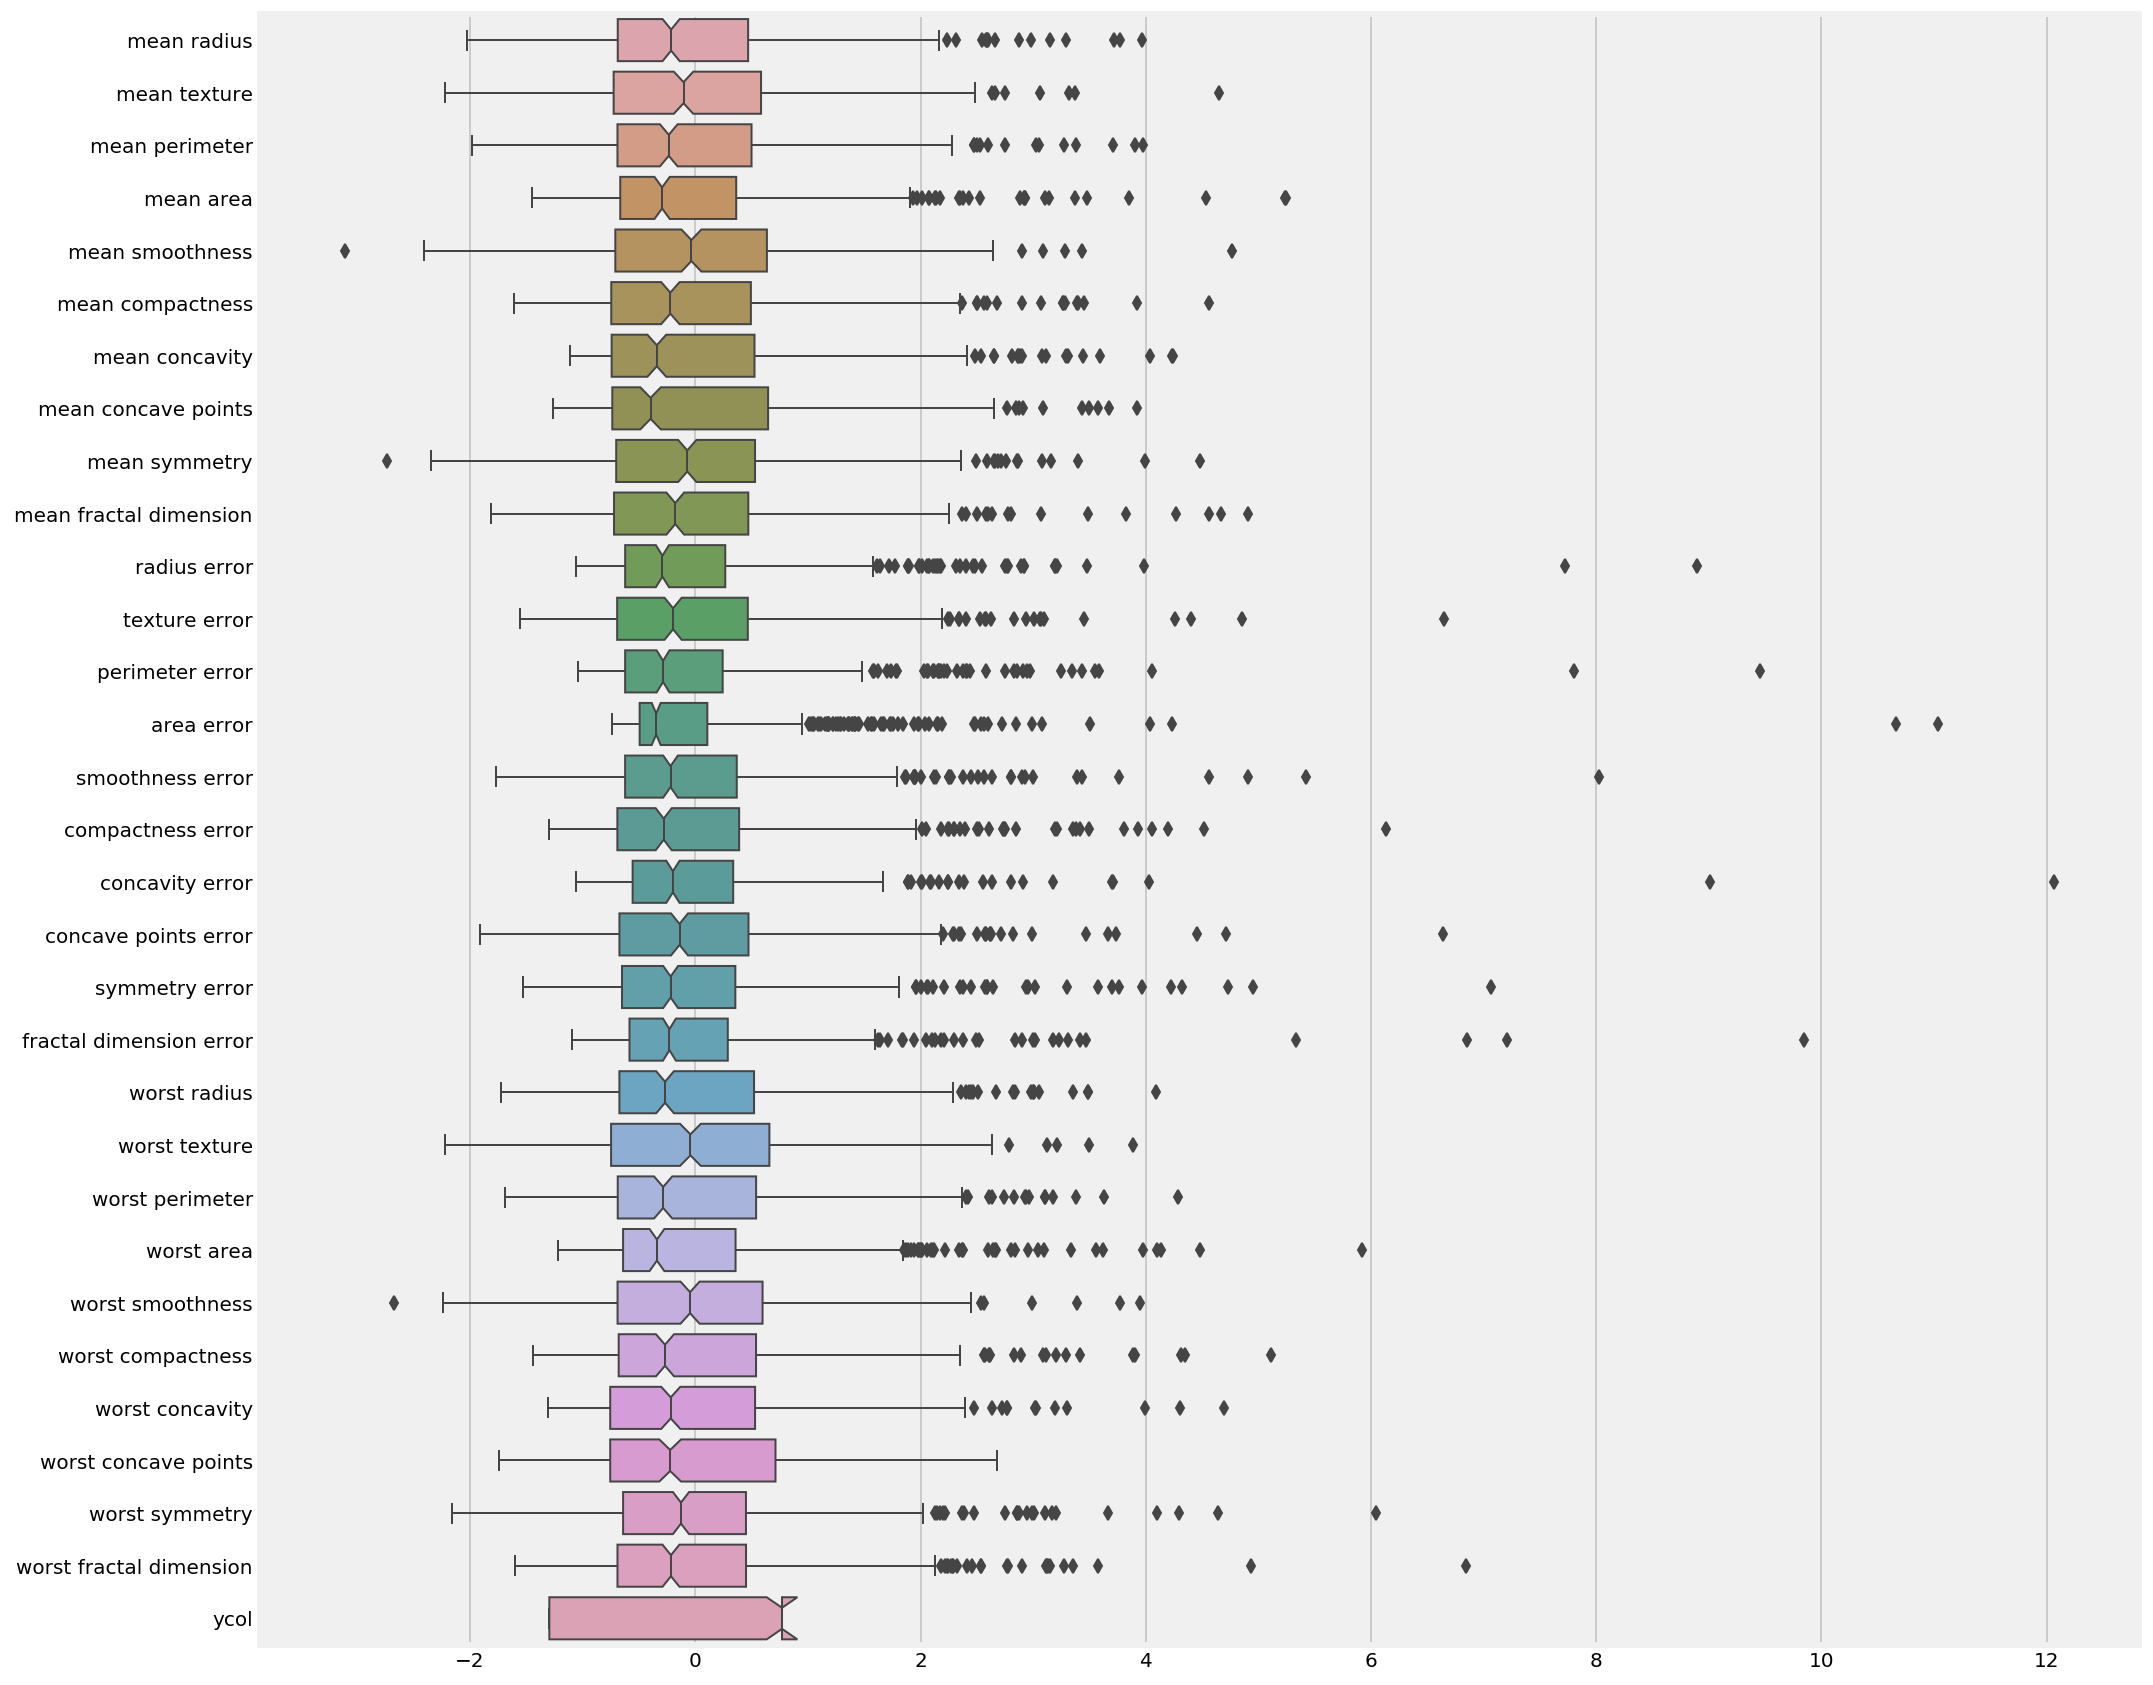

In [41]:
#standardize the numerical columns
import numpy as np
df_num = df.select_dtypes(exclude=['object'])
df_stand = (df_num - df_num.mean()) / df_num.std()
#draw the plot
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()

ax = sns.boxplot(data=df_stand, orient='h', fliersize=5, 
                 linewidth=1, notch=True, saturation=0.5, ax=ax)
plt.show()

In [45]:
df = pd.DataFrame(data_prep)

In [46]:
#Initial EDA
from pandas_summary import DataFrameSummary
dfs = DataFrameSummary(df)
dfs.columns_stats # select suspect columns

Col0     Col1     col2    col3         col4   col_a   col_b  \
counts            10       10        8      10           10      10       9   
uniques           10       10        8      10            5      10       9   
missing            0        0        2       0            0       0       1   
missing_perc      0%       0%      20%      0%           0%      0%     10%   
types         unique  numeric  numeric  unique  categorical  unique  unique   

                     colc  ycol  
counts                  9    10  
uniques                 4     2  
missing                 1     0  
missing_perc          10%    0%  
types         categorical  bool

In [47]:
dfs.summary() # inspect the suspects

Col0     Col1     col2    col3         col4   col_a   col_b  \
count            NaN       10        8     NaN          NaN     NaN     NaN   
mean             NaN      5.5   16.775     NaN          NaN     NaN     NaN   
std              NaN  3.02765  33.7753     NaN          NaN     NaN     NaN   
min              NaN        1      1.1     NaN          NaN     NaN     NaN   
25%              NaN     3.25    3.025     NaN          NaN     NaN     NaN   
50%              NaN      5.5      5.5     NaN          NaN     NaN     NaN   
75%              NaN     7.75    7.975     NaN          NaN     NaN     NaN   
max              NaN       10    100.1     NaN          NaN     NaN     NaN   
counts            10       10        8      10           10      10       9   
uniques           10       10        8      10            5      10       9   
missing            0        0        2       0            0       0       1   
missing_perc      0%       0%      20%      0%           0%      0%     10%   
types         unique  numeric  numeric  unique  categorical  unique  unique   

                     colc  ycol  
count                 NaN   NaN  
mean                  NaN   NaN  
std                   NaN   NaN  
min                   NaN   NaN  
25%                   NaN   NaN  
50%                   NaN   NaN  
75%                   NaN   NaN  
max                   NaN   NaN  
counts                  9    10  
uniques                 4     2  
missing                 1     0  
missing_perc          10%    0%  
types         categorical  bool

/anaconda3/lib/python3.6/site-packages/pandas_summary/__init__.py:130: RuntimeWarning: invalid value encountered in minimum
  capped_series = np.minimum(series, series.mean() + multiplier * series.std())
/anaconda3/lib/python3.6/site-packages/pandas_summary/__init__.py:143: RuntimeWarning: invalid value encountered in minimum
  capped_series = np.minimum(series, series.median() + multiplier * series.mad())


mean                              16.775
std                              33.7753
variance                         1140.77
min                                  1.1
max                                100.1
5%                                 1.485
25%                                3.025
50%                                  5.5
75%                                7.975
95%                               68.145
iqr                                 4.95
kurtosis                         7.84875
skewness                          2.7928
sum                                134.2
mad                              20.8312
cv                               2.01343
zeros_num                              0
zeros_perc                            0%
deviating_of_mean                      2
deviating_of_mean_perc               20%
deviating_of_median                    3
deviating_of_median_perc             30%
top_correlations            Col1: 68.79%
counts                                 8
uniques         

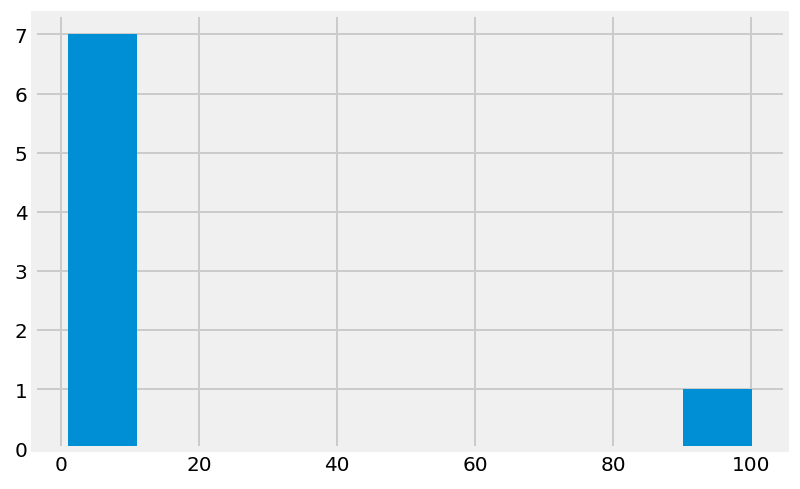

In [48]:
dfs['col2'] # detail the suspects

### Summerizing the data

#### Group by

In [49]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [50]:
tips.groupby(['day', 'sex', 'smoker'])[['tip']].mean()

tip
day  sex    smoker          
Thur Male   Yes     3.058000
            No      2.941500
     Female Yes     2.990000
            No      2.459600
Fri  Male   Yes     2.741250
            No      2.500000
     Female Yes     2.682857
            No      3.125000
Sat  Male   Yes     2.879259
            No      3.256563
     Female Yes     2.868667
            No      2.724615
Sun  Male   Yes     3.521333
            No      3.115349
     Female Yes     3.500000
            No      3.329286

#### Numericals:  Excel-like pivot tables

In [51]:
pd.pivot_table(tips, index = ['day','smoker'], columns = 'sex', aggfunc=np.mean, margins=True)

size                           tip                      \
sex              Male    Female       All      Male    Female       All   
day  smoker                                                               
Thur Yes     2.300000  2.428571  2.352941  3.058000  2.990000  3.030000   
     No      2.500000  2.480000  2.488889  2.941500  2.459600  2.673778   
Fri  Yes     2.125000  2.000000  2.066667  2.741250  2.682857  2.714000   
     No      2.000000  2.500000  2.250000  2.500000  3.125000  2.812500   
Sat  Yes     2.629630  2.200000  2.476190  2.879259  2.868667  2.875476   
     No      2.656250  2.307692  2.555556  3.256563  2.724615  3.102889   
Sun  Yes     2.600000  2.500000  2.578947  3.521333  3.500000  3.516842   
     No      2.883721  3.071429  2.929825  3.115349  3.329286  3.167895   
All          2.630573  2.459770  2.569672  3.089618  2.833448  2.998279   

            total_bill                        
sex               Male     Female        All  
day  smoker                                   
Thur Yes     19.171000  19.218571  19.190588  
     No      18.486500  16.014400  17.113111  
Fri  Yes     20.452500  12.654286  16.813333  
     No      17.475000  19.365000  18.420000  
Sat  Yes     21.837778  20.266667  21.276667  
     No      19.929063  19.003846  19.661778  
Sun  Yes     26.141333  16.540000  24.120000  
     No      20.403256  20.824286  20.506667  
All          20.744076  18.056897  19.785943

#### Categoricals: Old-fashioned Cross-Tabs

In [52]:
#counts
a=tips.day
b=tips.smoker
c=tips.sex
pd.crosstab(a, [b, c], rownames=['day'], colnames=['smoker', 'gender'], margins=True)
# see that you do not need to create a DataFrame to use pandas functionality

smoker  Yes          No         All
gender Male Female Male Female     
day                                
Thur     10      7   20     25   62
Fri       8      7    2      2   19
Sat      27     15   32     13   87
Sun      15      4   43     14   76
All      60     33   97     54  244

In [53]:
#percentages 
pd.set_option('precision',1)
df___ = pd.crosstab(a, [b, c], rownames=['day'], colnames=['smoker', 'gender'], normalize=True)
df___*100

smoker   Yes           No       
gender  Male Female  Male Female
day                             
Thur     4.1    2.9   8.2   10.2
Fri      3.3    2.9   0.8    0.8
Sat     11.1    6.1  13.1    5.3
Sun      6.1    1.6  17.6    5.7

## Real world: Imperfect data

### Target(y) is skewed (i.e. not 'Bell'-shaped)
- Apply log Transformation to target (and np.exp the predicted outcome to get the predicted y)
- Models less sensitive to this problem:
    - KNN (Regressor/Classifier)
    - (Boosted) Forest/Trees

In [ ]:
#example forthcoming

### Non-linear relationships
- Apply Polynomial transformations
- Model less sensitive to this problem:
    - (Boosted) Forest/Trees

In [ ]:
#example forthcoming

    
### Imbalanced (y) in data sets
- Adjust **training** data set; sklearn.imbalanced-learn  
I.e. the model is trained on the synthetically balanced set and tested on the original unbalanced test set.
    **Note** set stratify=True @ train/test split; this ensures that all splits have the same y/target category/value distribution.
    
    - Under-sampling (for 1 large category among smaller ones)

In [54]:
df = pd.DataFrame(data_prep) #create data
df['col2'].fillna(method='ffill', inplace=True) # Nan's are not appreciated
df['col4'] = ['excellent', 'excellent', 'excellent',
              'excellent', 'good', 'good', 'fair', 'fair', 'fair', 'fair'] #unbalance the y
df = df.append([df]*5) #SMOTES needs a larger dataset
df.reset_index()
X_train = df[['col2']] #limiting df to avoid data cleaning
y_train = df['col4'].values

from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(
    random_state=123, return_indices=True, replacement=False)
under_sampler.fit(X_train, y_train)
X_train_u, y_train_u, idx_returned = under_sampler.sample(X_train, y_train)

In [55]:
df.shape

(60, 9)

In [56]:
X_train_u.shape #36 of 600 records left

(36, 1)

In [57]:
# nicely equally distributed
dict(pd.value_counts(y_train_u))

{'excellent': 12, 'fair': 12, 'good': 12}

    - Over-sampling(1 small category among larger ones)

In [59]:
df = pd.DataFrame(data_prep)  # create data
df['col2'].fillna(method='ffill', inplace=True)  # Nan's are not appreciated
df['col4'] = ['excellent', 'excellent', 'excellent',
              'excellent', 'excellent', 'excellent', 'excellent', 'fair', 'fair', 'good']  # create un balance

df = df.append([df]*5) #SMOTES needs a larger dataset
df.reset_index()

X_train = df[['col2']]
y_train = df['col4'].values
# Using SMOTE to Balance the classes in Training set:

from imblearn.over_sampling import SMOTE
SMOTEsampler = SMOTE(random_state=123)
X_train_o, y_train_o = SMOTEsampler.fit_sample(X_train, y_train)
print(f'Size of the original X: {len(X_train)}')
print(f'Size of the SMOTE X: {len(X_train_o)}')
print('Value count original y:')
print(df['col4'].value_counts())
print('Value count SMOTE y:')
pd.DataFrame(y_train_o)[0].value_counts()

Size of the original X: 60
Size of the SMOTE X: 126
Value count original y:
excellent    42
fair         12
good          6
Name: col4, dtype: int64
Value count SMOTE y:


excellent    42
fair         42
good         42
Name: 0, dtype: int64

    - Hybrid
    see https://github.com/cthacker/class-balancer
  

  
- Models less sensitive to imbalance:

    - AdaBoost
    - Naive Bayes
    
- Or use classifiers with have a setting to balance class weights

In [ ]:
clf = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced")

    
### Too many features
Having (too) many features may pose a problem productionalizing the model. E.g. a model may make a near prefect prediction of the amount of money a customer will spend during his next purchase using 100 features. But then all those 100 features need to be available completely and timely  for forecasting. This may not always be the case in practice. So check which features will be readily available in production @ acceptable effort/cost.
<br><br>
Always used in case of NLP

- Extract
    - Principle Component Analysis
    - Linear Discriminant Analysis

In [ ]:
#example forthcoming

- Select
    - Correlation Thresholds  
    Only choose the features with the highest correlation/predictive value
    - Variance thresholds  
    Eliminate any feature where the majority of observations have the same value
    (different from Co-variance)

In [ ]:
#example forthcoming

- Models with built in feature selection
    - Lasso Regression (Unimportant features get a 0 coefficient)
    - Random forests/decisions trees (feature that do not add information get left out)

In [ ]:
#example forthcoming

    
## Cleaning

### Intitial Validation 

In [ ]:
# Check if the colums data types make sense
df.dtypes
#convert to ints to floats
df['col1'] = df['col1'].astype(np.float64) #or something else
# to string?
df['col2'] = df['col2'].astype(np.str)
#BTW
df[['col1','col2']] = df[['col1','col2']].astype(np.str) #also works



In [ ]:
df['col1'].unique() #will likely indicate problems
df.['col1'].value_counts # also does the trick

In [ ]:
#function looping over values for correction and type settting
def cleaner(x):
    x = x.replace('-','') #replace something at the same time
    try:
        return float(x) #forces float
    except:
        return np.nan
    
df['col1']= df['col1'].map(cleaner)
# df = df.apply(cleaner) will do the WHOLE data frame

In [ ]:
#or:
df['col1'] = df['col1'].map(lambda x: float(x))
#or
df.loc[:,'col1'] = df['col1'].map(lambda x: 1 if x == 'yes' else 0 if x == 'no' else x)

Now we get into the difficult bit: 'Real' cleaning, namely Na/Null, outliers (including inconsistencies: e.g. a 3 year old owning a car) Consider: Size of the data set, use of the data, the purpose of the analysis. Scan the 'cleaned' data for patterns

In [ ]:
# create mask:
mask = df['col1'] == value # <>== etc
mask1 = ((df['col1']) > value) & (df['col2'] < value) #note brackets arround each condition
# view rows
df.loc[mask,:]
#or:
df.loc[df['col1'] == value]
#decide what to do: override the culprit:
df.loc[mask, 'col1'] = np.nan #or override the value
df.loc[mask, 'col1'] = new_value/new string
#or delete entire row
df = df.loc[~mask,:].reset_index(drop=True) 

In [ ]:
#signs that do not seem to be wanting to be deleted 
df[col] = df[col].astype(str)  # cast to string

# all the string surgery goes in here
df[col] = df[col].replace('$', '')
df[col] = df[col].replace(',', '')  # assuming ',' is the thousand's separator in your locale
df[col] = df[col].replace('%', '')

df[col] = df[col].astype(float)  # cast back to appropriate type

### Outliers

Wikipedia: "an outlier is an observation point that is distant from other observations"  
Considerations:
-  Purpose of the analysis
    - Predicting anomalies/Black Swans, e.g. detecting fraud:    
    outliers are a blessing
    - Predicting averages e.g. average house prices  
    It is a common practice to limit the dataset to the mean +/- 2 or 3 std's on key independent variables
-  Number of outliers vis a vis the quantity of data
-  Overall data quality
-  Type of model likely to be applied, some models e.g regression are sensitive to outliers.

**note:** Categorical data may also have outliers: an 'outlier' category will have a frequency of a different magnitude than the others  (e.g. {FavoriteColorBlue : 1000, FavoriteColorRed :2000, FavoriteColorMauve: 5}

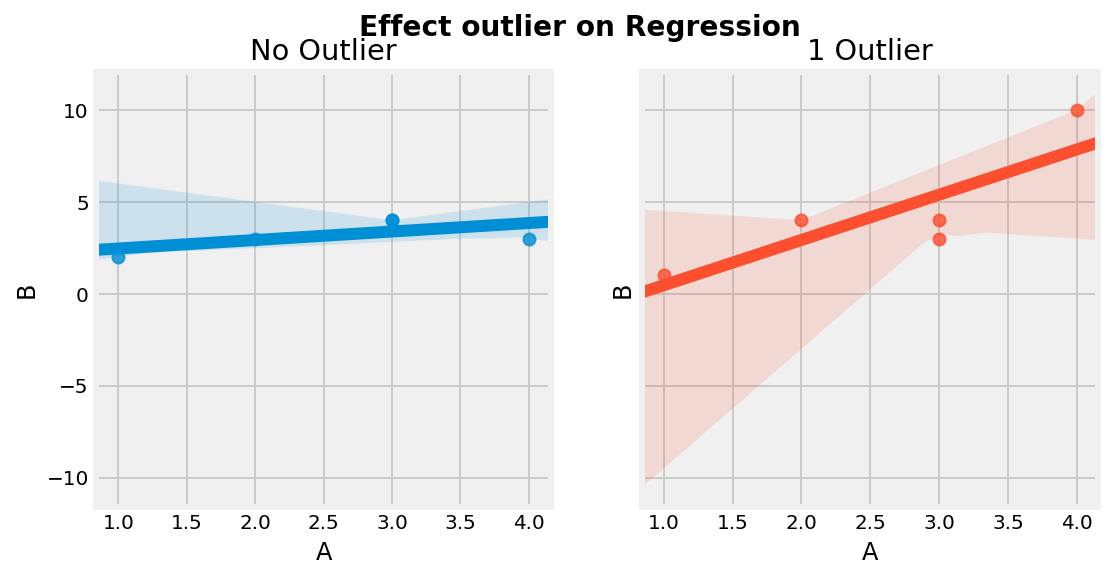

In [138]:
#Illustration of impact of outlier on simple regression
df_ = pd.DataFrame({'A': [1, 2, 3, 3, 4], 'B': [2, 3, 4, 4, 3]})
df = pd.DataFrame({'A': [1, 3, 2, 3, 4], 'B': [1, 3, 4, 4, 10]})
import seaborn as sns
fig, axs = plt.subplots(ncols=2,figsize=(8,4), sharey=True)

sns.regplot(x='A', y='B', data=df_, ax=axs[0])
axs[0].set_title("No Outlier")
sns.regplot(x='A', y='B', data=df, ax=axs[1])
axs[1].set_title("1 Outlier")
fig.suptitle('Effect outlier on Regression', fontsize=14, fontweight='bold')

plt.show()
# it took me 2 hours to figure out sns.lmplots cannot be subplotted

#### Identify outliers
##### Visually by plotting
##### Filtering
- Z scores
- Medians

##### More Advanced methodologies

- DBScan
- Isolation Forest

#### Establish the cause of the outlier
For all outliers the cause should be established. Or rather, error as a cause should be ruled out. Outliers should be 'presumed innocent until proven guilty'. Sources of error include:
    -  (Manual) Input error
    -  Error in interface/conversion
    -  Malfunction of the recording technology (chain)

##### Error

If an error is established:
1. Correct if possible
2. Treat as NaN

##### True outlier, aka 'Novelty'

Course of action is determined by the **purpose of the model/analysis** :

Remove records with outliers from the data set if:

- Focus on prediction of averages
- Overall data quality is poor anyway
- Susceptibility for outliers of the anticipated models

Retain them for:

- Anomaly detection and resulting anomaly prediction 

An alernative strategy is to mark outliers with a dummy; retain the original value or replace it with a mean, medium or mode. Make sure to include the outlier dummy in the X




In [60]:
# Approach using Mean/Std, good for (close to) normally districuted data
df = pd.DataFrame(data_prep)
# set values
avg = df['col2'].mean()
dev = df['col2'].std()
# set boundaries
outlmin = avg - 2 * dev
outlmax = avg + 2 * dev
#create mask
mask = (df['col2'] > outlmax) | (df['col2'] < outlmin) #() around each condition
#apply mask to DF
df = df[~mask].copy() #.copy helps avoiding error messages
df

Col0  Col1  col2 col3       col4 col_a   col_b      colc   ycol
0   row1     1   1.1   -4  excellent   aaa     red       NaN   True
1   row2     2   2.2   -3  excellent   bbb    blue    square   True
2   row3     3   3.3   -2  very good   ccc   green    square   True
3   row4     4   4.4   -1  very good   ddd  orange    circle   True
4   row5     5   NaN    0       good   eee     NaN    circle   True
5   row6     6   6.6    1       good   fff  purple       ???  False
6  row_7     7   7.7    2       fair   ggg   white  triangle  False
7  row_8     8   8.8  Nan       fair   hhh   black  triangle  False
8   Row9     9   NaN    4  appalling   iii   brown  triangle  False

In [61]:
# InterQuartileRange approach, good for data not normally distributed
df = pd.DataFrame(data_prep)
df = df.dropna() #np.percentile does not like NaN

quartile_1, quartile_3 = np.percentile(df['col2'], [25, 75])
iqr = quartile_3 - quartile_1
# set boundaries
outlmin = quartile_1 - (iqr * 1.5)
outlmax = quartile_3 + (iqr * 1.5)

#create mask
mask = (df['col2'] > outlmax) | (df['col2'] < outlmin) #() around each condition
#apply mask to DF
df = df[~mask].copy() #.copy helps avoiding error messages
df

Col0  Col1  col2 col3       col4 col_a   col_b      colc   ycol
1   row2     2   2.2   -3  excellent   bbb    blue    square   True
2   row3     3   3.3   -2  very good   ccc   green    square   True
3   row4     4   4.4   -1  very good   ddd  orange    circle   True
5   row6     6   6.6    1       good   fff  purple       ???  False
6  row_7     7   7.7    2       fair   ggg   white  triangle  False
7  row_8     8   8.8  Nan       fair   hhh   black  triangle  False

In [62]:
df = pd.DataFrame(data_prep)
# 1 sided outlier elimination, pandas way
df[df['col2'] < 3 * df['col2'].mean()]


Col0  Col1  col2 col3       col4 col_a   col_b      colc   ycol
0   row1     1   1.1   -4  excellent   aaa     red       NaN   True
1   row2     2   2.2   -3  excellent   bbb    blue    square   True
2   row3     3   3.3   -2  very good   ccc   green    square   True
3   row4     4   4.4   -1  very good   ddd  orange    circle   True
5   row6     6   6.6    1       good   fff  purple       ???  False
6  row_7     7   7.7    2       fair   ggg   white  triangle  False
7  row_8     8   8.8  Nan       fair   hhh   black  triangle  False

In [63]:
df = pd.DataFrame(data_prep)
# 2 sided outlier elimination, pandas way
df[(df['col2'] < df['col2'].mean() + 2 * df['col2'].std()) | (df['col2'] > df['col2'].mean() - 2 * df['col2'].std())]

Col0  Col1   col2 col3       col4 col_a   col_b      colc   ycol
0   row1     1    1.1   -4  excellent   aaa     red       NaN   True
1   row2     2    2.2   -3  excellent   bbb    blue    square   True
2   row3     3    3.3   -2  very good   ccc   green    square   True
3   row4     4    4.4   -1  very good   ddd  orange    circle   True
5   row6     6    6.6    1       good   fff  purple       ???  False
6  row_7     7    7.7    2       fair   ggg   white  triangle  False
7  row_8     8    8.8  Nan       fair   hhh   black  triangle  False
9  Row10    10  100.1    5  appalling   jjj    gray  triangle  False

### Isolation Forest

Eliminating outliers in multi dimensional space. It labels a desired fraction ('contamination') of the dataset as outlier, which may be inspected and deleted. It may perform better compared to manual individual row inspection. Outlier elimination takes place on the full data set.(https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e)

In [67]:
#get the data ready
df, X, y, X_train, y_train, X_test, y_test = multiclass()

from sklearn.ensemble import IsolationForest
# training the model
outliers_fraction = 0.05
outlier_clf = IsolationForest(max_samples=100, contamination = outliers_fraction, random_state=42)
outlier_clf.fit(X)

# predictions - mark the outliers
df['forest_outlier'] = outlier_clf.predict(X)
#select outliers
df[df['forest_outlier'] == -1]#.sample(5)

Iris Dataset Data has been created for multiclass ML
Shape df (150, 5)
Shape X (150, 4)
Shape y (150,)
Shape X_train (105, 4)
Shape y_train (105,)
Shape X_test (45, 4)
Shape y_test (45,)
Mean X 3.2566542055671256e-16, should be close to 0
Std X 0.9999999999999999, should be close to 1
Available columns ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)' 'ycol']


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
13                 4.3               3.0                1.1               0.1   
15                 5.7               4.4                1.5               0.4   
41                 4.5               2.3                1.3               0.3   
109                7.2               3.6                6.1               2.5   
117                7.7               3.8                6.7               2.2   
118                7.7               2.6                6.9               2.3   
122                7.7               2.8                6.7               2.0   
131                7.9               3.8                6.4               2.0   

     ycol  forest_outlier  
13      0              -1  
15      0              -1  
41      0              -1  
109     2              -1  
117     2              -1  
118     2              -1  
122     2              -1  
131     2              -1

In [69]:
# eliminate outliers
mask = df['forest_outlier'] == 1
df_ = df[mask]
print(f'The shape of the dataframe with {outliers_fraction} outliers eliminated is: {df_.shape}')

The shape of the dataframe with 0.05 outliers eliminated is: (142, 6)


In [74]:
#alternative method (https://chrisalbon.com/machine_learning/preprocessing_structured_data/detecting_outliers/)
from sklearn.covariance import EllipticEnvelope

outliers_fraction = 0.05

# Create detector
outlier_clf = EllipticEnvelope(contamination=outliers_fraction)

# Fit detector
outlier_clf.fit(X)

# Predict and mark outliers

df['envelop_outlier'] = outlier_clf.predict(X)

#select outliers
df[df['envelop_outlier'] == -1].sample(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
114                5.8               2.8                5.1               2.4   
122                7.7               2.8                6.7               2.0   
141                6.9               3.1                5.1               2.3   
134                6.1               2.6                5.6               1.4   
131                7.9               3.8                6.4               2.0   

     ycol  forest_outlier  envelop_outlier  
114     2               1               -1  
122     2              -1               -1  
141     2               1               -1  
134     2               1               -1  
131     2              -1               -1

In [72]:
# eliminate outliers
mask = df['envelop_outlier'] == 1
df__ = df[mask]
print(f' the shape of the data farme with {outliers_fraction} outliers eliminated is: {df__.shape}')

 the shape of the data farme with 0.05 outliers eliminated is: (142, 7)


In [ ]:
#also look at radius knn

### Missing data

Considerations:

-  Volume of the data
-  Origin/nature of the data (e.g. sample of tweets  vs a scientific experiment)
-  Phase in the modeling process(e.g. initial stages vs final feature selection)
-  Are NaN's likely to occur in production?

Essentially 3 strategies. 
1.  Dropping  
Common 'Big Data' approach. If data is ambundant. NaN's low in volume. During initial stage of the modeling.
2.  Imputing  
Traditional 'Small Data' approach. Low data volumes, NaN's low in volume
3.  Categorizing  
Considers the presence of NaN's to hold information by its virtue. Dropping or Imputing will lose this information. (e.g. certain age groups may be more hesitant to state their age. By dropping the records the specific age group may be underrepresented)

By using this technique of flagging and filling, you are essentially allowing the algorithm to estimate the optimal constant for 'missingness', instead of just filling it in with the mean.
  
Additional advantage is that this makes a productionalized model more robust as it will allow for NaN's (e.g. even if somebody does in fill in her age the model can still predict)



#### Identify missing data



In [75]:
df = pd.DataFrame(data_prep)
df__ = df.isnull().sum(axis=1) # by index (by row in db terms)
df_ = df.isnull().sum() # by column
print(df__, df_)

0    1
1    0
2    0
3    0
4    2
5    0
6    0
7    0
8    1
9    0
dtype: int64 Col0     0
Col1     0
col2     2
col3     0
col4     0
col_a    0
col_b    1
colc     1
ycol     0
dtype: int64


Decide if there are other values that should be considered 'null' or NaN. These may include: '?', 999(as an integer), ' ' (space). In a wider sense: anything that is not appropriate for the purpose of variable. E.g. the variable 'sex' may include the answer 'yes, please!', although a KNN will likely impute in a 14 year old male, it is best to regard this joker as a np.NaN .
<br><br>
It may be tricky to identify these, check the data dictionary for valid data. If not available do a value count on objects (not for NLP obviously)

In [76]:
df['colc'].value_counts()

triangle    4
circle      2
square      2
???         1
Name: colc, dtype: int64

Numeric columns replace the identified missing values with np.NaN

For object columns, it is a little more tricky technically. For Python string operations do not like np.NaN's.
    1. identify missing values
    2. replace the strings with a generic string 
    3. convert generic string to np.NaN
    4. Convert column to integer/

### Dropna

The classic 'Big Data' approach; 

In [77]:
df = pd.DataFrame(data_prep)
# Dropping all rows with an(y) NA
df.dropna(axis=0)

Col0  Col1   col2 col3       col4 col_a   col_b      colc   ycol
1   row2     2    2.2   -3  excellent   bbb    blue    square   True
2   row3     3    3.3   -2  very good   ccc   green    square   True
3   row4     4    4.4   -1  very good   ddd  orange    circle   True
5   row6     6    6.6    1       good   fff  purple       ???  False
6  row_7     7    7.7    2       fair   ggg   white  triangle  False
7  row_8     8    8.8  Nan       fair   hhh   black  triangle  False
9  Row10    10  100.1    5  appalling   jjj    gray  triangle  False

In [78]:
df = pd.DataFrame(data_prep)
# Dropping columns
df.dropna(axis=1)

Col0  Col1 col3       col4 col_a   ycol
0   row1     1   -4  excellent   aaa   True
1   row2     2   -3  excellent   bbb   True
2   row3     3   -2  very good   ccc   True
3   row4     4   -1  very good   ddd   True
4   row5     5    0       good   eee   True
5   row6     6    1       good   fff  False
6  row_7     7    2       fair   ggg  False
7  row_8     8  Nan       fair   hhh  False
8   Row9     9    4  appalling   iii  False
9  Row10    10    5  appalling   jjj  False

Nifty trick: df.dropna(axis=1, thres=3), defines the acceptable number of NaN's along the axis

### Imputing
#### SKlearn Impute
Fits into pipelines

In [79]:
df = pd.DataFrame(data_prep)
# by column
import numpy as np
from sklearn.preprocessing import Imputer
imp = Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=10)
X = df[['col2']]
imp.fit(X)
df['col2'] = (imp.transform(X)) 
df

Col0  Col1   col2 col3       col4 col_a   col_b      colc   ycol
0   row1     1    1.1   -4  excellent   aaa     red       NaN   True
1   row2     2    2.2   -3  excellent   bbb    blue    square   True
2   row3     3    3.3   -2  very good   ccc   green    square   True
3   row4     4    4.4   -1  very good   ddd  orange    circle   True
4   row5     5   16.8    0       good   eee     NaN    circle   True
5   row6     6    6.6    1       good   fff  purple       ???  False
6  row_7     7    7.7    2       fair   ggg   white  triangle  False
7  row_8     8    8.8  Nan       fair   hhh   black  triangle  False
8   Row9     9   16.8    4  appalling   iii   brown  triangle  False
9  Row10    10  100.1    5  appalling   jjj    gray  triangle  False

In [83]:
#by column
#from sklearn.impute import SimpleImputer #(in version .20)
from sklearn.preprocessing.imputation import Imputer
import numpy as np
imp = Imputer(missing_values='NaN', strategy='mean')
#Simpleimp = Imputer(missing_values='NaN', strategy='mean')
X = [[np.nan, 2], [6, np.nan], [7, 6]]
imp.fit(X)
print(imp.transform(X))           

[[6.5 2. ]
 [6.  4. ]
 [7.  6. ]]


In [87]:
#categoricals : impute 1 column NaN with most frequent for the column
df = pd.DataFrame(data_prep)
df = df.fillna(df['colc'].value_counts().index[0])
df

Col0  Col1      col2 col3       col4 col_a     col_b      colc   ycol
0   row1     1         1   -4  excellent   aaa       red  triangle   True
1   row2     2         2   -3  excellent   bbb      blue    square   True
2   row3     3         3   -2  very good   ccc     green    square   True
3   row4     4         4   -1  very good   ddd    orange    circle   True
4   row5     5  triangle    0       good   eee  triangle    circle   True
5   row6     6         7    1       good   fff    purple       ???  False
6  row_7     7         8    2       fair   ggg     white  triangle  False
7  row_8     8         9  Nan       fair   hhh     black  triangle  False
8   Row9     9  triangle    4  appalling   iii     brown  triangle  False
9  Row10    10     1e+02    5  appalling   jjj      gray  triangle  False

In [88]:
# All columns:
df = pd.DataFrame(data_prep)
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))
df

Col0  Col1   col2 col3       col4 col_a   col_b      colc   ycol
0   row1     1    1.1   -4  excellent   aaa     red  triangle   True
1   row2     2    2.2   -3  excellent   bbb    blue    square   True
2   row3     3    3.3   -2  very good   ccc   green    square   True
3   row4     4    4.4   -1  very good   ddd  orange    circle   True
4   row5     5  100.1    0       good   eee  orange    circle   True
5   row6     6    6.6    1       good   fff  purple       ???  False
6  row_7     7    7.7    2       fair   ggg   white  triangle  False
7  row_8     8    8.8  Nan       fair   hhh   black  triangle  False
8   Row9     9  100.1    4  appalling   iii   brown  triangle  False
9  Row10    10  100.1    5  appalling   jjj    gray  triangle  False

In SKLearn 0.20 a ChainedImputer will be included which has more advanced features, like using models for determining the best value for the NA

#### Pandas 
##### Fillna

In [89]:
df = pd.DataFrame(data_prep)
df.fillna(2) #fills with integer 2

Col0  Col1   col2 col3       col4 col_a   col_b      colc   ycol
0   row1     1    1.1   -4  excellent   aaa     red         2   True
1   row2     2    2.2   -3  excellent   bbb    blue    square   True
2   row3     3    3.3   -2  very good   ccc   green    square   True
3   row4     4    4.4   -1  very good   ddd  orange    circle   True
4   row5     5    2.0    0       good   eee       2    circle   True
5   row6     6    6.6    1       good   fff  purple       ???  False
6  row_7     7    7.7    2       fair   ggg   white  triangle  False
7  row_8     8    8.8  Nan       fair   hhh   black  triangle  False
8   Row9     9    2.0    4  appalling   iii   brown  triangle  False
9  Row10    10  100.1    5  appalling   jjj    gray  triangle  False

In [90]:
df = pd.DataFrame(data_prep)
df.fillna(method='ffill') #repeats last value before NaN

Col0  Col1   col2 col3       col4 col_a   col_b      colc   ycol
0   row1     1    1.1   -4  excellent   aaa     red       NaN   True
1   row2     2    2.2   -3  excellent   bbb    blue    square   True
2   row3     3    3.3   -2  very good   ccc   green    square   True
3   row4     4    4.4   -1  very good   ddd  orange    circle   True
4   row5     5    4.4    0       good   eee  orange    circle   True
5   row6     6    6.6    1       good   fff  purple       ???  False
6  row_7     7    7.7    2       fair   ggg   white  triangle  False
7  row_8     8    8.8  Nan       fair   hhh   black  triangle  False
8   Row9     9    8.8    4  appalling   iii   brown  triangle  False
9  Row10    10  100.1    5  appalling   jjj    gray  triangle  False

In [91]:
df = pd.DataFrame(data_prep)
df.fillna(method='bfill') #repeats first value after NaN

Col0  Col1   col2 col3       col4 col_a   col_b      colc   ycol
0   row1     1    1.1   -4  excellent   aaa     red    square   True
1   row2     2    2.2   -3  excellent   bbb    blue    square   True
2   row3     3    3.3   -2  very good   ccc   green    square   True
3   row4     4    4.4   -1  very good   ddd  orange    circle   True
4   row5     5    6.6    0       good   eee  purple    circle   True
5   row6     6    6.6    1       good   fff  purple       ???  False
6  row_7     7    7.7    2       fair   ggg   white  triangle  False
7  row_8     8    8.8  Nan       fair   hhh   black  triangle  False
8   Row9     9  100.1    4  appalling   iii   brown  triangle  False
9  Row10    10  100.1    5  appalling   jjj    gray  triangle  False

In [92]:
df = pd.DataFrame(data_prep)
df['col2'] = df['col2'].fillna(df['col2'].mean()) # fill with mean for the column
df

Col0  Col1   col2 col3       col4 col_a   col_b      colc   ycol
0   row1     1    1.1   -4  excellent   aaa     red       NaN   True
1   row2     2    2.2   -3  excellent   bbb    blue    square   True
2   row3     3    3.3   -2  very good   ccc   green    square   True
3   row4     4    4.4   -1  very good   ddd  orange    circle   True
4   row5     5   16.8    0       good   eee     NaN    circle   True
5   row6     6    6.6    1       good   fff  purple       ???  False
6  row_7     7    7.7    2       fair   ggg   white  triangle  False
7  row_8     8    8.8  Nan       fair   hhh   black  triangle  False
8   Row9     9   16.8    4  appalling   iii   brown  triangle  False
9  Row10    10  100.1    5  appalling   jjj    gray  triangle  False

In [93]:
df = pd.DataFrame(data_prep)
df[['col3', 'colc']].replace(['???', 'Nan'], np.nan, inplace=True)#replace strings with np.nan
df

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Col0  Col1   col2 col3       col4 col_a   col_b      colc   ycol
0   row1     1    1.1   -4  excellent   aaa     red       NaN   True
1   row2     2    2.2   -3  excellent   bbb    blue    square   True
2   row3     3    3.3   -2  very good   ccc   green    square   True
3   row4     4    4.4   -1  very good   ddd  orange    circle   True
4   row5     5    NaN    0       good   eee     NaN    circle   True
5   row6     6    6.6    1       good   fff  purple       ???  False
6  row_7     7    7.7    2       fair   ggg   white  triangle  False
7  row_8     8    8.8  Nan       fair   hhh   black  triangle  False
8   Row9     9    NaN    4  appalling   iii   brown  triangle  False
9  Row10    10  100.1    5  appalling   jjj    gray  triangle  False

#### Interpolation

In [94]:
df = pd.DataFrame(data_prep)
df['col3'] = df['col3'].astype(float)
df['col3'] = df['col3'].interpolate(axis=0)#, inplace=True)
df
#df.interpolate(axis=1, limit=2, inplace=True)

Col0  Col1   col2  col3       col4 col_a   col_b      colc   ycol
0   row1     1    1.1  -4.0  excellent   aaa     red       NaN   True
1   row2     2    2.2  -3.0  excellent   bbb    blue    square   True
2   row3     3    3.3  -2.0  very good   ccc   green    square   True
3   row4     4    4.4  -1.0  very good   ddd  orange    circle   True
4   row5     5    NaN   0.0       good   eee     NaN    circle   True
5   row6     6    6.6   1.0       good   fff  purple       ???  False
6  row_7     7    7.7   2.0       fair   ggg   white  triangle  False
7  row_8     8    8.8   3.0       fair   hhh   black  triangle  False
8   Row9     9    NaN   4.0  appalling   iii   brown  triangle  False
9  Row10    10  100.1   5.0  appalling   jjj    gray  triangle  False

#### KNN Classifier/Regressor(or any other model for that matter)

It is very feasible to use a predictive model for imputation. Careful not to build a 'model on a model' KNN is a likely (but slow) candidate. In fact it can be done with any other predictor other than Tarot cards. Outline is as follows:
    1. Split the df in 2 parts:
        1. With the NaN's
        2. Without the NaN's
    2. Define your y as the missing values column
    3. Define X as the columns to use for prediction. Make sure to **not include** i.e. **exclude** the ultimate target
    4. In case of a classifier: determine the baseline i.e. the largest majority class
    5. Scale your X
    6. Fit the model (use CrossVal, GridSearch as deemed appropriate for the purpose)
    7. Evaluate the model (R^2 or compare to baseline)
    8. Decide what to do
        1. Take the mean/median for continuous data
        2. Take the mode for discrete
    9. Predict the NaN's
    10. merge the 2 df's again
Good solution if missing value can be easily derived
    
    

In [95]:
df_imp = pd.read_excel('ImputKnn.xls',na_values='NaN')
df_imp

col1  col2  col3  col4  col5  col6
0   10.0     4     4     6    90     1
1   10.0     4     5     6   100     1
2    NaN     4     5     6    90     1
3   10.0     7     8     9   100     0
4   20.0     4     5     6    90     0
5   20.0     7     8     8   102     0
6   20.0     7     8     8    90     1
7    NaN     7     8     9   106     1
8   20.0    11    12    13   100     1
9   30.0    14    15    16    90     0
10  30.0    14    16    15   112     0
11   NaN    11    12    13    90     0
12  30.0    11    12    13   116     1
13  30.0    11    12    13    90     1

In [96]:
#Split df on NaN's
impute_missing = df_imp.loc[df_imp['col1'].isnull(), :]
impute_valid = df_imp.loc[~df_imp['col1'].isnull(), :]

In [97]:
#define pred columns
pred_cols = [c for c in impute_valid.columns if not c in ['col6', 'col1']]
y = impute_valid['col1'].values
X = impute_valid[pred_cols]

In [98]:
#train model
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
ss = StandardScaler()
Xs = ss.fit_transform(X)
knn = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
scores = cross_val_score(knn, Xs, y, cv=2)
print (scores)
print (np.mean(scores))

[0.66666667 0.6       ]
0.6333333333333333


In [99]:
#fit on valid and predict missing
knn.fit(Xs,y)
y = impute_missing['col1'].values
Xp = impute_missing[pred_cols]
ss = StandardScaler()
Xp = ss.fit_transform(Xp)

In [100]:
#impute missing
impute_missing['col1'] = knn.predict(Xp)
df_imp.loc[df_imp['col1'].isnull(), 'col1'] = impute_missing['col1']
df_imp

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


col1  col2  col3  col4  col5  col6
0   10.0     4     4     6    90     1
1   10.0     4     5     6   100     1
2   10.0     4     5     6    90     1
3   10.0     7     8     9   100     0
4   20.0     4     5     6    90     0
5   20.0     7     8     8   102     0
6   20.0     7     8     8    90     1
7   10.0     7     8     9   106     1
8   20.0    11    12    13   100     1
9   30.0    14    15    16    90     0
10  30.0    14    16    15   112     0
11  30.0    11    12    13    90     0
12  30.0    11    12    13   116     1
13  30.0    11    12    13    90     1

### Categorizing

Considers that the occurance of a NaN may hold information by itself. 

-  Introducing a category "missing" for categorical data.
-  introduce a dummy 'missing' per column with missing integers. Put the value to 1 for missing and 0 for valid entires. Include the 'missing' column in your X

By using this technique of flagging and filling, you are essentially allowing the algorithm to estimate the optimal constant for 'missingness', instead of just filling it in with the mean.
  
Additional advantage is that this makes a productionalized model more robust as it allows for a value to be missing.


In [ ]:
#example forthcoming

### The opposite of Missing Data
#### Functional
It is also possible that there is 'too much' data. 

In [101]:
df = pd.DataFrame(data_prep)
df = df.append(df.iloc[[4,7]]) #create duplicates
df

Col0  Col1   col2 col3       col4 col_a   col_b      colc   ycol
0   row1     1    1.1   -4  excellent   aaa     red       NaN   True
1   row2     2    2.2   -3  excellent   bbb    blue    square   True
2   row3     3    3.3   -2  very good   ccc   green    square   True
3   row4     4    4.4   -1  very good   ddd  orange    circle   True
4   row5     5    NaN    0       good   eee     NaN    circle   True
5   row6     6    6.6    1       good   fff  purple       ???  False
6  row_7     7    7.7    2       fair   ggg   white  triangle  False
7  row_8     8    8.8  Nan       fair   hhh   black  triangle  False
8   Row9     9    NaN    4  appalling   iii   brown  triangle  False
9  Row10    10  100.1    5  appalling   jjj    gray  triangle  False
4   row5     5    NaN    0       good   eee     NaN    circle   True
7  row_8     8    8.8  Nan       fair   hhh   black  triangle  False

In [102]:
# Dropping duplicate rows
df.drop_duplicates()

Col0  Col1   col2 col3       col4 col_a   col_b      colc   ycol
0   row1     1    1.1   -4  excellent   aaa     red       NaN   True
1   row2     2    2.2   -3  excellent   bbb    blue    square   True
2   row3     3    3.3   -2  very good   ccc   green    square   True
3   row4     4    4.4   -1  very good   ddd  orange    circle   True
4   row5     5    NaN    0       good   eee     NaN    circle   True
5   row6     6    6.6    1       good   fff  purple       ???  False
6  row_7     7    7.7    2       fair   ggg   white  triangle  False
7  row_8     8    8.8  Nan       fair   hhh   black  triangle  False
8   Row9     9    NaN    4  appalling   iii   brown  triangle  False
9  Row10    10  100.1    5  appalling   jjj    gray  triangle  False

Multiple entries in the same category/period. In combination with targeted/grouped sorting and, possibly, a temporary helper column, using drop_duplicated(keep = 'first') or 'last' may lead to single entries.
<br><br>
Argmax over the columns

In [ ]:
#forthcoming
example #rename column 
dfc['testcat'] = 'ReadComp'
#create a helper column, to ID the cases that a pupil has taken the test more than once 
dfc['helper'] = dfc['name']+dfc['DL']#Only include the last test result
dfc.drop_duplicates(subset='helper', keep='last', inplace = True)
#delete helper
dfc.drop(['helper'], axis=1, inplace=True)

#### Non-Functional

If you have an enormous dataset which cripples you computer, it is perfectly fine to take a random sample; you can/should always validate based on the entire dataset later; or get your AWS set up going

In [103]:
df_sample = df.sample(5)
df_sample

Col0  Col1   col2 col3       col4 col_a   col_b      colc   ycol
5   row6     6    6.6    1       good   fff  purple       ???  False
7  row_8     8    8.8  Nan       fair   hhh   black  triangle  False
0   row1     1    1.1   -4  excellent   aaa     red       NaN   True
9  Row10    10  100.1    5  appalling   jjj    gray  triangle  False
8   Row9     9    NaN    4  appalling   iii   brown  triangle  False

### Exploring relationships

Prior to embarking consider/contemplate/research the theory on what relationships may be expected. Define the 'hypothesis'. Within a heatmap of a large feature set there $will$ be stronger and weaker relationships which may be meaningless. Confirm the expected  relationships through the heatmap and inspect the background on newly found ones. If they make no sense ignore them.

Strong relationships (>0.90) between variables indicate co-variance, inspect and delete one if there is indeed covariance.

Diabetes Dataset Data has been created for Regression ML
Shape df (442, 11)
Shape X (442, 10)
Shape y (442,)
Shape X_train (309, 10)
Shape y_train (309,)
Shape X_test (133, 10)
Shape y_test (133,)
Mean X 1.1497455271199033e-17, should be close to 0
Std X 1.0, should be close to 1
Available columns ['age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6' 'ycol']


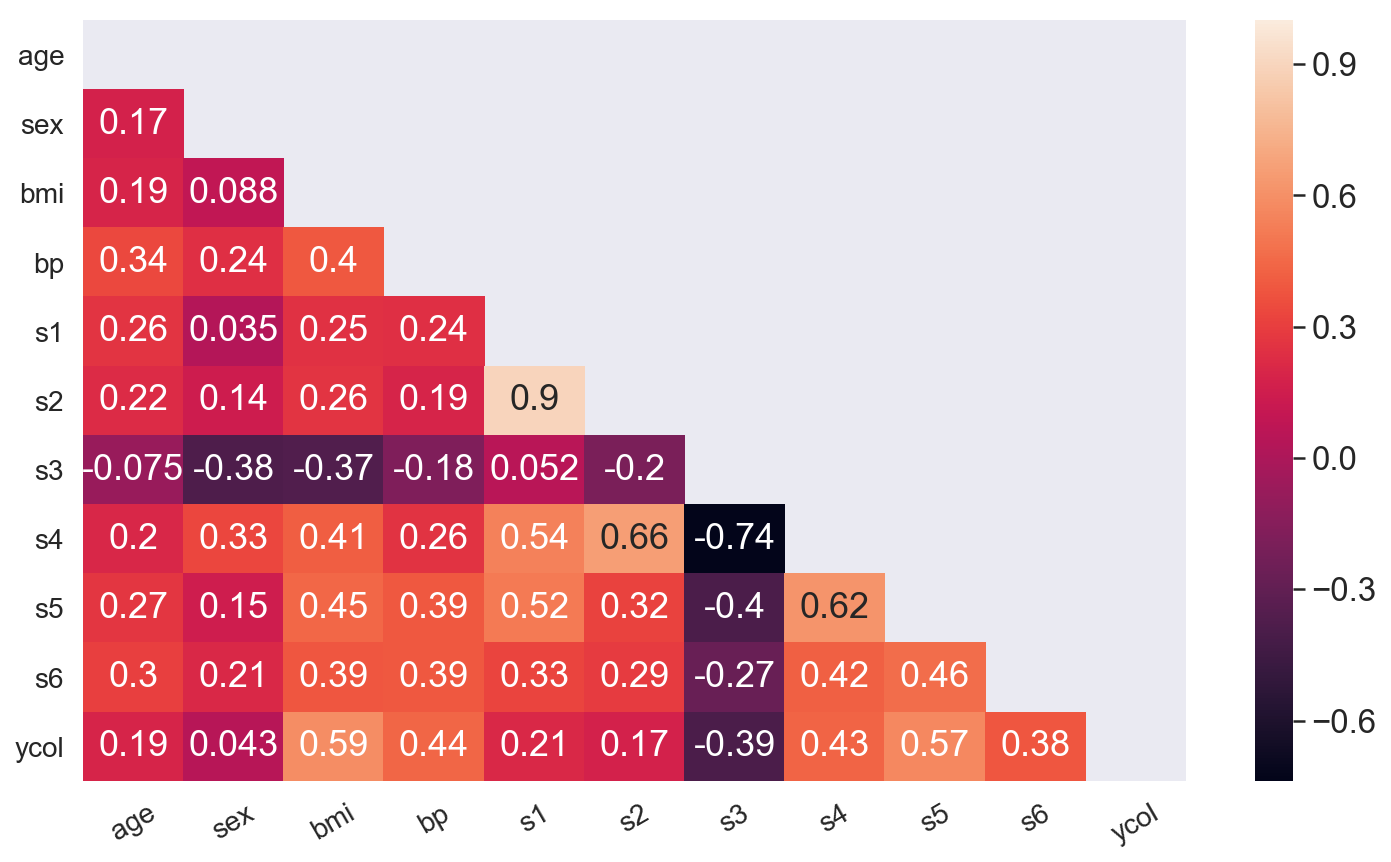

In [108]:
#get the data ready
df, X, y, X_train, y_train, X_test, y_test = regression()

corrs = df.corr()

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(11,7))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corrs, mask=mask, annot=True) #with numbers
#ax = sns.heatmap(corr, mask=mask, ax=ax) #withoutnumbers
# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.    
plt.show()

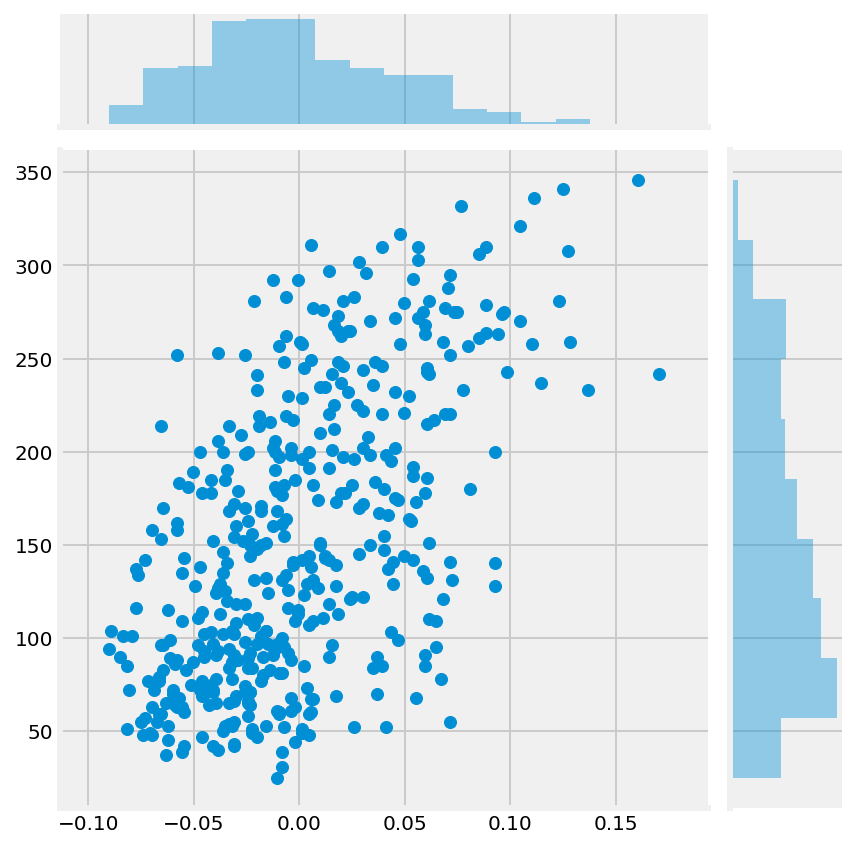

In [105]:
#for a simple model plot each Xcol to y(ensuring linear relation)
sns.jointplot(df['bmi'].values, y)
# sns.jointplot(df[[c for c in df.columns if not c in ['col1', 'col2']]].values, y)
# sns.jointplot(df[[c for c in df.columns if c.startswith('XyZ)].values, y)

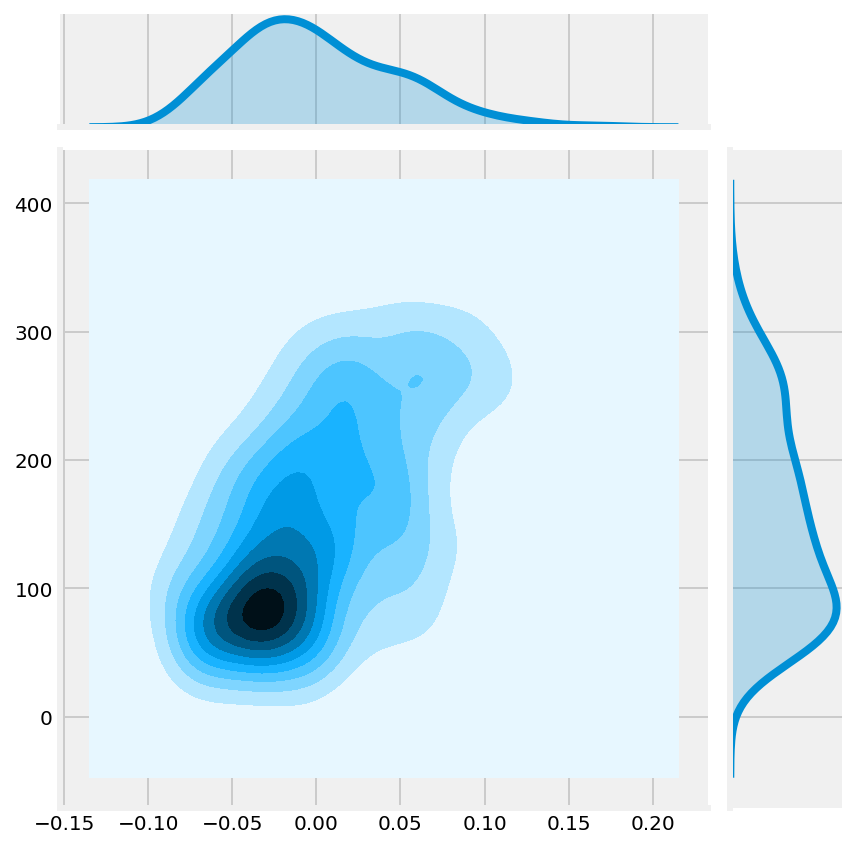

In [106]:
sns.jointplot(df['bmi'].values, y, kind='kde');

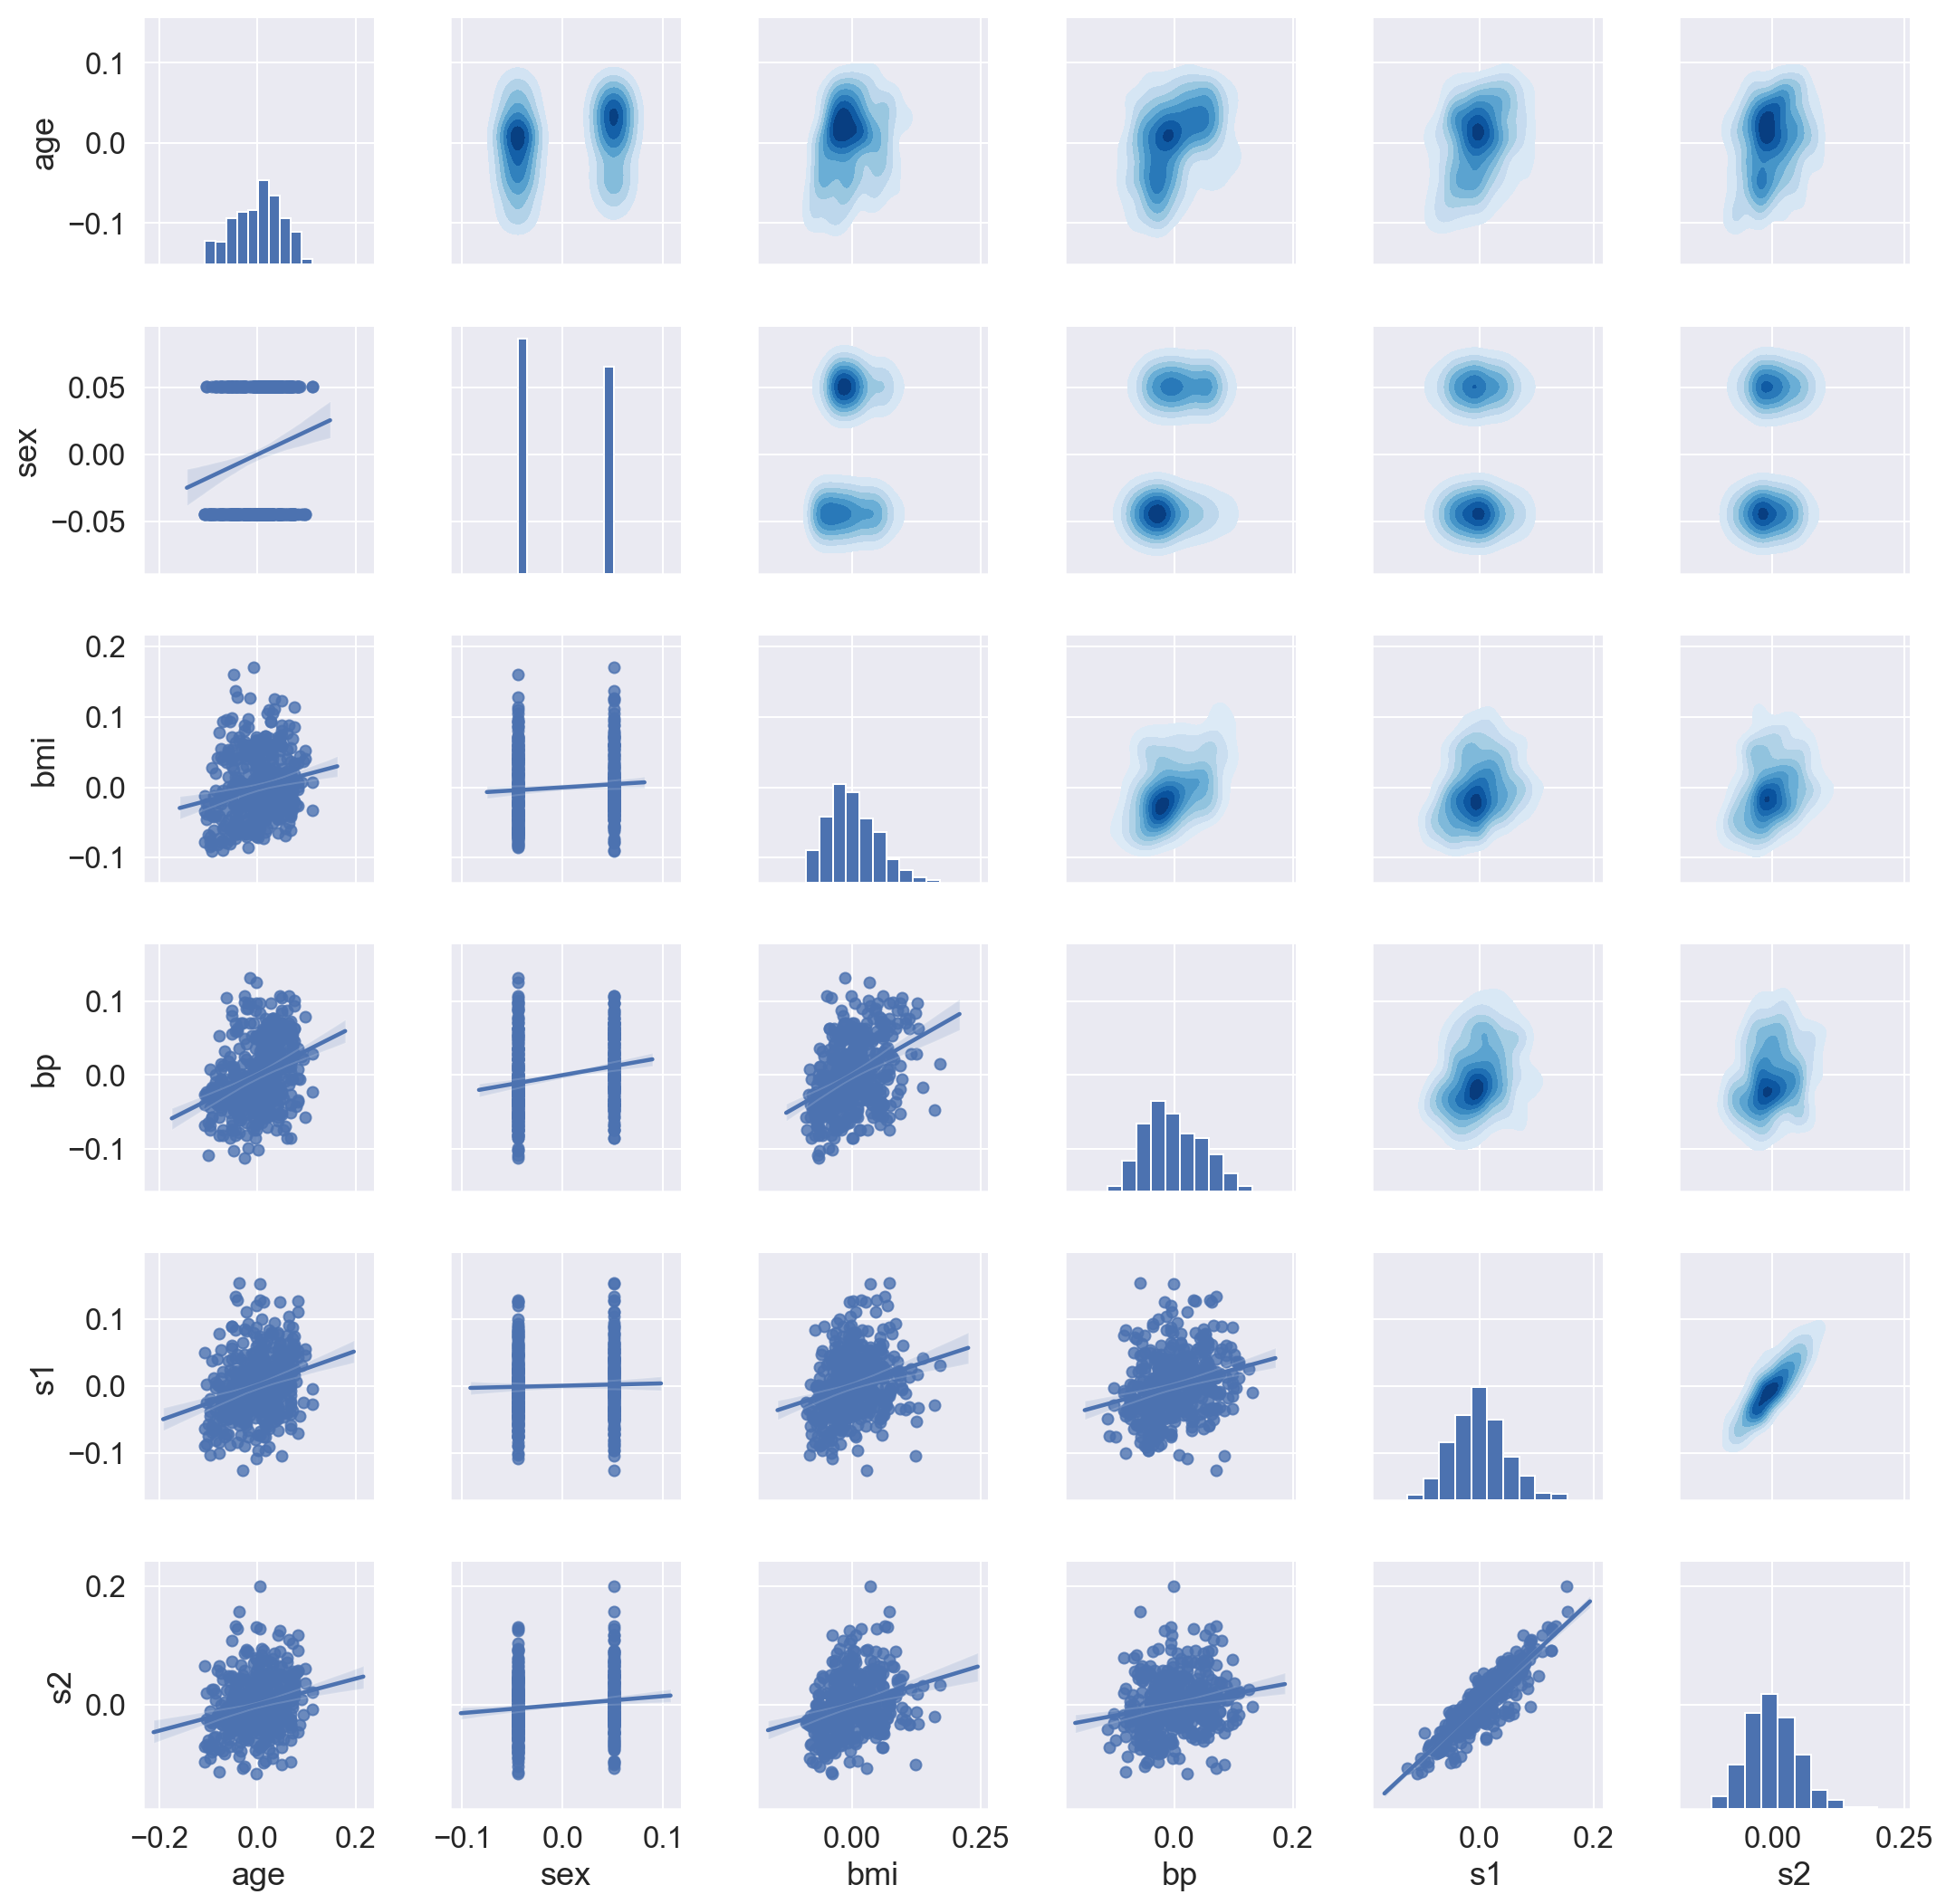

In [112]:
#or more fancy:
sns.set(font_scale=1.5)
g = sns.PairGrid(df[['age','sex','bmi','bp','s1','s2']]) # or 
g = g.map_lower(sns.regplot)    # regression plots in lower tri
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)  # KDE plots in upper tri
g = g.map_diag(plt.hist)        # histograms along diagonal

plt.show()

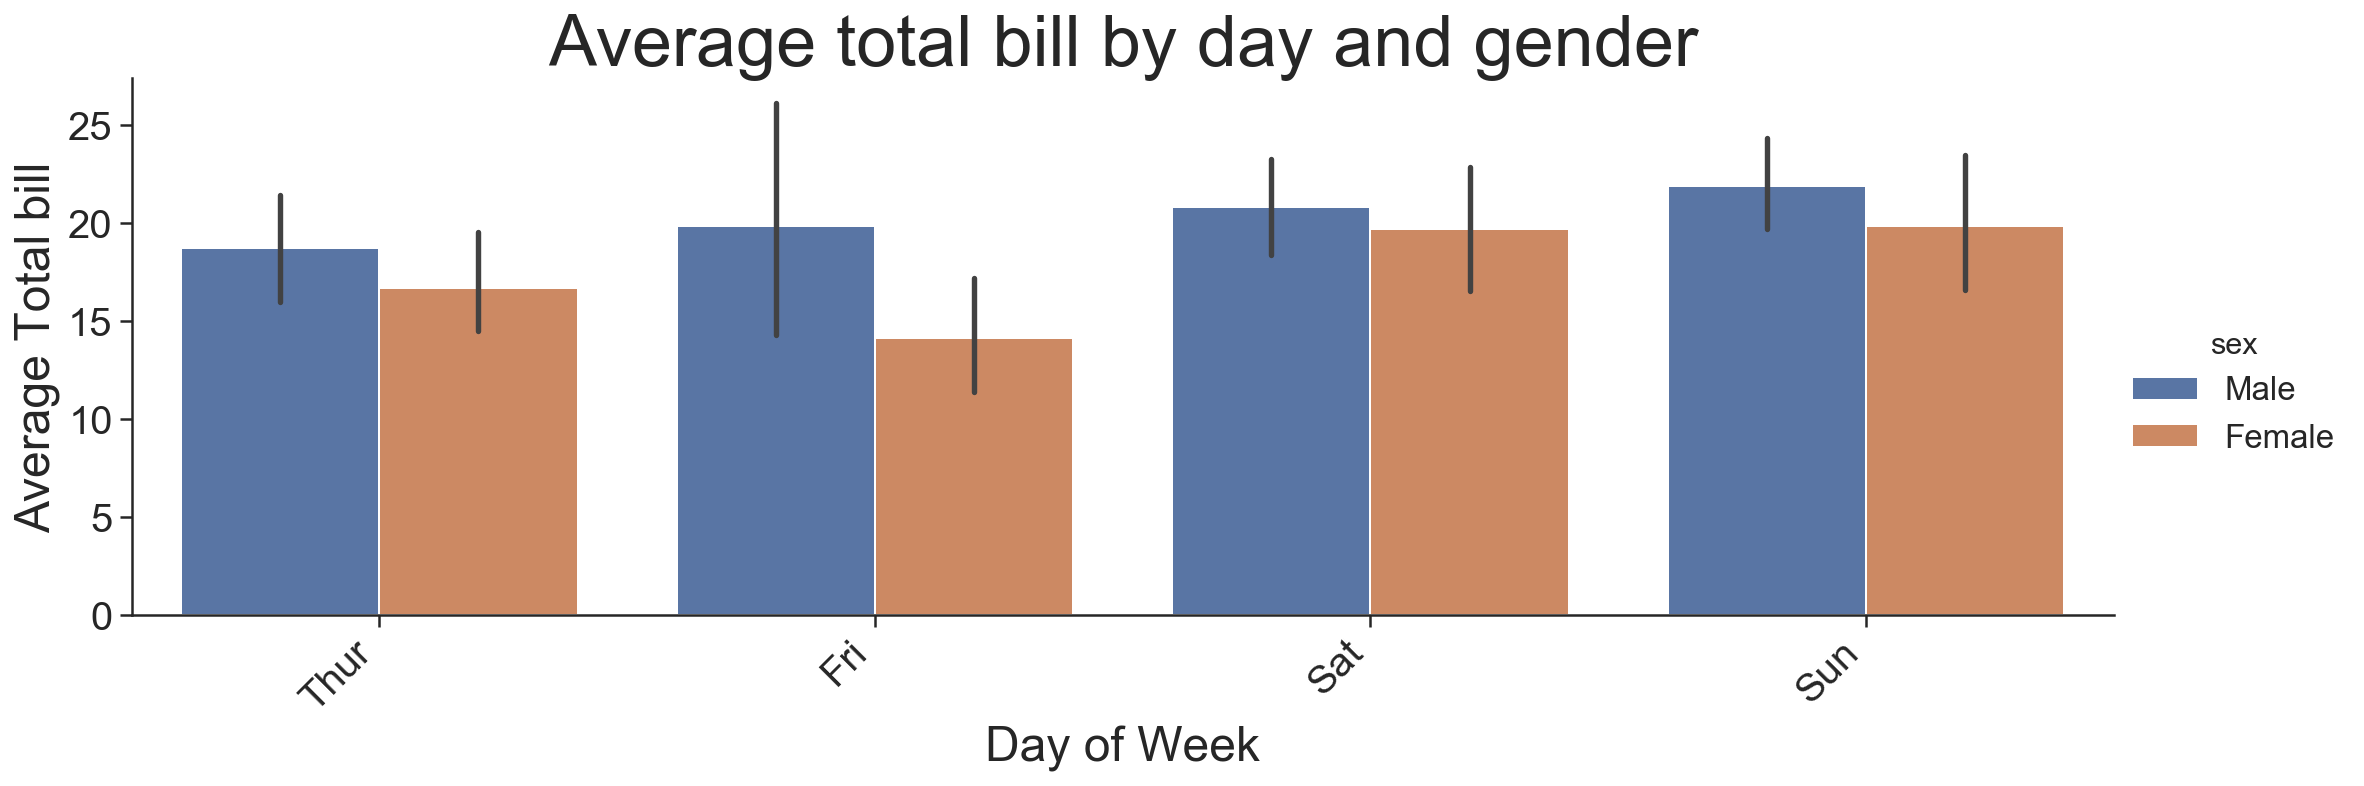

In [114]:
tips = sns.load_dataset('tips')
with sns.axes_style(style='ticks'):
    g = sns.catplot("day", "total_bill", "sex", data=tips, kind='bar', aspect=3)
    g.set_axis_labels("Day", "Total Bill");
    g.set_xticklabels(rotation=45, horizontalalignment='right',
              fontsize=20).set_yticklabels(fontsize=20)
plt.xlabel('Day of Week',fontsize=24)
plt.ylabel('Average Total bill',fontsize=24)
plt.title('Average total bill by day and gender', fontsize=36)
plt.show()

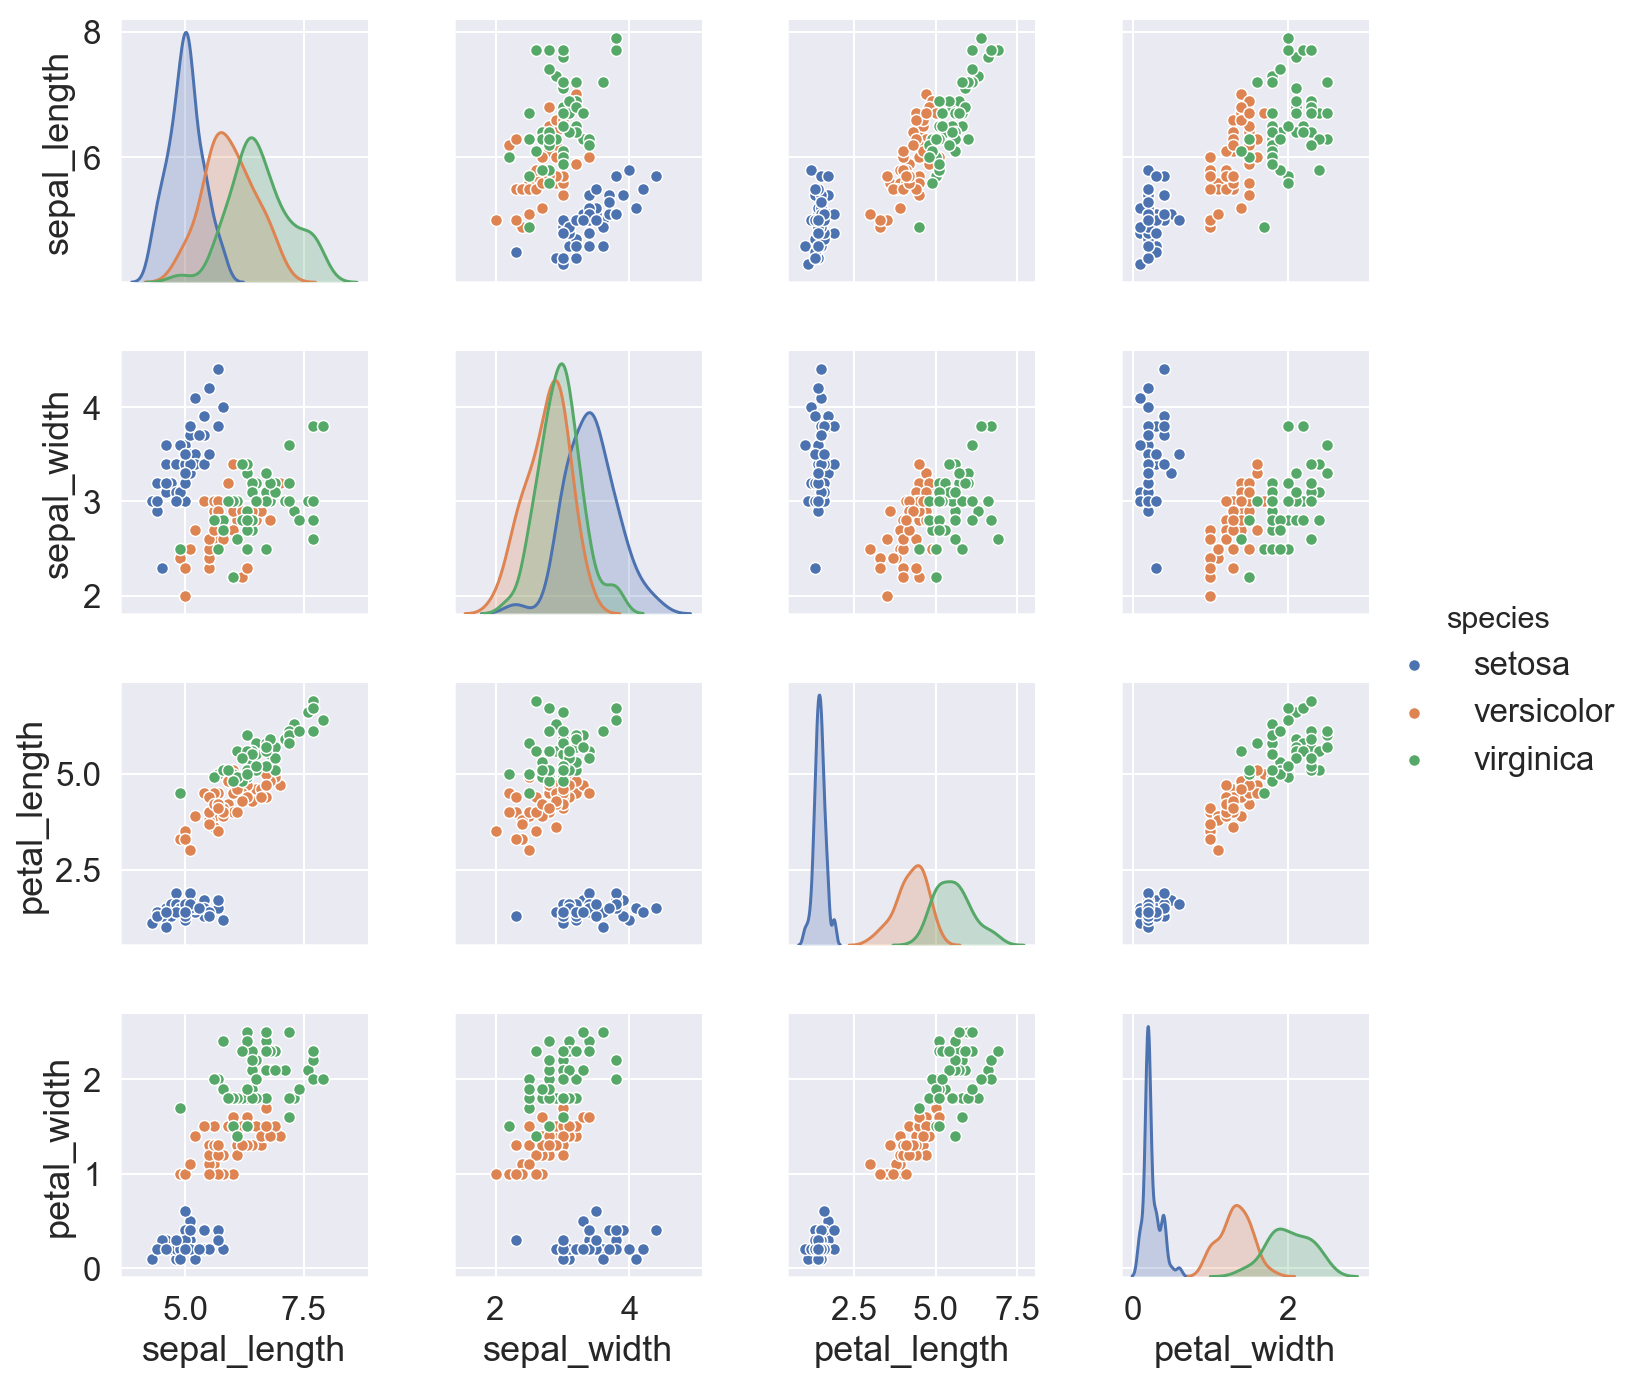

In [116]:
#pair plot with hue can be useful:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue='species', height=2.5);

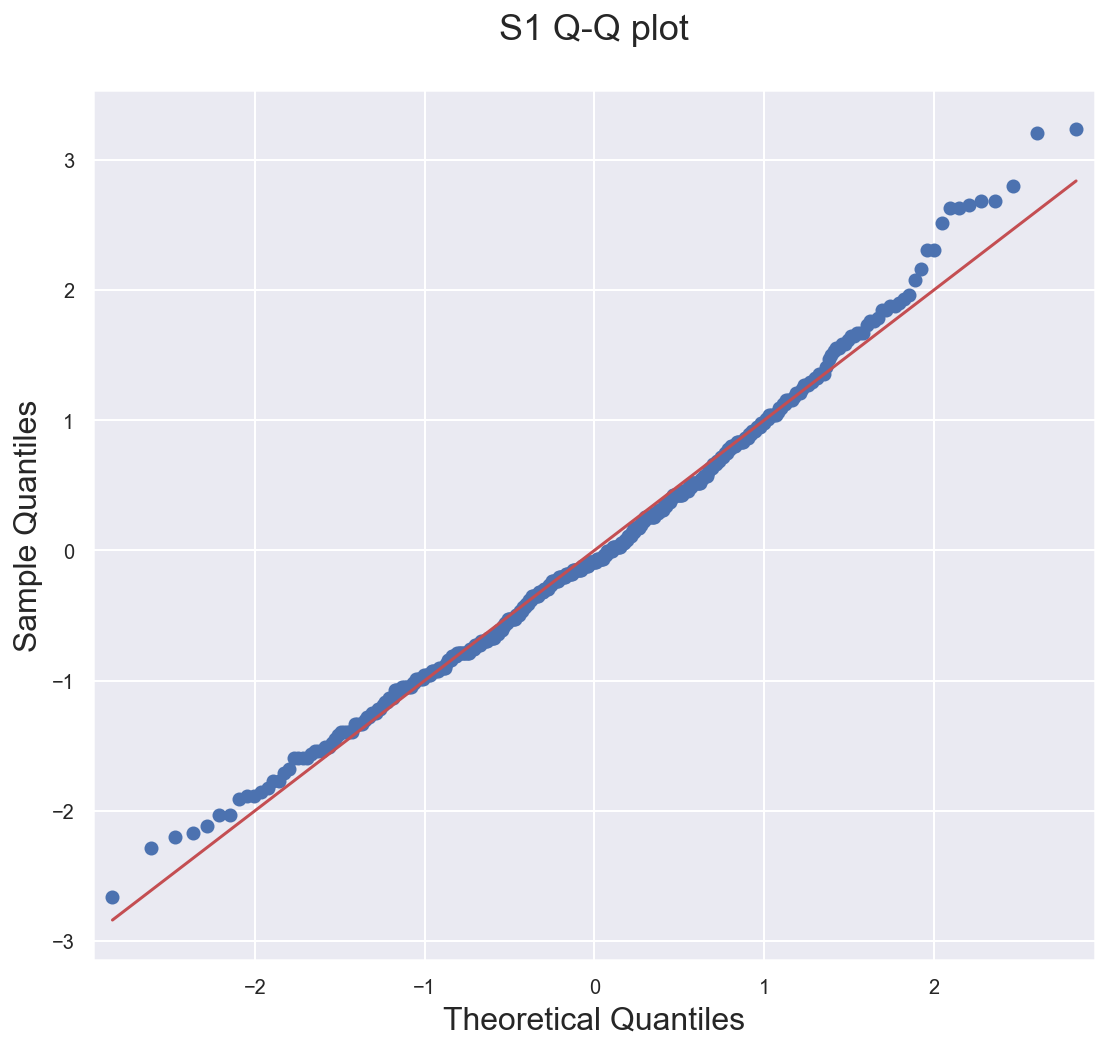

In [117]:
#Q-Q-Plot Check for Normal Distribution
import statsmodels.api as sm
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
sm.qqplot(df['s1'], line='s', fit=True, ax=ax)
plt.xlabel('Theoretical Quantiles', fontsize=16)
plt.ylabel('Sample Quantiles', fontsize=16)
ax.set_title(f"S1 Q-Q plot\n", fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

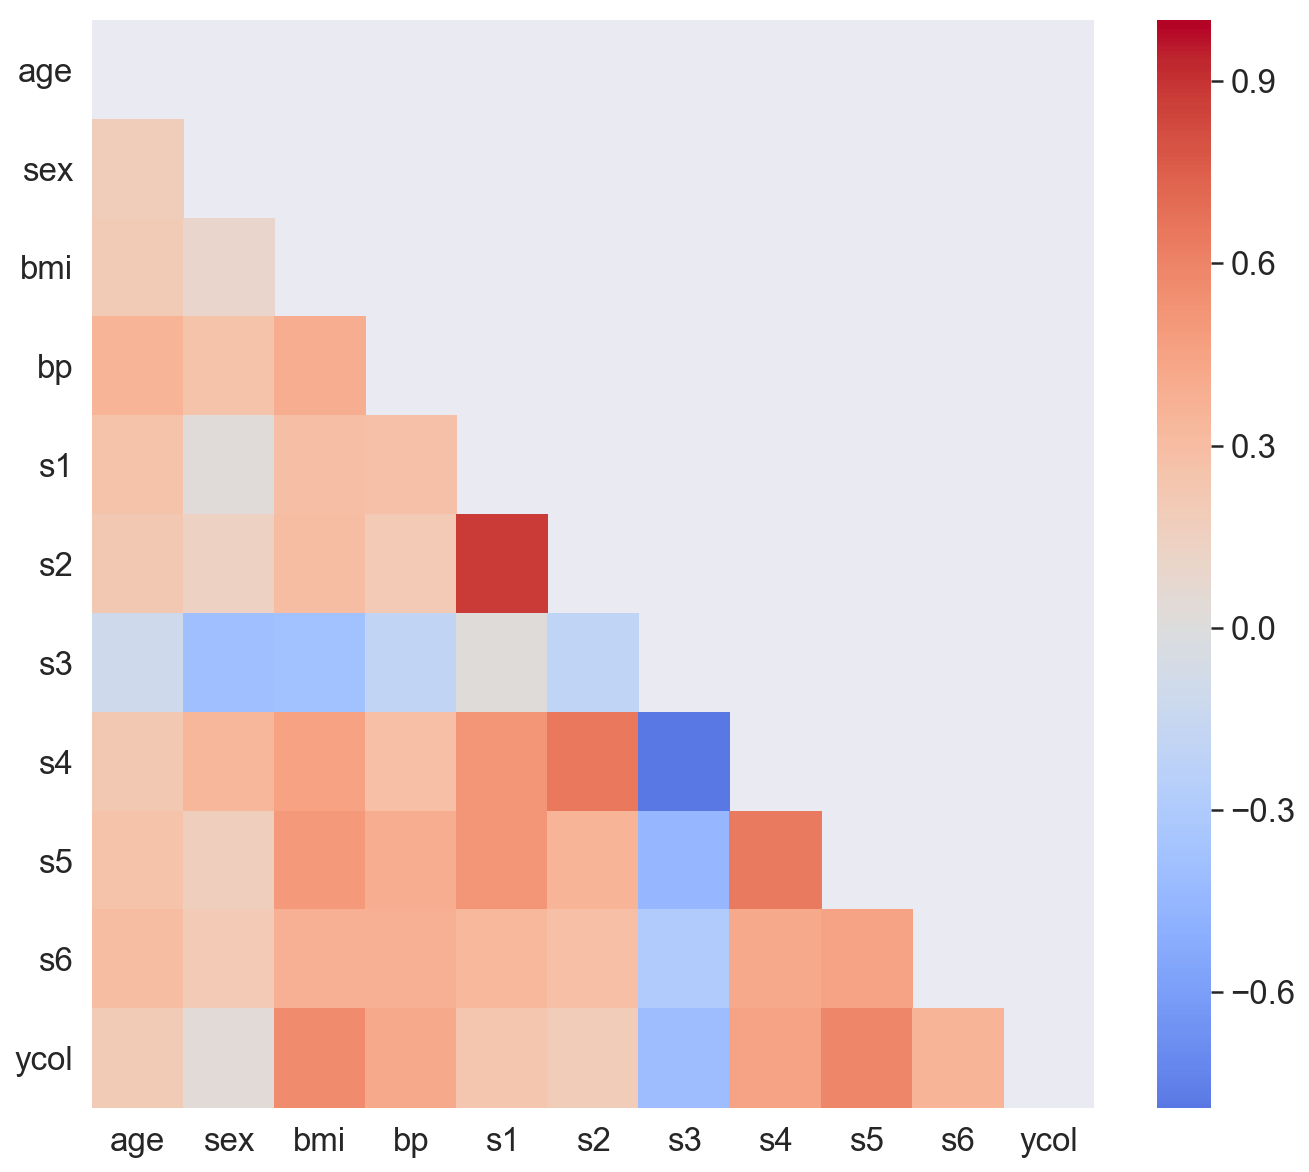

In [118]:
#prettier heatmap
fig, ax = plt.subplots(figsize=(10,10))
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(df.corr(method='spearman'), mask=mask, ax=ax, cmap='coolwarm', center=0) #withoutnumbers
#sns.heatmap(df.corr(method='spearman'), cmap='coolwarm', center=0, annot=True, mask=mask)
plt.yticks(rotation=0);

## Non-linear

Non linear relationships are sometime difficult to detect. Typically theory gives reason to belief.

In [ ]:
#example forthcoming

# Modeling
## Model selection

## Preprocessing

Data will need to be preprocessed for the models to work. Essentially all text needs to be transformed to integers for the models to work. The applies to language as well as categorical data. Although not all models require it, it is best practice to scale the X data. In some cases normalization is required.  
**Notes**   
Text cleaning is considered data cleaning.  
While some SKlearn models will handle NaN's and for quick and dirty prototyping this can be acceptable. Complete data cleaning is assumed here.

### Text

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
df = pd.DataFrame({'tweets': ['one', 'two', 'one two three', 'four'], 'labels': [1, 0, 1, 0]})
vectoriser = CountVectorizer()
df['tweetsVect'] = list(vectoriser.fit_transform(df['tweets']).toarray())
tree = DecisionTreeClassifier()
tree.fit(df['tweetsVect'].tolist(), df['labels'].tolist())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [120]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(token_pattern='\w+', stop_words='english', ngram_range=(2,2))
cvec.fit([spam])

document_matrix = cvec.transform([spam, ham]) # spam ham are LISTS, hence brackets
document_matrix

print("Number of nonzero entries:")
print(document_matrix.nnz)
print("Highest count:")
print(document_matrix.max())
print("Row means:")
print(document_matrix.mean(axis=1))
print("Transform to numpy array format:")
print(document_matrix.toarray())

NameError: name 'spam' is not defined

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
# to save memory, every word gets a unique hash you cannot go back to the original word
hvec = HashingVectorizer(binary=True)
hvec.fit([spam])
#
# .todense() returns it in scipy matrix format.
#
df = pd.DataFrame(hvec.transform([spam]).todense())

df.sort_values(0, ascending=False, axis=1).iloc[:, :20]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer(stop_words='english')
tvec.fit([spam, ham])

df = pd.DataFrame(tvec.transform([spam, ham]).todense(),
                  columns=tvec.get_feature_names(),
                  index=['spam', 'ham'])

df.transpose().sort_values('spam', ascending=False).head(10).transpose()

stopwords = tvec.get_stop_words()
sorted(list(stopwords))[:10]

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

In [121]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

print(stemmer.stem('walks'))
print(stemmer.stem('walked'))
print(stemmer.stem('Walking'))

walk
walk
walk


### Categoricals

#### Encoding

##### Ordinals

Ordinal variables are categorical variables where order matters and an integer value may have a meaning. E.g. 1 to 5 stars, S/M/L T-shirt sizes. Unfortunately SkLearn preprocessors do not deliver any working solution (the sklearn.preprocessing.CategoricalEncoder was planned for  scikit-learn 0.20 but was pulled). Below the Python and the Pandas routes.
  
Obviously this approach is not sound statistically however it is a common practice and often produces meaningful results.

In [122]:
df = pd.DataFrame(data_prep)
#Python
def item_category_maker(x):
    x = x.lower() #force lowercase
    if 'excellent' in x:
        return 5
    elif 'very good' in x :
        return 4
    elif 'good' in x:
        return 3
    elif 'fair' in x:
        return 2
    elif 'appalling' in x:
        return 1
    else:
        return 0 # have a left over answer
    
df['col5'] = df['col4'].map(item_category_maker)
print(df['col5'].unique())
print(df['col5'].value_counts())
df

[5 4 3 2 1]
5    2
4    2
3    2
2    2
1    2
Name: col5, dtype: int64


Col0  Col1   col2 col3       col4 col_a   col_b      colc   ycol  col5
0   row1     1    1.1   -4  excellent   aaa     red       NaN   True     5
1   row2     2    2.2   -3  excellent   bbb    blue    square   True     5
2   row3     3    3.3   -2  very good   ccc   green    square   True     4
3   row4     4    4.4   -1  very good   ddd  orange    circle   True     4
4   row5     5    NaN    0       good   eee     NaN    circle   True     3
5   row6     6    6.6    1       good   fff  purple       ???  False     3
6  row_7     7    7.7    2       fair   ggg   white  triangle  False     2
7  row_8     8    8.8  Nan       fair   hhh   black  triangle  False     2
8   Row9     9    NaN    4  appalling   iii   brown  triangle  False     1
9  Row10    10  100.1    5  appalling   jjj    gray  triangle  False     1

In [123]:
#Pandas
df['col7'] = 0 
df.loc[df['col4'] == 'excellent', 'col7'] = 5
df.loc[df['col4'] == 'very good', 'col7'] = 4
df.loc[df['col4'] == 'good', 'col7'] = 3
df.loc[df['col4'] == 'fair', 'col7'] = 2
df.loc[df['col4'] == 'appalling', 'col7'] = 1
df
#also works as find/replace

Col0  Col1   col2 col3       col4 col_a   col_b      colc   ycol  col5  \
0   row1     1    1.1   -4  excellent   aaa     red       NaN   True     5   
1   row2     2    2.2   -3  excellent   bbb    blue    square   True     5   
2   row3     3    3.3   -2  very good   ccc   green    square   True     4   
3   row4     4    4.4   -1  very good   ddd  orange    circle   True     4   
4   row5     5    NaN    0       good   eee     NaN    circle   True     3   
5   row6     6    6.6    1       good   fff  purple       ???  False     3   
6  row_7     7    7.7    2       fair   ggg   white  triangle  False     2   
7  row_8     8    8.8  Nan       fair   hhh   black  triangle  False     2   
8   Row9     9    NaN    4  appalling   iii   brown  triangle  False     1   
9  Row10    10  100.1    5  appalling   jjj    gray  triangle  False     1   

   col7  
0     5  
1     5  
2     4  
3     4  
4     3  
5     3  
6     2  
7     2  
8     1  
9     1

##### Nominal categorical

Order does not matter and the value assigned has no significance, may be used in classifiers. Dummify/OneHotEncode for regressors   
  ** Note: ** Drop_first will ensure independence and avoid collinearity 

In [124]:
#SKLearn
import category_encoders as ce

# encoder = ce.BackwardDifferenceEncoder(cols=[...])
# encoder = ce.BinaryEncoder(cols=[...])
# encoder = ce.HashingEncoder(cols=[...])
# encoder = ce.HelmertEncoder(cols=[...])
encoder = ce.OneHotEncoder(cols=['col4'])
# encoder = ce.OrdinalEncoder(cols=['col4'])
#encoder = ce.OrdinalEncoder(cols=['col4'])
# encoder = ce.SumEncoder(cols=[...])
# encoder = ce.PolynomialEncoder(cols=[...])
# encoder = ce.BaseNEncoder(cols=[...])
# encoder = ce.TargetEncoder(cols=[...])
# encoder = ce.LeaveOneOutEncoder(cols=[...])

df_clean = encoder.fit_transform(df)
df_clean = df_clean.drop(['col4_1'], axis=1) #drop_first
df_clean

col4_2  col4_3  col4_4  col4_5  col4_-1   Col0  Col1   col2 col3 col_a  \
0       0       0       0       0        0   row1     1    1.1   -4   aaa   
1       0       0       0       0        0   row2     2    2.2   -3   bbb   
2       1       0       0       0        0   row3     3    3.3   -2   ccc   
3       1       0       0       0        0   row4     4    4.4   -1   ddd   
4       0       1       0       0        0   row5     5    NaN    0   eee   
5       0       1       0       0        0   row6     6    6.6    1   fff   
6       0       0       1       0        0  row_7     7    7.7    2   ggg   
7       0       0       1       0        0  row_8     8    8.8  Nan   hhh   
8       0       0       0       1        0   Row9     9    NaN    4   iii   
9       0       0       0       1        0  Row10    10  100.1    5   jjj   

    col_b      colc   ycol  col5  col7  
0     red       NaN   True     5     5  
1    blue    square   True     5     5  
2   green    square   True     4     4  
3  orange    circle   True     4     4  
4     NaN    circle   True     3     3  
5  purple       ???  False     3     3  
6   white  triangle  False     2     2  
7   black  triangle  False     2     2  
8   brown  triangle  False     1     1  
9    gray  triangle  False     1     1

In [125]:
#Pandas
df_clean = pd.get_dummies(data=df, columns=['col4'], prefix_sep= '_', drop_first=True)
df_clean

Col0  Col1   col2 col3 col_a   col_b      colc   ycol  col5  col7  \
0   row1     1    1.1   -4   aaa     red       NaN   True     5     5   
1   row2     2    2.2   -3   bbb    blue    square   True     5     5   
2   row3     3    3.3   -2   ccc   green    square   True     4     4   
3   row4     4    4.4   -1   ddd  orange    circle   True     4     4   
4   row5     5    NaN    0   eee     NaN    circle   True     3     3   
5   row6     6    6.6    1   fff  purple       ???  False     3     3   
6  row_7     7    7.7    2   ggg   white  triangle  False     2     2   
7  row_8     8    8.8  Nan   hhh   black  triangle  False     2     2   
8   Row9     9    NaN    4   iii   brown  triangle  False     1     1   
9  Row10    10  100.1    5   jjj    gray  triangle  False     1     1   

   col4_excellent  col4_fair  col4_good  col4_very good  
0               1          0          0               0  
1               1          0          0               0  
2               0          0          0               1  
3               0          0          0               1  
4               0          0          1               0  
5               0          0          1               0  
6               0          1          0               0  
7               0          1          0               0  
8               0          0          0               0  
9               0          0          0               0

For classifiers a categoriser is a better option

In [126]:
import category_encoders as ce

# encoder = ce.BackwardDifferenceEncoder(cols=[...])
# encoder = ce.BinaryEncoder(cols=[...])
# encoder = ce.HashingEncoder(cols=[...])
# encoder = ce.HelmertEncoder(cols=[...])
# encoder = ce.OneHotEncoder(cols=['col4'])
# encoder = ce.OrdinalEncoder(cols=['col4'])
encoder = ce.OrdinalEncoder(cols=['colc'])
# encoder = ce.SumEncoder(cols=[...])
# encoder = ce.PolynomialEncoder(cols=[...])
# encoder = ce.BaseNEncoder(cols=[...])
# encoder = ce.TargetEncoder(cols=[...])
# encoder = ce.LeaveOneOutEncoder(cols=[...])

df_clean = encoder.fit_transform(df)
# X_cleaned = encoder.transform(X_dirty)
df_clean

Col0  Col1   col2 col3       col4 col_a   col_b   ycol  col5  col7  colc
0   row1     1    1.1   -4  excellent   aaa     red   True     5     5     1
1   row2     2    2.2   -3  excellent   bbb    blue   True     5     5     2
2   row3     3    3.3   -2  very good   ccc   green   True     4     4     2
3   row4     4    4.4   -1  very good   ddd  orange   True     4     4     3
4   row5     5    NaN    0       good   eee     NaN   True     3     3     3
5   row6     6    6.6    1       good   fff  purple  False     3     3     4
6  row_7     7    7.7    2       fair   ggg   white  False     2     2     5
7  row_8     8    8.8  Nan       fair   hhh   black  False     2     2     5
8   Row9     9    NaN    4  appalling   iii   brown  False     1     1     5
9  Row10    10  100.1    5  appalling   jjj    gray  False     1     1     5

Good explanation of:
- encoder = ce.BackwardDifferenceEncoder(cols=['Col1'])
- encoder = ce.HelmertEncoder(cols=[...])  
- encoder = ce.SumEncoder(cols=[...])
http://psych.colorado.edu/~carey/Courses/PSYC5741/handouts/Coding%20Categorical%20Variables%202006-03-03.pdf

Create a unigue binary code for each category:
- encoder = ce.BinaryEncoder(cols=['colc'])
- encoder = ce.HashingEncoder(cols=[...])
 

encoder = ce.BaseNEncoder(cols=[...])
encoder = ce.TargetEncoder(cols=[...])
https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
encoder = ce.LeaveOneOutEncoder(cols=[...])
https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf


##### Booleans

While most models will handle booleans out of the box for consistency purposes these may be encoded. **note** When creating 2 separate columns drop 1

In [127]:
df['ycol'] = df['ycol']*1
df

Col0  Col1   col2 col3       col4 col_a   col_b      colc  ycol  col5  \
0   row1     1    1.1   -4  excellent   aaa     red       NaN     1     5   
1   row2     2    2.2   -3  excellent   bbb    blue    square     1     5   
2   row3     3    3.3   -2  very good   ccc   green    square     1     4   
3   row4     4    4.4   -1  very good   ddd  orange    circle     1     4   
4   row5     5    NaN    0       good   eee     NaN    circle     1     3   
5   row6     6    6.6    1       good   fff  purple       ???     0     3   
6  row_7     7    7.7    2       fair   ggg   white  triangle     0     2   
7  row_8     8    8.8  Nan       fair   hhh   black  triangle     0     2   
8   Row9     9    NaN    4  appalling   iii   brown  triangle     0     1   
9  Row10    10  100.1    5  appalling   jjj    gray  triangle     0     1   

   col7  
0     5  
1     5  
2     4  
3     4  
4     3  
5     3  
6     2  
7     2  
8     1  
9     1

In [128]:
df.T.copy()

0          1          2          3       4       5         6  \
Col0        row1       row2       row3       row4    row5    row6     row_7   
Col1           1          2          3          4       5       6         7   
col2           1          2          3          4     NaN       7         8   
col3          -4         -3         -2         -1       0       1         2   
col4   excellent  excellent  very good  very good    good    good      fair   
col_a        aaa        bbb        ccc        ddd     eee     fff       ggg   
col_b        red       blue      green     orange     NaN  purple     white   
colc         NaN     square     square     circle  circle     ???  triangle   
ycol           1          1          1          1       1       0         0   
col5           5          5          4          4       3       3         2   
col7           5          5          4          4       3       3         2   

              7          8          9  
Col0      row_8       Row9      Row10  
Col1          8          9         10  
col2          9        NaN      1e+02  
col3        Nan          4          5  
col4       fair  appalling  appalling  
col_a       hhh        iii        jjj  
col_b     black      brown       gray  
colc   triangle   triangle   triangle  
ycol          0          0          0  
col5          2          1          1  
col7          2          1          1

### Numericals

#### Nominals

In [142]:
# Box-Cox transforms not normally distributed data to possible more of a normal distribution
# SKlearn 0.20 onwards

# df = pd.DataFrame(data_prep)
# from sklearn.preprocessing import PowerTransformer
# pt = PowerTransformer()
# X = df.Col1.values.reshape(-1, 1) # or X = df[['Col1']]
# print(pt.fit)
# df['col8'] = pt.fit_transform(X)
# df['col9'] = pt.inverse_transform(df[['col8']])
# df

In [159]:
#old-school scipy :-)
df = pd.DataFrame(data_prep)
df['col2']= [0.8, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 90.9, 100.1]
from scipy.stats import boxcox
from scipy.special import inv_boxcox

X = df.col2.values.reshape(-1, 1) # or X = df[['Col1']]
df['col8'] = boxcox(X)[0]
print(f'Lambda used: {boxcox(X)[1]}')
# and back to the original value
df['col9'] = inv_boxcox(df['col8'], boxcox(X)[1])
df

Lambda used: [-0.19631787]


Col0  Col1   col2 col3       col4 col_a   col_b      colc   ycol  col8  \
0   row1     1    0.8   -4  excellent   aaa     red       NaN   True  -0.2   
1   row2     2    2.2   -3  excellent   bbb    blue    square   True   0.7   
2   row3     3    3.3   -2  very good   ccc   green    square   True   1.1   
3   row4     4    4.4   -1  very good   ddd  orange    circle   True   1.3   
4   row5     5    5.5    0       good   eee     NaN    circle   True   1.4   
5   row6     6    6.6    1       good   fff  purple       ???  False   1.6   
6  row_7     7    7.7    2       fair   ggg   white  triangle  False   1.7   
7  row_8     8    8.8  Nan       fair   hhh   black  triangle  False   1.8   
8   Row9     9   90.9    4  appalling   iii   brown  triangle  False   3.0   
9  Row10    10  100.1    5  appalling   jjj    gray  triangle  False   3.0   

    col9  
0    0.8  
1    2.2  
2    3.3  
3    4.4  
4    5.5  
5    6.6  
6    7.7  
7    8.8  
8   90.9  
9  100.1

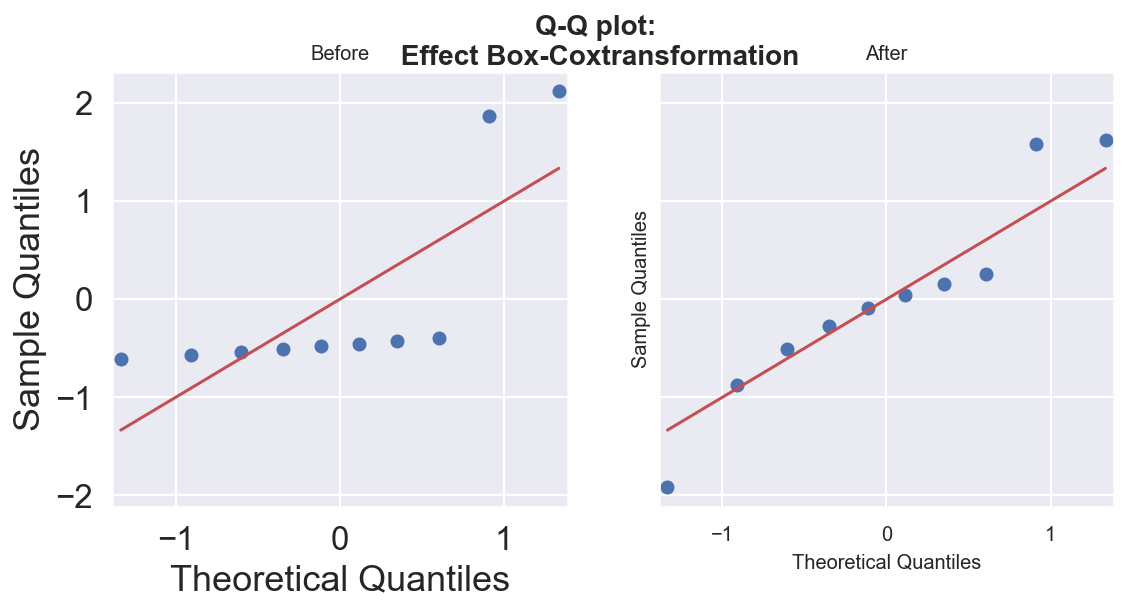

In [179]:
#Q-Q-Plot Check for Normal Distribution, compare befor and after
import statsmodels.api as sm
fig, ax = plt.subplots(ncols=2,figsize=(8,4), sharey=True)
sm.qqplot(df['col2'], line='s', fit=True, ax=ax[0])

ax[0].set_title("Before",fontsize=10)

sm.qqplot(df['col8'], line='s', fit=True, ax=ax[1])
ax[1].set_title("After", fontsize=10)
fig.suptitle('Q-Q plot:\n Effect Box-Coxtransformation', fontsize=14, fontweight='bold')
plt.xlabel('Theoretical Quantiles', fontsize=10)
plt.ylabel('Sample Quantiles', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()



#### Polynomials

In [150]:
df = pd.DataFrame(data_prep)
df = df.dropna()

from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
poly_df = pf.fit_transform([df['Col1'], df['col2']][:3])
poly_df = pd.DataFrame(poly_df, columns=pf.get_feature_names())
poly_df

1   x0   x1   x2   x3   x4   x5     x6  x0^2  x0 x1   ...     x3^2  \
0  1.0  2.0  3.0  4.0  6.0  7.0  8.0   10.0   4.0    6.0   ...     36.0   
1  1.0  2.2  3.3  4.4  6.6  7.7  8.8  100.1   4.8    7.3   ...     43.6   

   x3 x4  x3 x5  x3 x6  x4^2  x4 x5  x4 x6  x5^2  x5 x6     x6^2  
0   42.0   48.0   60.0  49.0   56.0   70.0  64.0   80.0    100.0  
1   50.8   58.1  660.7  59.3   67.8  770.8  77.4  880.9  10020.0  

[2 rows x 36 columns]

#### Normalizing
Normalization forces the data between 0 and 1. Used whet negative numbers are not allowed. (e.g. log transformation)

In [185]:
#get data and inverse the scaling, to go to the unscaled data set
df, X, y, X_train, y_train, X_test, y_test = multiclass()
X_train = ss.inverse_transform(X_train)
X_test = ss.inverse_transform(X_test)
from sklearn.preprocessing import Normalizer
# initialize the Scaler
nor = Normalizer()
# Fit the data using the scaler (scale the data)
nor.fit(X_train) #scale on X-train
#or subset X = ss.fit_transform(df[['col1', 'col2']]) 
X_train = nor.transform(X_train)#transform the data sets
X_test= nor.transform(X_test)
print (X.mean(), X.std())

#In DF formate:
nor = Normalizer()
X = pd.DataFrame(nor.fit_transform(df), columns = df.columns)

Iris Dataset Data has been created for multiclass ML
Shape df (150, 5)
Shape X (150, 4)
Shape y (150,)
Shape X_train (105, 4)
Shape y_train (105,)
Shape X_test (45, 4)
Shape y_test (45,)
Mean X 3.2566542055671256e-16, should be close to 0
Std X 0.9999999999999999, should be close to 1
Available columns ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)' 'ycol']
-0.027797658101110536 0.9722373013457107


## Define X and y

In [ ]:
# remove categorical features
df.drop(['col1', 'col2', 'col3'], axis=1, inplace=True)
#or dummify
pd.get_dummies(df,columns=['col1'])
#X = pd.get_dummies(X,drop_first=True) #drop_first=True if using in a model, to avoid complete collinearity

# if you do not use patsy:
# define X and y
X = df.drop('yCol', axis=1)
# or
X = [['col1', 'col2', 'col3']] #!!!!!! [[]] 
y = df['ycol'].values
#or
X = df[[c for c in df.columns if not c in ['col1', 'col2']]]
X = df[[c for c in df.columns if c.startswith('XyZ')]]
#or with y in last column
feature_set = X  == data.iloc[:, :-1]
target = y == data.iloc[:, -1]



### Train test split

Create the hold-out set

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(105, 5) (105,)
(45, 5) (45,)


#### Scaling

Aligning all the features to the same scale is needed for all modelling based on distance. The simple intuition is that when one feature is measured in centimeters and the other one in kilometers the former one will be blown away by the latter. The Standard Scaler standardizes/scales centers of the data around its mean 0 with std 1. (hence can be negative)

Only scale the feature space X, not y. Scaling y would loose its unit of measure .  
** Note ** for decisionstrees : scaling  y is possible(and wise!)

It is a common practise to always scale X, even if it is not necessarily needed. The big advantage of always scaling is that when gridsearchng a generic set of hyper paramters can be used.

In case of a train-test split scaling of the test set should happen with the _training set_ mean and std.
Likewise for prediction on new data, the new data needs to be scaled on whatever set the final model was trained on, likely the complete X.


In [208]:
from sklearn.preprocessing import StandardScaler
# initialize the Scaler
ss = StandardScaler()
# Fit the data using the scaler (scale the data)
ss.fit(X_train) #scale on X-train
#or subset X = ss.fit_transform(df[['col1', 'col2']]) 
X_train_ = ss.transform(X_train, copy=True)#transform the data sets
X_test= ss.transform(X_test)
print (f'Training set Scaled mean: {round(X_train.mean(),3)}, Scaled Standard deviation: {X_train.std()}')
print (f'Test set Scaled mean: {round(X_test.mean(),3)}, Scaled Standard deviation: {X_test.std()}')

# #In DF format:
# scaler = StandardScaler()
# pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

Training set Scaled mean: -0.0, Scaled Standard deviation: 1.0
Test set Scaled mean: -0.01, Scaled Standard deviation: 1.042875894095468


In [209]:
ss.get_params

<bound method BaseEstimator.get_params of StandardScaler(copy=True, with_mean=True, with_std=True)>

In [212]:
X_train = ss.inverse_transform(X_train_)

## Processing

### SKlearn Generic proces - Regression

In [214]:
#Set up simplae data
df = pd.DataFrame({'X': [1, 2, 3, 3, 4], 'y': [2, 3, 4, 4, 3]})
from sklearn.linear_model import LinearRegression
#define X and y
X = df[['X']]# or df_.X.values.reshape(-1,1)
y = df[['y']]# or df_.y.values.reshape(-1,1)
model = LinearRegression()
#train the model
model.fit(X,y)

#Note, for symplicity sake the data has not been scaled

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Methods

- model.fit(X, y[, sample_weight])  
Fit linear model.
- model.get_params([deep])	
Get parameters for this estimator.
- model.predict(X)	
Predict using the linear model
- model.score(X, y[, sample_weight])  
Returns the coefficient of determination R^2 of the prediction.
- model.set_params(** params)	
Set the parameters of this estimator.

Get the coeficients and intercept by:
- model.coef_   
- model.intercept_ 

In [215]:
#get the model parameters
model.get_params

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [224]:
# Predict on a new data set
pd.set_option("display.precision", 2) #just the display!
dfpred = pd.DataFrame({'Xpred': [3,5,2,6]})
Xpred = dfpred[['Xpred']]
dfpred['ypred'] = model.predict(Xpred)
dfpred

Xpred  ypred
0      3   3.38
1      5   4.31
2      2   2.92
3      6   4.77

In [225]:
#Get the models score
print(f"The model's R squared = {round(model.score(X,y),3)}")

The model's R squared = 0.396


In [226]:
model.coef_

array([[0.46153846]])

In [227]:
model.intercept_

array([2.])

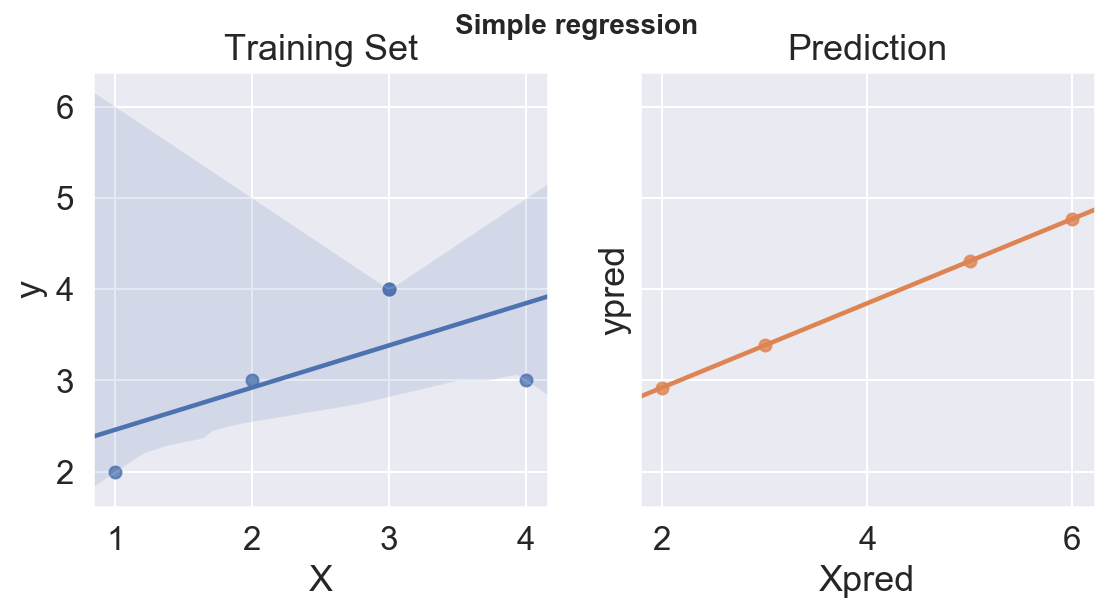

In [228]:
fig, axs = plt.subplots(ncols=2,figsize=(8,4), sharey=True)

sns.regplot(x='X', y='y', data=df, ax=axs[0])
axs[0].set_title("Training Set")
sns.regplot(x='Xpred', y='ypred', data=dfpred, ax=axs[1])
axs[1].set_title("Prediction")
fig.suptitle('Simple regression', fontsize=14, fontweight='bold')

plt.show();

## SKlearn generic Cross Validation process


Cross-validation, sometimes called rotation estimation, is a model validation technique for assessing how the results of a statistical analysis will generalize to an independent data set. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice (https://www.researchgate.net/profile/Dibyajyoti_Chutia2).  

The goal of cross-validation is to estimate the expected level of fit of a model to a data set that is independent of the data that were used to train the model. 

Cross-validation is, thus, a generally applicable way to predict the performance of a model on unavailable data using numerical computation in place of theoretical analysis (https://en.wikipedia.org/wiki/Cross-validation_%28statistics%29#Measures_of_fit).

What you are looking for is **low** variability in the scores, i.e. consistent. High variability indicates bad generalization. (whereby consistently low scores indicate underfitting and consistently high scores overfitting)

Best practice is that CV does **not** dismiss the need for a train-test split, whereby the test set represents a $true$ hold-out set.

How many K- folds should there be:
    - Maximum is cv=n-1 aka Leave One Out CV aka LOOCV
    - For a classification problem  a good rule of thumb is that the smallest class should still have 30 occurences in every fold. 30 as a number of were a normal distribution becomes apparent. E.g. if the smallest class has >60 occurances cv=2, if >90: cv=3, etc. (when this is the case consider looking at the up/down sampling section) 
    - Minimum is number of folds K / number occurances in smallest class = 2, setting stratify=y. 
    - Bottomline: small datasets: cv=3, large datasets cv=5, with a holdout (train/test split) of 0,3 or 0,2
    
Ultimately, the final model gets retrained on the full data set. So no need to be too fuzzy

It is important to realise that CV does not improve a model's predictive score, actually it has a negative effect (because training data is taken away). CV allows a preview of how well the model will perform when new data is presented.

#### Training

## SKlearn generic Cross Validation process - Regression


#### Training

In [230]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn. metrics import r2_score


df = pd.DataFrame({'X': [1, 2, 3, 3, 4, 1, 2, 3, 3, 4, 1, 2, 3, 3, 4], 'y': [
                   2, 3, 4, 4, 3, 2, 3, 4, 4, 3, 2, 3, 4, 4, 3]})
df = df.append([df]*10) #create a larger dataset
from sklearn.linear_model import LinearRegression
X = df[['X']]  # or df_['X'].values.reshape(-1,1)
y = df['y']  # or df_['y'].values.reshape(-1,1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2)

from sklearn.preprocessing import StandardScaler
# initialize the Scaler
ss = StandardScaler()
# Fit the data using the scaler (scale the data)
ss.fit(X_train) #scale on X-train
#or subset X = ss.fit_transform(df[['col1', 'col2']]) 
X_train = ss.transform(X_train)#transform the data sets
X_test = ss.transform(X_test)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
model = LinearRegression()

# Perform 5-fold cross validation
scores = cross_val_score(model, X_train, y_train, cv=5)
model.fit(X_train, y_train)
# y_test_pred = model.predict(X_test)
r2_test = model.score(X_test, y_test)
print("Cross-validated scores:", scores)
print(f'Mean R2 of the trainning folds: {scores.mean()}')
print(f'R2 on test set: {r2_test}')
print('High variance in the scores. This means low and inconsistant predictive value')

(132, 1) (132,)
(33, 1) (33,)
Cross-validated scores: [0.43582584 0.19709354 0.52095364 0.38967675 0.34150122]
Mean R2 of the trainning folds: 0.3770101982273338
R2 on test set: 0.39339302441150814
High variance in the scores. This means low and inconsistant predictive value


#### Testing

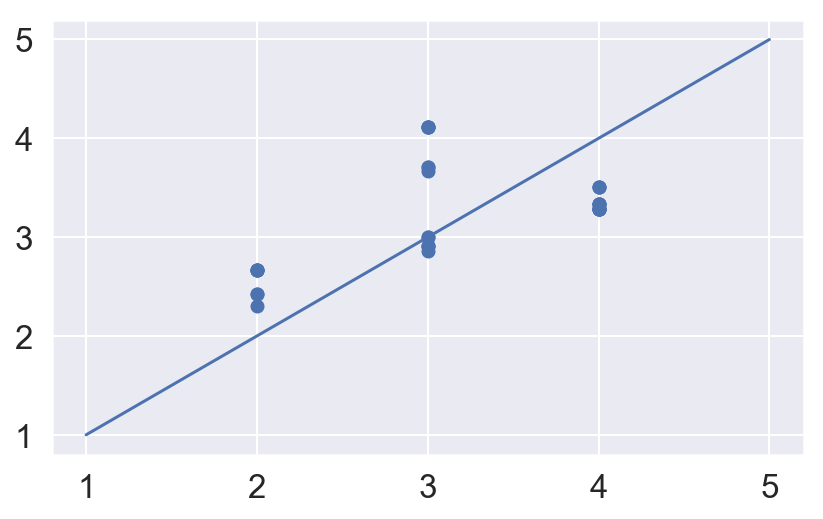

In [231]:
# Make cross validated predictions on the test sets
predictions = cross_val_predict(model, X_test, y_test)
#simple plot
point_1 = [1,5]
plt.plot(point_1,point_1)
plt.scatter(y_test, predictions)
plt.show()

#### Predicting on new data

Happens with the original (and accepted) model. I.e.  there is **not** something like cross_val(dot)predict. The predictions from cross_val_predict(model, X_train,y_train, cv=5) are the concatination of the predicted values from the hold-out fold of each iteration. For instance for 100 rows and cv=5, the first 20 come from the hold-out set from iteration 1 and the second 20 from  the hold out of the second iteration etc. (https://stackoverflow.com/questions/41458834/how-is-scikit-learn-cross-val-predict-accuracy-score-calculated/41524968#41524968)   

This means for prediction the, cross validated and accepted, model should be fitted on the complete data set first. I.e. not just the training set.

In [232]:
pd.set_option("display.precision", 2) #just the display!
dfpred = pd.DataFrame({'Xnew': [3,5,2,4]}) #create new X
ss = StandardScaler()
ss.fit_transform(X) # fit Scaler on entire data set
Xpred = ss.transform(dfpred[['Xnew']]) # scale new data with same mean
model.fit(X,y) # fit model on entire data set
dfpred['ypred'] = model.predict(Xpred) #predict new y's
dfpred

Xnew  ypred
0     3   2.18
1     5   3.09
2     2   1.73
3     4   2.63

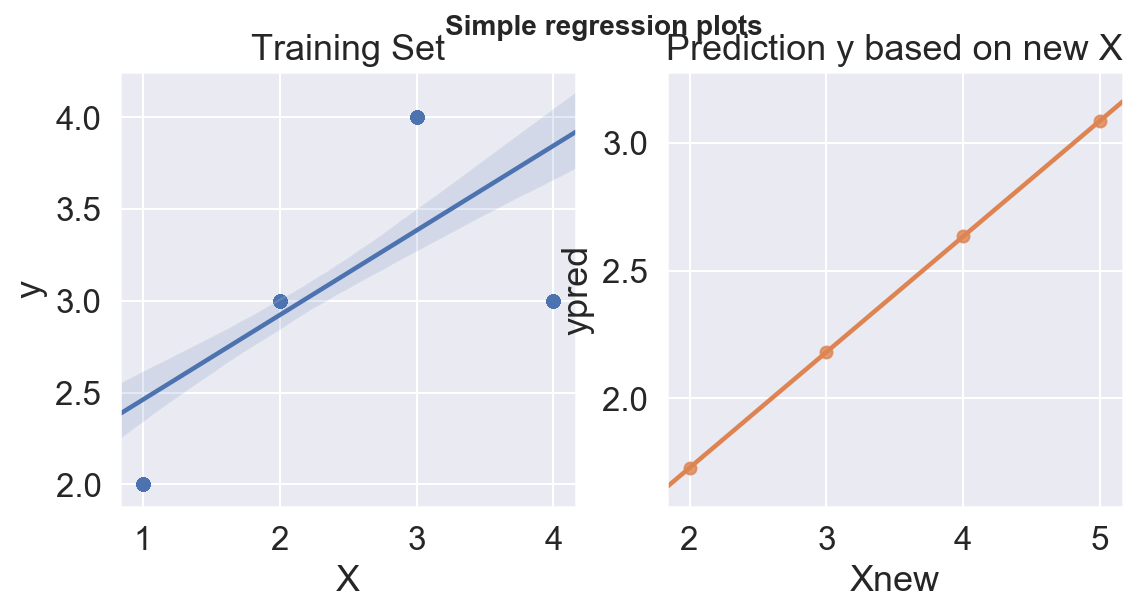

In [235]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))#, sharey=True)

sns.regplot(x='X', y='y', data=df, ax=axs[0])
axs[0].set_title("Training Set")
sns.regplot(x='Xnew', y='ypred', data=dfpred, ax=axs[1])
axs[1].set_title("Prediction y based on new X")
fig.suptitle('Simple regression plots', fontsize=14, fontweight='bold')

plt.show()

#### Training (more) complex model

In [380]:
df, X, y, X_train, y_train, X_test, y_test = regression()

Diabetes Dataset Data has been created for Regression ML
Shape df (442, 11)
Shape X (442, 10)
Shape y (442,)
Shape X_train (309, 10)
Shape y_train (309,)
Shape X_test (133, 10)
Shape y_test (133,)
Mean X 1.1497455271199033e-17, should be close to 0
Std X 1.0, should be close to 1
Available columns in df ['age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6' 'ycol']


#### Create a dummy prediction

Making a dummy (or naive) prediction provides a score to beat. Obviously the performance depends heavily on the distribution of y

In [397]:
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy='median') #not using mean just to show r2 can be something else than 0
dummy.fit(X_train,y_train)
print(f"The dummy's R squared = {round(dummy.score(X_test ,y_test),3)}")
#showing it will always predict the median y
print('\n')
print(f'median y: {np.median(y)}')
dummy.predict(X)[:2]

The dummy's R squared = -0.029


median y: 140.5


array([140., 140.])

Average score and standard error: 0.52 +/- 0.02 std error,
Standard Deviation:  0.055
Cross-validated scores: [0.47556677 0.43947225 0.54085756 0.57590705 0.57695663]
0.5217520526466848
Test set score: 0.3889007065746618


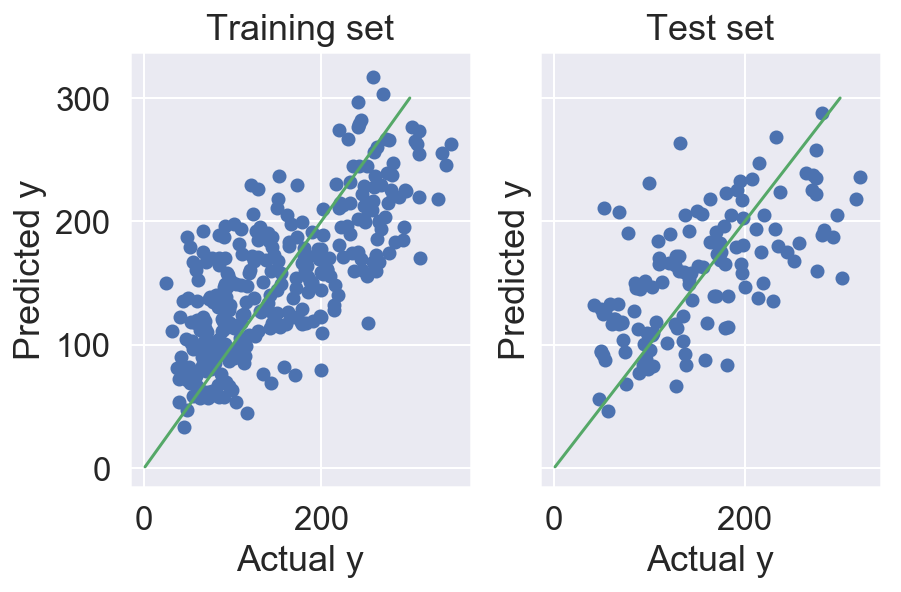

In [354]:


#Set up the model
model = linear_model.Lasso() #plain Lasso with default settings
model.fit(X_train,y_train)
# Perform 5-fold cross validation
from sklearn import metrics
scores = cross_val_score(model, X_train, y_train, cv=5)
avg = np.std(scores)/np.sqrt(scores.shape[0])
print(
    f'Average score and standard error: {np.round(np.mean(scores),2)} +/- {np.round((avg),2)} std error,\nStandard Deviation:  {np.round(np.std(scores),3)}')
print("Cross-validated scores:", scores)
print(scores.mean())
y_pred_train = cross_val_predict(model, X_train, y_train)
y_pred_test = model.predict(X_test)
print(f'Test set score: {metrics.r2_score(y_test, y_pred_test)}')

#plot results
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.point_1 = [1,300]
ax1.plot(ax1.point_1,ax1.point_1, 'g')
ax1.scatter(y_train, y_pred_train)
ax1.set_title('Training set')
ax1.set_xlabel('Actual y')
ax1.set_ylabel('Predicted y')
ax2.point_1 = [1,300]
ax2.plot(ax2.point_1,ax2.point_1, 'g')
ax2.scatter(y_test, y_pred_test)
ax2.set_title('Test set')
ax2.set_xlabel('Actual y')
ax2.set_ylabel('Predicted y')

plt.show()

Lasso out of the box does not perform very well. R2 scores are low an very variable

### Model tuning - SKLearn Grid searching generic process - Regression 
Use grid search to find the optimal parameters

In [355]:
from sklearn.model_selection import GridSearchCV
model = linear_model.Lasso()

alpha = np.logspace(-3, 3, 10)

param_grid = dict(alpha=alpha)

grid = GridSearchCV(model, param_grid, cv=5, scoring='r2', verbose=1)
grid.fit(X_train, y_train)

# check the results of the grid search
print(grid.best_params_)
print(grid.best_score_)

best_model = grid.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'alpha': 0.46415888336127775}
0.5209062131560509


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


This actually only indicates the best model; **Generalizability** still needs to be assessed throug CV of the best model: Nested CV

Cross-validated scores: [0.46833576 0.44251019 0.54649932 0.57105346 0.57703768]
Average score and standard error: 0.52 +/- 0.02 std error,
Standard Deviation:  0.055
Test set score: 0.38781851658737576


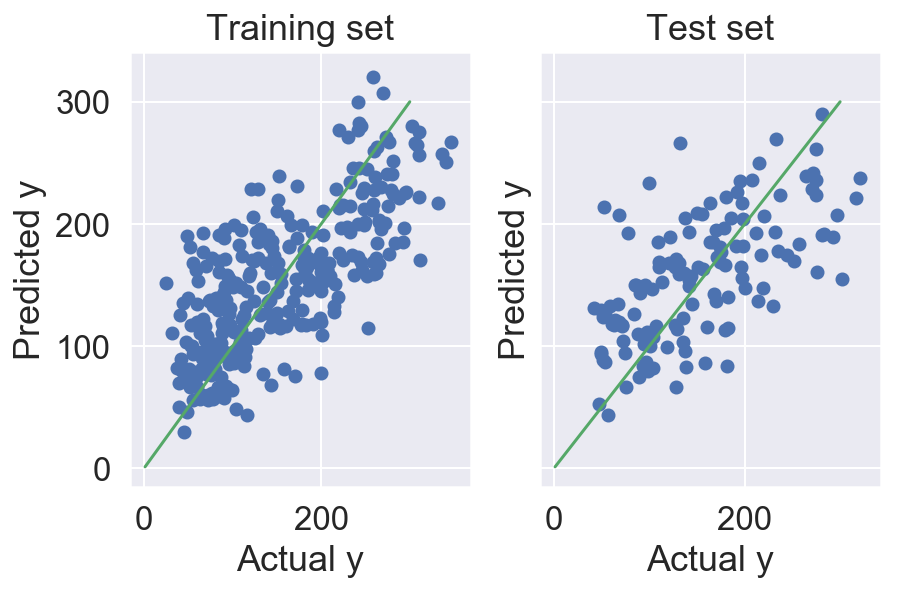

In [356]:
# Set up the CV with the grid.best_estimator_
model = best_model
model.fit(X_train, y_train)
# Perform 5-fold cross validation
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated scores:", scores)
avg = np.std(scores)/np.sqrt(scores.shape[0])
print(
    f'Average score and standard error: {np.round(np.mean(scores),2)} +/- {np.round((avg),2)} std error,\nStandard Deviation:  {np.round(np.std(scores),3)}')

y_pred_train = cross_val_predict(model, X_train, y_train)
y_pred_test = model.predict(X_test)
print(f'Test set score: {metrics.r2_score(y_test, y_pred_test)}')

# plot results
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.point_1 = [1, 300]
ax1.plot(ax1.point_1, ax1.point_1, 'g')
ax1.scatter(y_train, y_pred_train)
ax1.set_title('Training set')
ax1.set_xlabel('Actual y')
ax1.set_ylabel('Predicted y')
ax2.point_1 = [1, 300]
ax2.plot(ax2.point_1, ax2.point_1, 'g')
ax2.scatter(y_test, y_pred_test)
ax2.set_title('Test set')
ax2.set_xlabel('Actual y')
ax2.set_ylabel('Predicted y')

plt.show()

Putting it in a single loop

In [357]:
from sklearn.model_selection import GridSearchCV,KFold,cross_val_predict,cross_val_score,StratifiedKFold


# Following kf is the outer loop
outer_kf = KFold(n_splits=8,shuffle=True,random_state=1)
inner_kf = KFold(n_splits=3,shuffle=True,random_state=2)

model = linear_model.Lasso()

alpha = np.logspace(-3, 3, 10)

param_grid = dict(alpha=alpha)


grid = GridSearchCV(model, param_grid ,cv=inner_kf, scoring='r2')
grid.fit(X_train, y_train)
print(f'Non nested best score: {grid.best_score_}')

nested_score = cross_val_score(grid,X_train, y_train ,cv=outer_kf)
print(f'Nested scores: {nested_score}')
print(f'Nested score mean: {nested_score.mean()}')
y_pred_test = grid.predict(X_test)
print(f'Test set score: {metrics.r2_score(y_test, y_pred_test)}')

#Demo to show that gridsearch automatically selects the best model (based on scoring)
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)
y_pred_test_ = best_model.predict(X_test)
print(f'Test set score: {metrics.r2_score(y_test, y_pred_test_)}')

Non nested best score: 0.5230366993857274
Nested scores: [0.52019135 0.5142687  0.48850847 0.52218328 0.57337252 0.66584631
 0.46571133 0.26222676]
Nested score mean: 0.5015385878125656
Test set score: 0.3874464741751157
Test set score: 0.3874464741751157


The best non nested score actually validates with the mean nested cross validation of the best result. The individual fold score remain hit and miss; i.e. generalizability could be disappointing

In [358]:
cols = df.drop(['ycol'], axis = 1).columns
df_ = pd.DataFrame(np.reshape(np.round(best_model.coef_,4),(1,-1)), columns=cols)
df_['intercept']= best_model.intercept_
df_


age   sex    bmi     bp    s1    s2     s3   s4     s5   s6  intercept
0 -0.0 -5.59  27.59  10.15 -0.02 -3.57 -11.84  0.0  25.43  0.0     152.12

In [359]:
#feature importance
model_coefs = pd.DataFrame(
    {"variable": X.columns, 'coef': best_model.coef_, 'abs_coef': np.abs(best_model.coef_)})
model_coefs.sort_values('abs_coef', inplace = True, ascending=False)
model_coefs.head(20)

abs_coef   coef variable
2     27.59  27.59      bmi
8     25.43  25.43       s5
6     11.84 -11.84       s3
3     10.15  10.15       bp
1      5.59  -5.59      sex
5      3.57  -3.57       s2
4      0.02  -0.02       s1
0      0.00  -0.00      age
7      0.00   0.00       s4
9      0.00   0.00       s6

In [360]:
print('Percent variables zeroed out:', np.sum(((np.abs(best_model.coef_) == 0))/float(X.shape[1])*100))

Percent variables zeroed out: 30.0


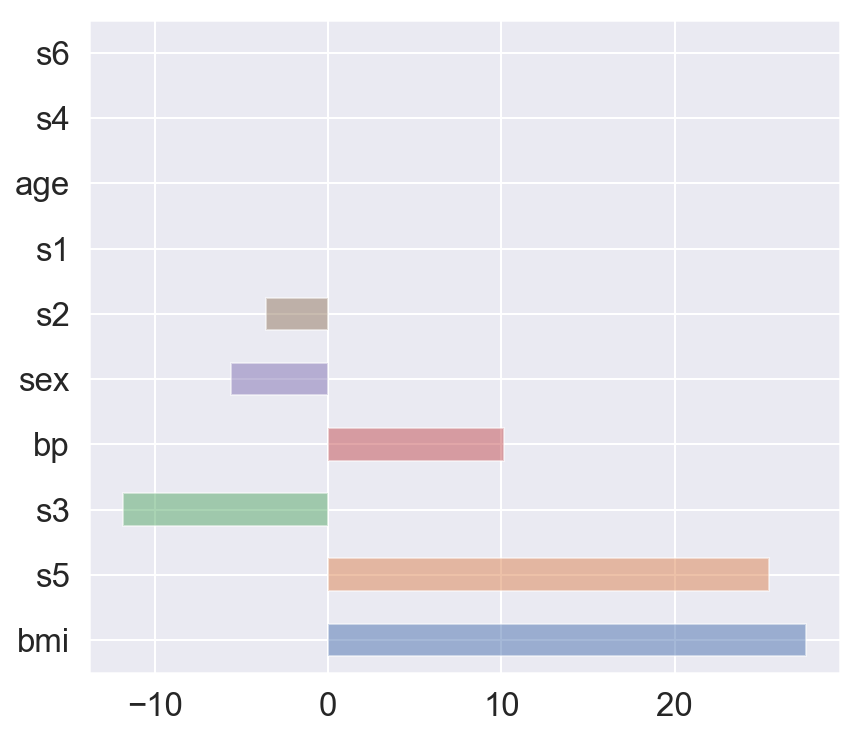

In [361]:
fig, ax = plt.subplots(figsize = (6,6))
model_coefs.coef[:30].plot(kind='barh',ax=ax,alpha=0.5)
ax.set_yticklabels(model_coefs.variable[:30].values)
plt.show()

'S4', 'S2', 'age'  can be eliminated

### Fitting the final model

In [362]:
# redefine X discarding unneeded features
X = X[['sex', 'bmi', 'bp', 's1',  's3', 's5', 's6']]
print(X.shape)
print(y.shape)
#Scale X 
ss.fit_transform(X)

#model is rained on the entire dataset
final_model = grid.best_estimator_.fit(X,y)
y_pred_final = final_model.predict(X)
print(f'r2_score of final model with complete dataset: {metrics.r2_score(y, y_pred_final)}')

(442, 7)
(442,)
r2_score of final model with complete dataset: 0.5083722229371679


In [363]:
final_model

Lasso(alpha=2.154434690031882, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

### Save the model

In [364]:
import pickle
s = pickle.dumps(final_model)
model = pickle.loads(s)
model.predict(X[0:1])

array([202.67804648])

In [365]:
model

Lasso(alpha=2.154434690031882, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

### Model scoring

In [366]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['r2', 'neg_mean_squared_error']

scores = cross_validate(model, X_train, y_train, scoring=scoring,
                        cv=5, return_train_score=False)
sorted(scores.keys())
df_scores = pd.DataFrame(scores)
df_scores.iloc[:,2:] #skip first 2 columns

test_neg_mean_squared_error  test_r2
0                     -3039.94     0.49
1                     -3695.42     0.43
2                     -2676.76     0.53
3                     -2667.54     0.58
4                     -2944.22     0.57

### SKlearn generic process - Binary Classifier

In [21]:
df, X, y, X_train, y_train, X_test, y_test = binclass()

Breast Cancer Dataset Data has been created for Binary ML
Shape df (569, 31)
Shape X (569, 30)
Shape y (569,)
Shape X_train (398, 30)
Shape y_train (398,)
Shape X_test (171, 30)
Shape y_test (171,)
Mean X 7.617208557562213e-17, should be close to 0
Std X 0.9999999999999999, should be close to 1
Available columns ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension' 'ycol']


#### Create a baseline

What score would flipping a coin yield? This is the score a model would need to beat. Important input to a business case of implementing a model **or not**

In [399]:
from sklearn.linear_model import LogisticRegression
#establish baseline with runnin the model with default settings
clf = LogisticRegression()
#clf = SVC(probability = True) 
clf.fit(X_train,y_train)
clf.score(X_train, y_train)
print(f'Accuracy score on test/hold-out set: {clf.score(X_test, y_test)}')

Accuracy score on test/hold-out set: 0.9766081871345029


In [400]:

#Create Dummy Regression Always Predicts The Mean Value Of Target
from sklearn.dummy import DummyClassifier

# Create dummy classifer
dummy = DummyClassifier(strategy='uniform', random_state=1)

# "Train" model
dummy.fit(X_train, y_train)

# Get accuracy score
print(f'Accuracy score on test/hold-out set: {dummy.score(X_test, y_test)}')

Accuracy score on test/hold-out set: 0.52046783625731


In [401]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
predictions = clf.predict(X_train)
confusion = confusion_matrix(y_train,predictions)#,labels=[1,0])
pd.DataFrame(confusion, 
             columns=['predicted_0','predicted_1'], 
             index=['true_0','true_1'])


predicted_0  predicted_1
true_0          145            4
true_1            0          249

- **Accuracy**  What proportion of predictions the model was right
- **Recall**  What proportion of actual positives was identified correctly?
- **Preciseness**  What proportion of positive identifications was actually correct?

Rates as computed from the confusion matrix  
**Accuracy**: Overall, how often is the classifier correct?  
	•	(TP+TN)/total  
**Misclassification Rate**: Overall, how often is it wrong? 
equivalent to 1 minus Accuracy also known as "Error Rate"  
	•	(FP+FN)/total    
**Recall** or **Sensisitity** : When it's actually yes, how often does it predict 1?  
	•	TP/actual yes  also known as "True Positive Rate"  
**False Positive Rate:** When it's actually 0, how often does it predict 1?  
	•	FP/actual no   
**Specificity:** When it's actually 0, how often does it predict 0? also know as "True Negative Rate".  
	•	TN/actual no  equivalent to 1 minus False Positive Rate  
**Precision:** When it predicts 1, how often is it correct?  
	•	TP/predicted yes   
**Prevalence:** How often does the yes condition actually occur in our sample?  
	•	actual yes/total   

In [402]:
pd.crosstab(y_train, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted    0    1  All
True                    
0          145    4  149
1            0  249  249
All        145  253  398

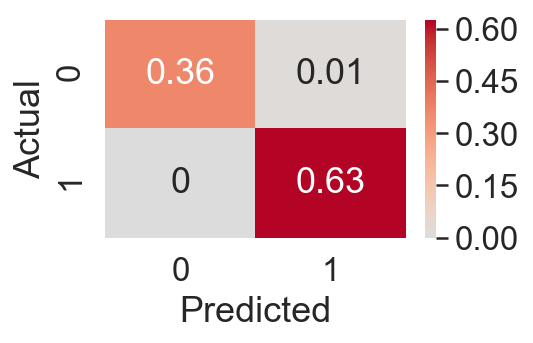

In [403]:
heat = pd.crosstab(y_train, predictions, rownames=['Actual'], colnames=['Predicted'], normalize=True)
fig, ax  = plt.subplots(figsize = (3,2))
sns.heatmap(heat, cmap='coolwarm', center=0, annot=True);
plt.show()

In [404]:
tn, fp, fn, tp = confusion.ravel()
(tn, fp, fn, tp)

(145, 4, 0, 249)

In [405]:
from sklearn.metrics import classification_report
print(classification_report(y_train, predictions, labels=None, target_names=None, sample_weight=None, digits=2))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99       149
          1       0.98      1.00      0.99       249

avg / total       0.99      0.99      0.99       398



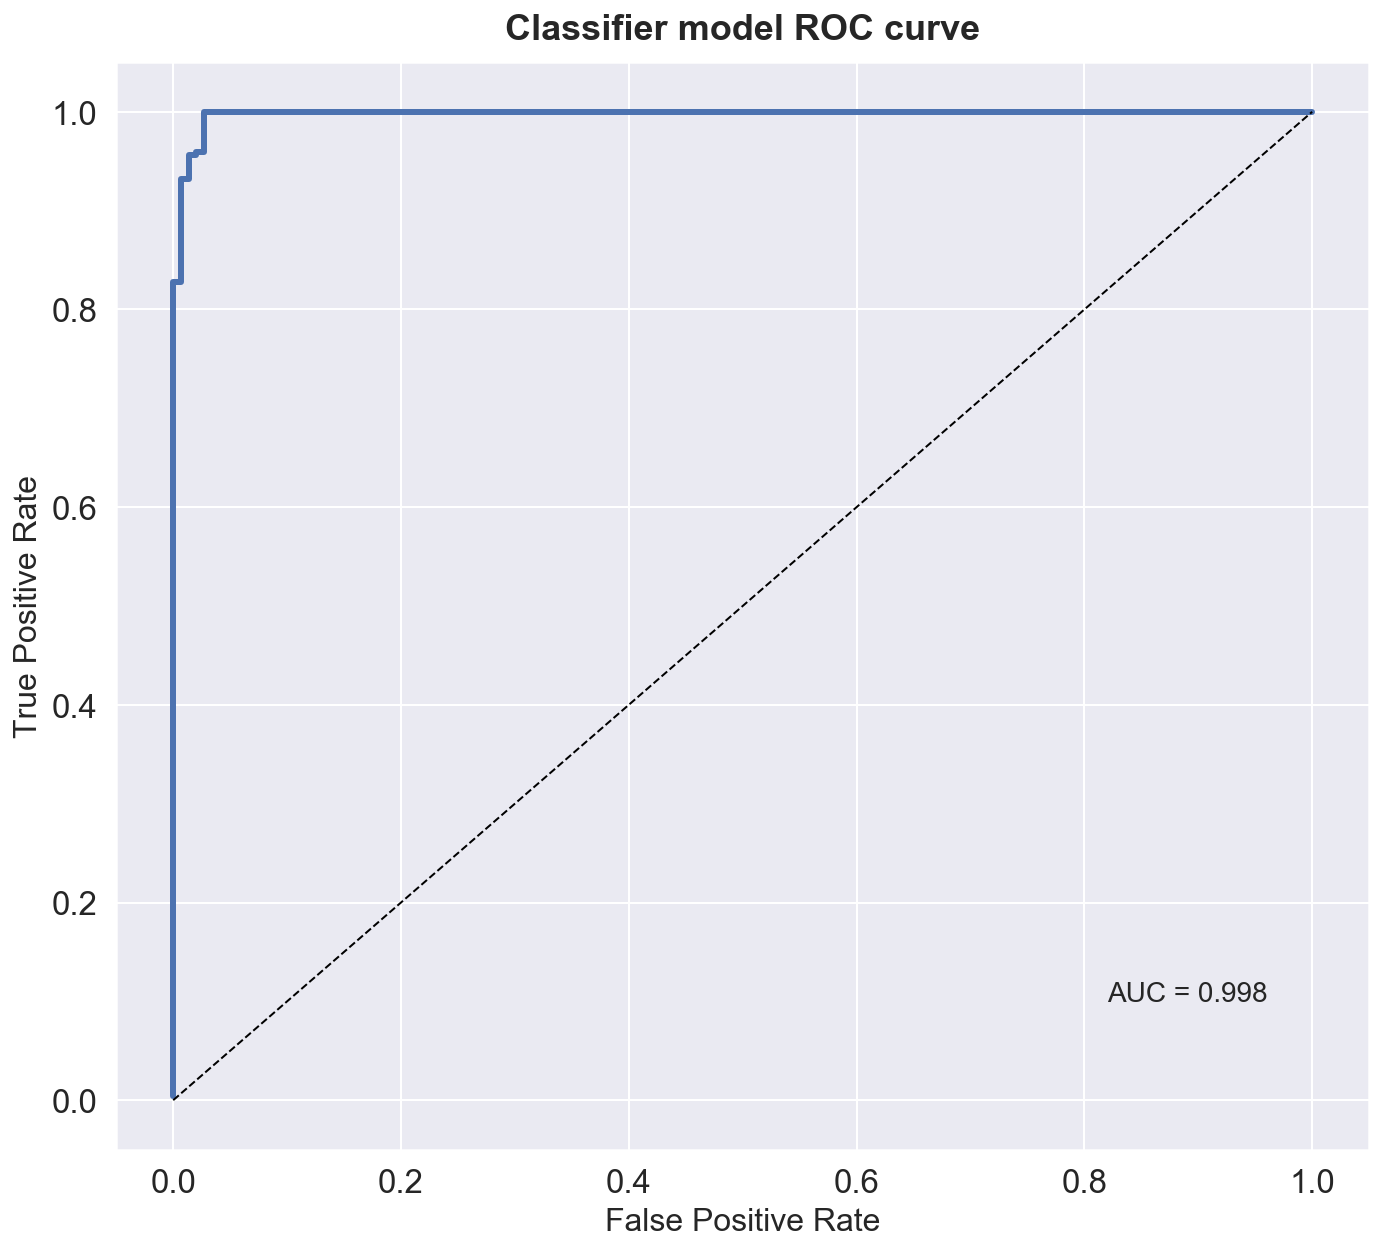

In [406]:
from sklearn.metrics import roc_auc_score, roc_curve
probabilities = pd.DataFrame(clf.predict_proba(X_train), 
                             columns=['predict0', 'predict1'])
fpr, tpr, thresholds = roc_curve(y_train,probabilities.predict1)
auc_score = roc_auc_score(y_train, probabilities.predict1)
plt.figure(figsize=[10,10])
plt.plot(fpr,tpr,linewidth=3)
plt.plot([0,1],[0,1], c='black', lw=1, ls='dashed')
plt.title('Classifier model ROC curve', y=1.01, fontsize=18, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate(s='AUC = '+str(auc_score.round(3)), xy=(0.82,0.1), fontsize=14)
plt.show()

Accuracy is measured by the area under the ROC curve. An area of 1 represents a perfect test; an area of .5 represents a worthless test. A rough guide for classifying the accuracy of a diagnostic test is the traditional academic point system:

.90-1 = excellent (A)  
.80-.90 = good (B)  
.70-.80 = fair (C)  
.60-.70 = poor (D)  
.50-.60 = fail (F)  

http://gim.unmc.edu/dxtests/roc3.htm

Looking at probabilities for individual observations

In [438]:
#showing the true, predicted and 'certainty' of the model in a df
from sklearn.linear_model import LogisticRegression
pd.set_option("display.precision", 2) #just the display!
clf = LogisticRegression()
#clf = SVC(probability = True)
clf.fit(X, y)
probabilities = clf.predict_proba(X)
df['prediction'] = clf.predict(X)
df['probability 0'] = np.round(probabilities[:,0], 3)
df['probability 1'] = np.round(probabilities[:,1], 3)
df[['ycol', 'prediction','probability 0', 'probability 1']].sample(10)
#probabilities
#y_scores = clf.predict_proba(X_test)[:, 1]
# for classifiers  with decision_function(SVC and SDG), this achieves similar results
# probabilities = clf.decision_function(X_test)


ycol  prediction  probability 0  probability 1
231     1           1       0.00e+00           1.00
39      0           0       9.01e-01           0.10
108     0           0       1.00e+00           0.00
315     1           1       0.00e+00           1.00
66      1           1       1.00e-03           1.00
410     1           1       4.10e-02           0.96
123     1           1       2.40e-02           0.98
417     0           0       1.00e+00           0.00
528     1           1       1.70e-02           0.98
510     1           1       0.00e+00           1.00

In [450]:
#'probalities for SVC 
#More explanation forthcoming; as I am not comfortable that I understand it all
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
clf = SVC(probability=True, gamma='auto')
clf.fit(X, y)
df['DistToHypP'] = clf.decision_function(X)
df['prediction'] = clf.predict(X)
df[['ycol', 'prediction','DistToHypP']].sample(10)

ycol  prediction  DistToHypP
492     0           0       -2.16
247     1           1        1.00
92      1           1        1.23
347     1           1        1.00
318     1           1        1.09
221     1           1        1.81
24      0           0       -2.66
499     0           0       -2.63
354     1           1        2.01
335     0           0       -2.50

#### Cross validation of a simple model - Binary Classification

In [421]:
# Cross validated scores
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score

clf = LogisticRegression()

scores = cross_val_score(clf, X_train, y_train, cv=5)
print(f'Accuracy per fold: {scores}')
avg = np.std(scores)/np.sqrt(scores.shape[0])
print(
    f'Average score and standard error: {np.round(np.mean(scores),2)} +/- {np.round((avg),2)} std error,\nStandard Deviation:  {np.round(np.std(scores),3)}')
print(f'Model parameters: {clf}')
y_pred_train = cross_val_predict(clf, X_train, y_train)
clf.fit(X_test, y_test)
y_pred_test = clf.predict(X_test)
print(f'Test set score: {accuracy_score(y_test, y_pred_test)}')

Accuracy per fold: [1.     0.9625 0.9625 1.     1.    ]
Average score and standard error: 0.98 +/- 0.01 std error,
Standard Deviation:  0.018
Model parameters: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Test set score: 1.0


#### Gridsearch of a simple model - Binary Classification

In [32]:
# Set up the parameters. 
# Use a list with 'l1' and 'l2' for the penalties,
# Use a list with 'liblinear' for the solver,
# Use a logspace from -3 to 0, with 50 different values

# fill the dictionary of parameters
params = {'penalty':['l1','l2'],
             'solver':['liblinear'],
             'C': np.logspace(-3,3,50),
             'class_weight' : ['balanced','']
            }

#create your gridsearch object
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

gridsearch = GridSearchCV(clf, 
                             params, 
                             n_jobs=-1, cv=5, verbose=1)
#fit your gridsearch object on your training data
gridsearch.fit(X_train, y_train)
# find the best mean cross-validated score that your gridsearch found:
# (this should be better than the mean cross-validated score for your default logistic regression above)
# lr_gridsearch.best_score_
print(f'Best mean cross-validated score{gridsearch.best_score_}')
# find the best hyperparameters that your gridsearch found:
print(f'Parameters of best model  {gridsearch.best_params_}')
# assign the best estimator to a variable:
best_clf = gridsearch.best_estimator_
# score your best estimator on the testing data:
print(f'Accuracy score of best model: {best_clf.score(X, y)}')

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.3s


Best mean cross-validated score0.9874371859296482
Parameters of best model  {'C': 0.49417133613238334, 'class_weight': '', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score of best model: 0.9859402460456942


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.1s finished


In [35]:
# Set up the CV with the grid.best_estimator_
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
clf = best_clf
clf.fit(X_train, y_train)
# Perform 5-fold cross validation
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross-validated fold scores:", scores)
avg = np.std(scores)/np.sqrt(scores.shape[0])
print(
    f'Average score and standard error: {np.round(np.mean(scores),2)} +/- {np.round((avg),2)} std error,\nStandard Deviation:  {np.round(np.std(scores),3)}')

y_pred_train = cross_val_predict(clf, X_train, y_train)
y_pred_test = clf.predict(X_test)
print(f'Test set score: {accuracy_score(y_test, y_pred_test)}')

Cross-validated fold scores: [1.     0.9625 0.975  1.     1.    ]
Average score and standard error: 0.99 +/- 0.01 std error,
Standard Deviation:  0.016
Test set score: 0.9824561403508771


In [36]:
#feature importance for Logistic regression, svc with linear kernel some others!
clf_coefs = pd.DataFrame(
    {"variable": X.columns, 'coef': best_clf.coef_[0], 'abs_coef': np.abs(best_clf.coef_[0])})
clf_coefs.sort_values('abs_coef', inplace = True, ascending=False)
clf_coefs.head(10)
# took me 3 hours to figure out the [0] in coef_[0]

abs_coef      coef              variable
10  1.030766 -1.030766          radius error
27  0.853707 -0.853707  worst concave points
12  0.766000 -0.766000       perimeter error
21  0.744753 -0.744753         worst texture
13  0.725836 -0.725836            area error
20  0.713864 -0.713864          worst radius
23  0.685356 -0.685356            worst area
26  0.673243 -0.673243       worst concavity
15  0.644211  0.644211     compactness error
22  0.640548 -0.640548       worst perimeter

In [37]:
print('Percent variables (nearly) zero:', np.sum(((np.abs(best_clf.coef_[0]) <= 0.1))/float(X.shape[1])*100))

Percent variables (nearly) zero: 10.0


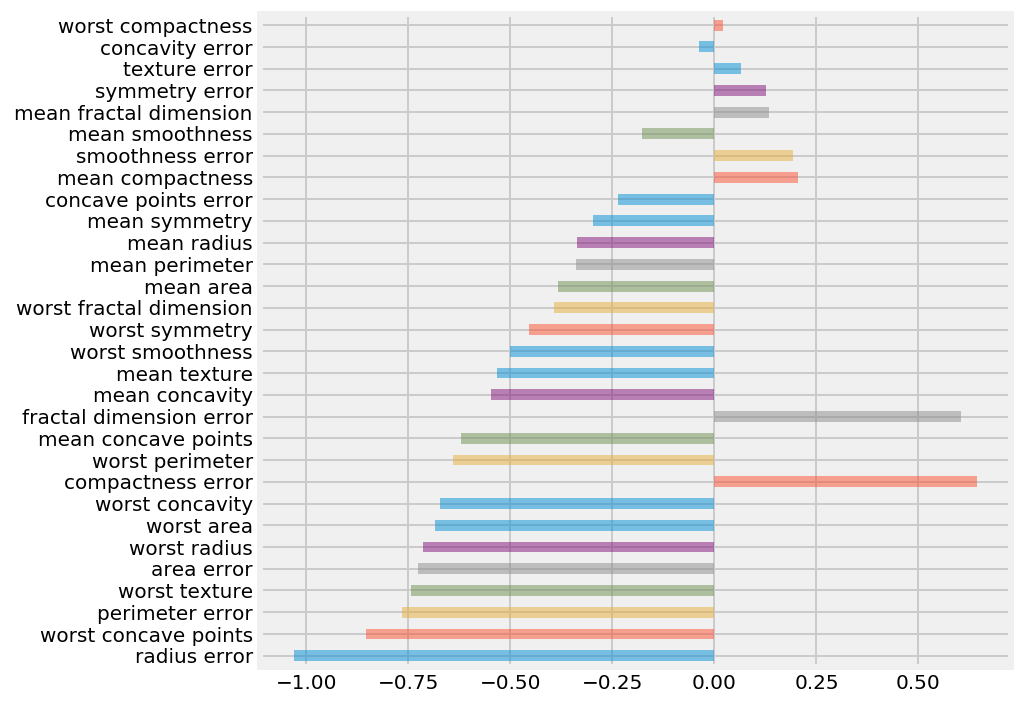

In [38]:
fig, ax = plt.subplots(figsize = (6,6))
clf_coefs.coef[:30].plot(kind='barh',ax=ax,alpha=0.5)
ax.set_yticklabels(clf_coefs.variable[:30].values)
plt.show()

https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html

In [39]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.svm import SVC

# ... load data

svc = SVC().fit(X_train, y_train)
perm = PermutationImportance(clf).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=list(X.columns))

**ISSUE**

If the lightGBM version you have was built with gcc-7, when you try to load it now you might get:

OSError: dlopen(/usr/local/lib/python3.6/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/gcc/lib/gcc/7/libgomp.1.dylib
  Referenced from: /usr/local/lib/python3.6/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found  

**SOLUTION**

I came around this error by installing it from source doing:

    pip uninstall lightgbm  
    git clone --recursive https://github.com/Microsoft/LightGBM ; cd LightGBM  
    export CXX=g++-8 CC=gcc-8  
    mkdir build ; cd build  
    cmake ..  
    make -j4  
  
and then:

    pip install --no-binary :all: lightgbm
    
https://github.com/Microsoft/LightGBM/issues/1369

In [30]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.svm import SVC

# ... load data

svc = SVC().fit(X_train, y_train)
perm = PermutationImportance(svc).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=list(X.columns))

### Training the final model

In [45]:
# redefine X discarding unneeded features
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
#X = X.drop(['mean symmetry', 'worst compactness', 'concavity error'], axis=1)
# or positively defining the df: (saver!)
X = X[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']]
print(X.shape)
print(y.shape)
#Scale X 
ss = StandardScaler()
ss.fit_transform(X)

#model is trained on the entire dataset
final_clf = clf.fit(X,y)
y_pred_final = final_clf.predict(X)
print(f'Accuracy score of final model with complete dataset: {accuracy_score(y, y_pred_final)}')

(569, 27)
(569,)
Accuracy score of final model with complete dataset: 0.9876977152899824


### Saving the final model

In [48]:
import pickle
# Save:
s = pickle.dumps(final_clf)
#load:
clf = pickle.loads(s)
#test
clf.predict(X[0:1])

array([0])

### SKlearn generic process - MultiLabel Classifier

Put your seatbelts on: this gets complex/confusing/frustrating quickly. 

- Essentially there a 3 types of classifiers:

    - Logistic regression, with 'linear regression'-like feature importance
    - Trees or forests of trees with their boosters, with actual 'feature importance'
    - Support Vector Classifiers, with a 'decision function'
    
- Multilabel is not easily handled. 
    - The workaround is either by running labels One Versus One (aka $OVO$) or, most often, 'One Versus the Rest' aka $OVR$. 
    - In effect the multilabel problem is translated in multiple (n labels) binary problems. 
    - 'Overall' model evaluation for AUC/ROC needs workarounds too and plotting results becomes complex.
    - Logistic regression has a default multiclass implementation (under the hood it is of course a linear regression of the log-odds, whereas SVC needs to be wrapped in a OneVsRestClassifier and the labels need to be 'label_binarize'-ed

- There is a lot of hyperparameters that may be tuned

- And the Permutation importance may be used for $any$ model or classifier as it calculates and ranks the marginal contribution of each feature to the overall score. These may be in contradiction

In [88]:
df, X, y, X_train, y_train, X_test, y_test = multiclass()

Iris Dataset Data has been created for multiclass ML
Shape df (150, 5)
Shape X (150, 4)
Shape y (150,)
Shape X_train (105, 4)
Shape y_train (105,)
Shape X_test (45, 4)
Shape y_test (45,)
Mean X 3.2566542055671256e-16, should be close to 0
Std X 0.9999999999999999, should be close to 1
Available columns ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)' 'ycol']


In [159]:
#establish baseline with runnin the model with default settings
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
print(f'Training score: {np.round(accuracy_score(y_train, y_pred_train), 3)}')
y_pred_test = clf.predict(X_test)
print(f'Test set score: {accuracy_score(y_test, y_pred_test)}')


print(f'Model parameters: {clf}')


Training score: 0.924
Test set score: 0.8222222222222222
Model parameters: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [245]:
#Show probabilities of each class for each observation
clf.fit(X, y)
probabilities = clf.predict_proba(X) #fitting X to put it in de df easily
df['pred']= clf.predict(X)
df['probability 0'] = probabilities[:,0]
df['probability 1'] = probabilities[:,1]
df['probability 2'] = probabilities[:,2]
df[['ycol', 'pred','probability 0', 'probability 1', 'probability 2']].sample(10)

ycol  pred  probability 0  probability 1  probability 2
126     2     2       0.007171       0.387699       0.605130
101     2     2       0.003895       0.374843       0.621262
130     2     2       0.000422       0.385223       0.614355
25      0     0       0.739550       0.260315       0.000135
47      0     0       0.833914       0.165979       0.000107
46      0     0       0.953287       0.046592       0.000121
21      0     0       0.952351       0.047418       0.000231
41      0     0       0.520719       0.479129       0.000152
79      1     1       0.129976       0.833431       0.036593
60      1     1       0.030302       0.934892       0.034806

#### Baseline -  most common

In [161]:
#Create Dummy Regression Always Predicts The Modus Value Of Target
from sklearn.dummy import DummyClassifier

# Create dummy classifer
dummy = DummyClassifier(strategy='most_frequent', random_state=1)

# "Train" model
dummy.fit(X_train, y_train)

# Get accuracy score
print(f'Accuracy score on test/hold-out set: {dummy.score(X_test, y_test)}')

Accuracy score on test/hold-out set: 0.24444444444444444


In [246]:
#showing probabilities for illustration purposes
dummy.fit(X, y)
probabilities = dummy.predict_proba(X)
df['dumbpred']= dummy.predict(X)
df['dumbproba 0'] = probabilities[:,0]
df['dumbproba 1'] = probabilities[:,1]
df['dumbproba 2'] = probabilities[:,2]
df[['ycol', 'pred','dumbpred', 'dumbproba 0', 'dumbproba 1', 'dumbproba 2']].sample(10)

ycol  pred  dumbpred  dumbproba 0  dumbproba 1  dumbproba 2
16      0     0         0          1.0          0.0          0.0
25      0     0         0          1.0          0.0          0.0
119     2     1         0          1.0          0.0          0.0
98      1     1         0          1.0          0.0          0.0
37      0     0         0          1.0          0.0          0.0
107     2     2         0          1.0          0.0          0.0
77      1     2         0          1.0          0.0          0.0
20      0     0         0          1.0          0.0          0.0
130     2     2         0          1.0          0.0          0.0
110     2     2         0          1.0          0.0          0.0

In [163]:
import pprint

In [164]:
# Cross validated scores
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score

clf = LogisticRegression()

scores = cross_val_score(clf, X_train, y_train, cv=5)
print(f'Accuracy per fold: {scores}')
avg = np.std(scores)/np.sqrt(scores.shape[0])
print(
    f'Average score and standard error of means: {np.round(np.mean(scores),2)} +- {np.round((avg),2)}')
print(f'Model parameters: {clf}')
y_pred_train = cross_val_predict(clf, X_train, y_train)
clf.fit(X_test, y_test)
y_pred_test = clf.predict(X_test)
print(f'Test set score:/n {accuracy_score(y_test, y_pred_test)}')
print(clf)

Accuracy per fold: [0.72727273 0.90909091 0.95238095 0.95238095 0.94736842]
Average score and standard error of means: 0.9 +- 0.04
Model parameters: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Test set score:/n 0.9333333333333333
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [165]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [166]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
predictions = clf.predict(X_train)
confusion = confusion_matrix(y_train,predictions,labels=[0,1,2])
pd.DataFrame(confusion, 
             columns=['predict0','predict1', 'predict2'], 
             index=['actual0', 'actual1', 'actual2'])

predict0  predict1  predict2
actual0        34         0         0
actual1         0        25         7
actual2         0         1        38

In [167]:
pd.crosstab(y_train, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted   0   1   2  All
True                      
0          34   0   0   34
1           0  25   7   32
2           0   1  38   39
All        34  26  45  105

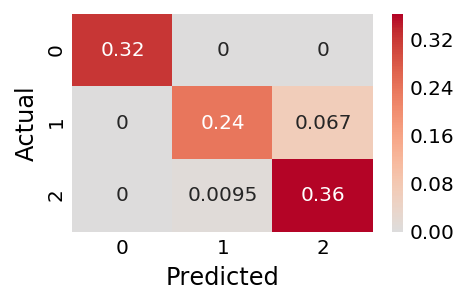

In [82]:
heat = pd.crosstab(y_train, predictions, rownames=['Actual'], colnames=['Predicted'], normalize=True)
fig, ax  = plt.subplots(figsize = (3,2))
sns.heatmap(heat, cmap='coolwarm', center=0, annot=True);
plt.show()

In [83]:
from sklearn.metrics import classification_report
predictions = clf.predict(X_train)
print(classification_report(y_train, predictions, labels=[0,1,2], target_names=['flower1','flower2','flower3'], sample_weight=None, digits=2))

             precision    recall  f1-score   support

    flower1       1.00      1.00      1.00        34
    flower2       0.96      0.78      0.86        32
    flower3       0.84      0.97      0.90        39

avg / total       0.93      0.92      0.92       105



#### ROC/AUC Logistic regression

I.e. using predict_proba

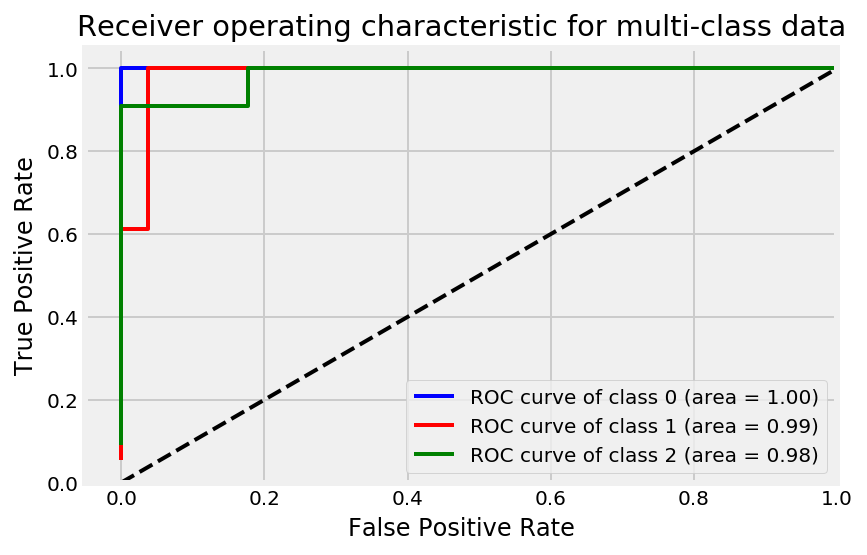

In [247]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp



# Binarize the y
# y_ = label_binarize(y, classes=list(range(y.shape[1])))#classes=[0, 1, 2]) #if you want to adjust for number of classes
# determing number of classes
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                    random_state=0)

y_score = clf.predict_proba(X_test)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#Plot ROC curve, OVR (One Vs the Rest) 
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'lightblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()
#https://stackoverflow.com/questions/51378105/plot-multi-class-roc-curve-for-decisiontreeclassifier

#### ROC/AUC  Support Vector 

i.e. Using decision function 

Automatically created module for IPython interactive environment


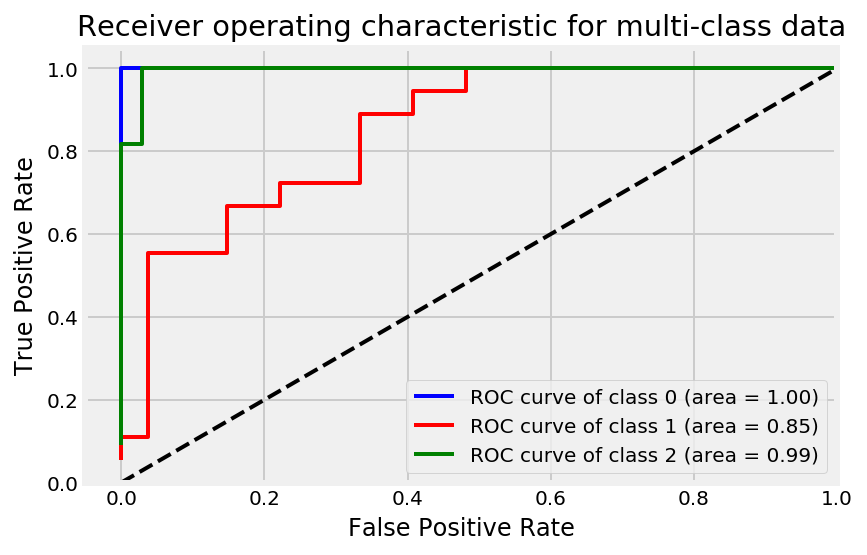

In [188]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp



# Binarize the y
y = label_binarize(y, classes=[0, 1, 2]) 
# determing number of classes
n_classes = y.shape[1]


# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#Plot ROC curve, OVR (One Vs the Rest) 
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'lightblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()
#https://stackoverflow.com/questions/51378105/plot-multi-class-roc-curve-for-decisiontreeclassifier

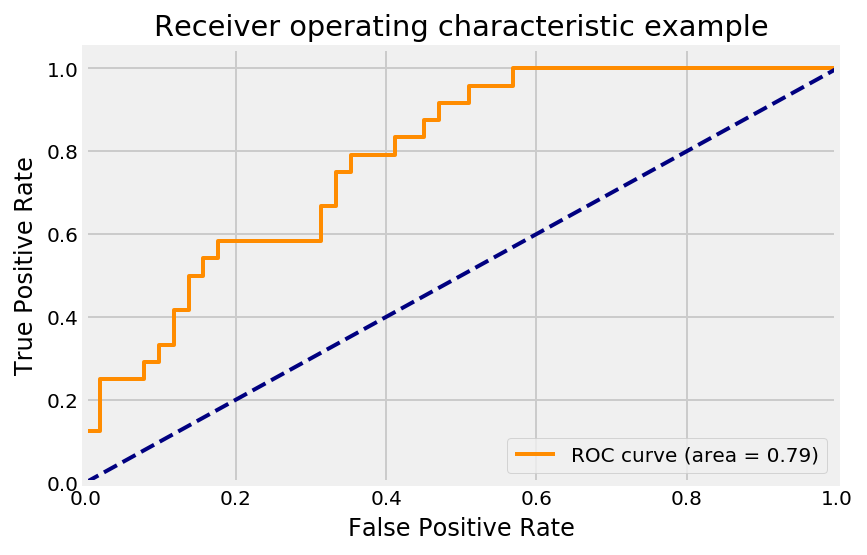

In [102]:
# Printing the single curve 
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### Overall assessment

'Some extension of Receiver operating characteristic to multi-class'

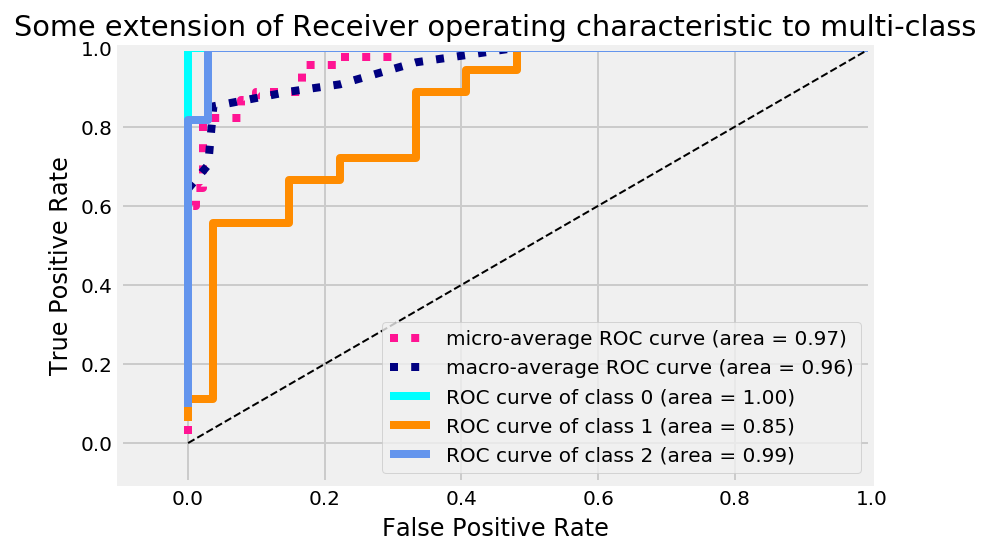

In [190]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
from scipy import interp
from itertools import cycle
# Compute macro-average ROC curve and ROC area

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, #lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([-0.1, 1.0])
plt.ylim([-0.1, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [103]:
df, X, y, X_train, y_train, X_test, y_test = multiclass()

Iris Dataset Data has been created for multiclass ML
Shape df (150, 5)
Shape X (150, 4)
Shape y (150,)
Shape X_train (105, 4)
Shape y_train (105,)
Shape X_test (45, 4)
Shape y_test (45,)
Mean X 3.2566542055671256e-16, should be close to 0
Std X 0.9999999999999999, should be close to 1
Available columns ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)' 'ycol']


In [192]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

clf = svm.SVC()

gamma_range = np.logspace(-5, 2, 10)
C_range = np.logspace(-3, 2, 10)
kernel_range = ['rbf', 'sigmoid']#, 'linear', 'poly']

param_grid = dict(gamma=gamma_range, C=C_range, kernel=kernel_range)

grid = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', verbose=1)
grid.fit(X, y)

# check the results of the grid search
print(grid.best_params_)
print(grid.best_score_)

best_svm = grid.best_estimator_

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'C': 27.825594022071257, 'gamma': 0.01291549665014884, 'kernel': 'sigmoid'}
0.9866666666666667


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    1.1s finished


In [193]:
y_pred = best_svm.predict(X_train)

In [194]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred, labels=None, target_names=None, sample_weight=None, digits=2))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       0.97      0.97      0.97        32
          2       0.97      0.97      0.97        39

avg / total       0.98      0.98      0.98       105



In [195]:
df_confusion = pd.crosstab(y_train, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted   0   1   2  All
Actual                    
0          34   0   0   34
1           0  31   1   32
2           0   1  38   39
All        34  32  39  105

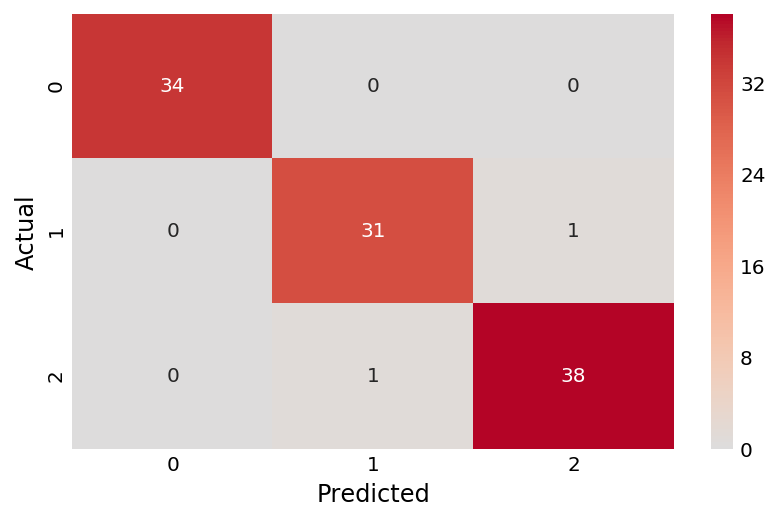

In [111]:
heat = pd.crosstab(y_train, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax  = plt.subplots(figsize = (6,4))
sns.heatmap(heat, cmap='coolwarm', center=0, annot=True);
plt.show()

    C : Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

    solver : {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default: ‘liblinear’ Algorithm to use in the optimization problem.
    For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
    For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
    ‘newton-cg’, ‘lbfgs’ and ‘sag’ only handle L2 penalty, whereas ‘liblinear’ and ‘saga’ handle L1 penalty.

    class_weight : dict or ‘balanced’, default: None
        Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.
    The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).
    Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.


### Nested CV

A gridsearch will find the model that scores best from given a parameter set. The 'best model' may be Cross Validated to assess the generalizability of the 'best model'.  Like all CV score consistancy is what we are looking for. (** note ** i.e. if the parameter set is not good Gridsearch will not find the $best$ model per se) 

In [233]:
from sklearn.model_selection import GridSearchCV,KFold,cross_val_predict,cross_val_score,StratifiedKFold

from sklearn.svm import SVC
from collections import Counter
from sklearn.metrics import classification_report,accuracy_score

iris = datasets.load_iris()
features = iris.data
target = iris.target
# Following kf is the outer loop
outer_kf = StratifiedKFold(n_splits=8,shuffle=True,random_state=1)
inner_kf = StratifiedKFold(n_splits=3,shuffle=True,random_state=2)
model = SVC(gamma='auto')
params = {'kernel':['rbf','linear'],'C':[1,10]}
clf = GridSearchCV(estimator=model,param_grid=params,cv=inner_kf)
clf.fit(features,target)
print(f'Non nested best score: {clf.best_score_}')

nested_score = cross_val_score(clf,features,target,cv=outer_kf)
print(f'Nested scores: {nested_score}')
print(f'Nested score mean: {nested_score.mean()}')

Non nested best score: 0.98
Nested scores: [0.95238095 1.         1.         1.         0.94444444 0.94444444
 1.         1.        ]
Nested score mean: 0.9801587301587302


#### Feature importance

In [12]:
df, X, y, X_train, y_train, X_test, y_test = multiclass()

Iris Dataset Data has been created for multiclass ML
Shape df (150, 5)
Shape X (150, 4)
Shape y (150,)
Shape X_train (105, 4)
Shape y_train (105,)
Shape X_test (45, 4)
Shape y_test (45,)
Mean X 3.2566542055671256e-16, should be close to 0
Std X 0.9999999999999999, should be close to 1
Available columns ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)' 'ycol']


##### logistic regression

In effect a regressor so the coefficients indicate the size of the 'contribution', i.e. importance

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score

clf = LogisticRegression()
clf.fit(X_train, y_train)
clf_coefs = pd.DataFrame(
    {"variable": X.columns, 'coef': clf.coef_[0], 'abs_coef': np.abs(clf.coef_[0])})
clf_coefs.sort_values('abs_coef', inplace = True, ascending=False)
clf_coefs.head(10)
# took me 3 hours to figure out the [0] in coef_[0]

abs_coef      coef           variable
2  1.569213 -1.569213  petal length (cm)
3  1.415567 -1.415567   petal width (cm)
1  1.258071  1.258071   sepal width (cm)
0  0.741053 -0.741053  sepal length (cm)

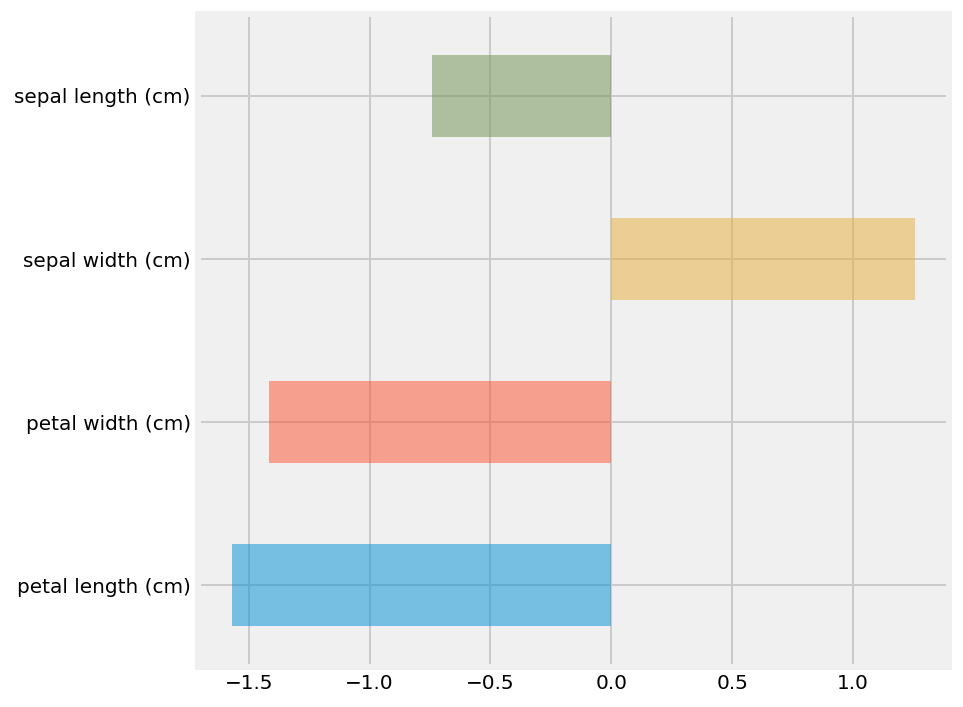

In [17]:
fig, ax = plt.subplots(figsize = (6,6))
clf_coefs.coef.plot(kind='barh',ax=ax,alpha=0.5)
ax.set_yticklabels(clf_coefs['variable'])
plt.show()

In [111]:
import eli5
from sklearn.linear_model import LogisticRegression
from eli5.sklearn import PermutationImportance

clf = LogisticRegression()
# ... load data

clf = clf.fit(X_train, y_train)
perm = PermutationImportance(clf).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=list(X.columns))

##### SVC

Support Vector Machine do not have feature importance with the exception of the linear kernal instanciated (see below, then it acts as a regressor), so teh only permutation importance is possible.

In [114]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.svm import SVC

# ... load data

svc = SVC().fit(X_train, y_train)
perm = PermutationImportance(svc).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=list(X.columns))

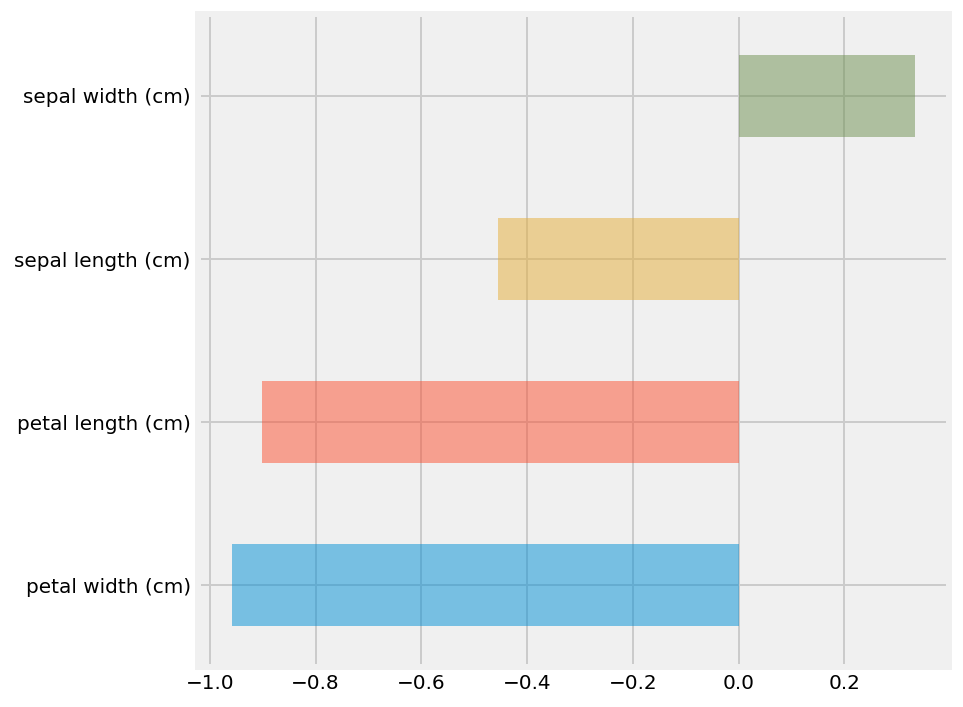

abs_coef      coef           variable
3  0.958361 -0.958361   petal width (cm)
2  0.901966 -0.901966  petal length (cm)
0  0.454267 -0.454267  sepal length (cm)
1  0.334034  0.334034   sepal width (cm)

In [18]:
from matplotlib import pyplot as plt
from sklearn import svm

svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)

svm_coefs = pd.DataFrame(
    {"variable": X.columns, 'coef': svm.coef_[0], 'abs_coef': np.abs(svm.coef_[0])})
svm_coefs.sort_values('abs_coef', inplace = True, ascending=False)
svm_coefs.head(10)

fig, ax = plt.subplots(figsize = (6,6))
svm_coefs.coef.plot(kind='barh',ax=ax,alpha=0.5)
ax.set_yticklabels(svm_coefs['variable'])
plt.show()
svm_coefs

##### Decision Trees/Forests

Come with feature importance. Feature importance always adds to 1

Automatically created module for IPython interactive environment
Feature ranking:
feature: sepal length (cm) importance :0.4702017685702495
feature: sepal width (cm) importance :0.3894054771466939
feature: petal length (cm) importance :0.11040469634857246
feature: petal width (cm) importance :0.029988057934484315
Sum of all feature importances : 1.0000000000000002


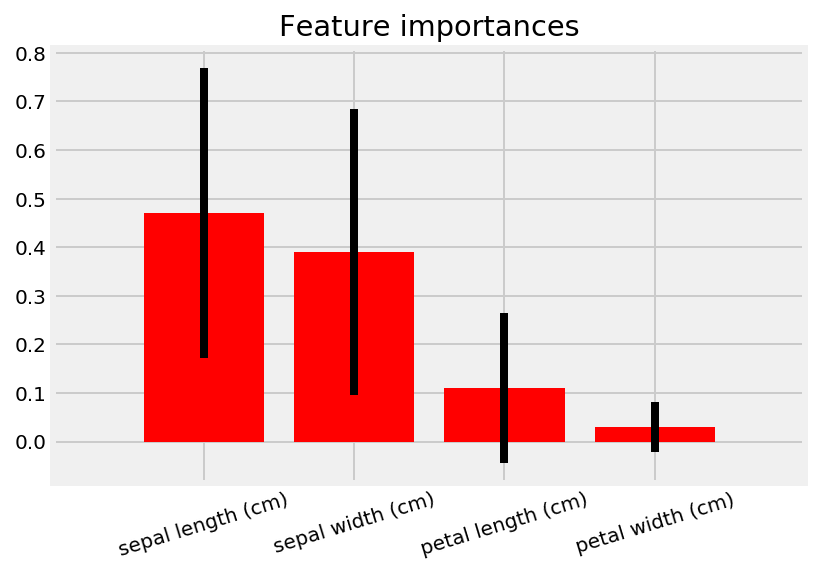

In [19]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier


# Build a forest and compute the feature importances
clf = RandomForestClassifier(n_estimators=250,
                              random_state=0)
clf.fit(X_train, y_train)
importances = clf.feature_importances_
std = np.std([clf.feature_importances_ for clf in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
feature_names = df.columns
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print (f'feature: {feature_names[f]} importance :{importances[indices[f]]}')
print(f'Sum of all feature importances : {importances.sum()}')
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center", )
feature_names = df.columns 
plt.xticks(range(X.shape[1]), feature_names, rotation=17)
plt.xlim([-1, X.shape[1]])
plt.show()

##### Boosters

The gradient boosters come with an OOB (Out Of the Box) feature importance plot

[0]	validation_0-merror:0.022222
Will train until validation_0-merror hasn't improved in 5 rounds.
[1]	validation_0-merror:0.022222
[2]	validation_0-merror:0.022222
[3]	validation_0-merror:0.022222
[4]	validation_0-merror:0.022222
[5]	validation_0-merror:0.022222
Stopping. Best iteration:
[0]	validation_0-merror:0.022222



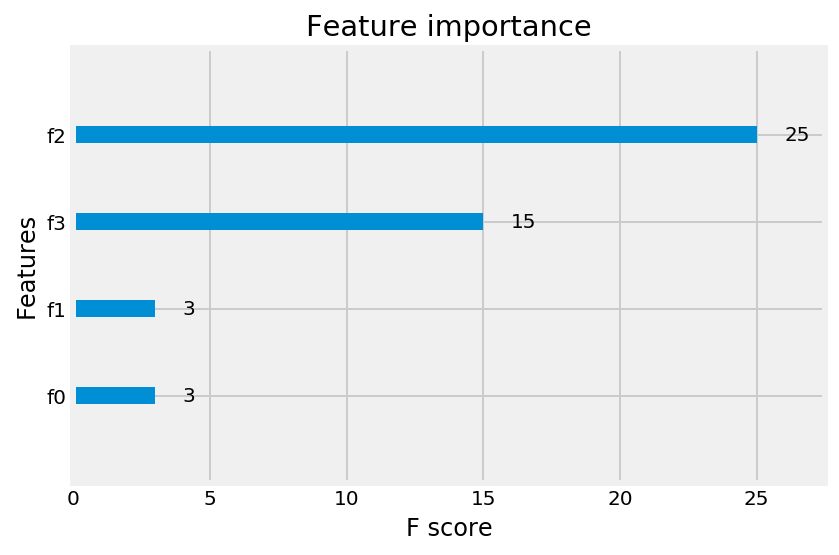

In [20]:
from xgboost import plot_importance, to_graphviz, plot_tree, XGBClassifier
clf = XGBClassifier(n_estimators=1000,learning_rate=0.5)

clf.fit(X_train,y_train,early_stopping_rounds=5,eval_set=[(X_test,y_test)])
plot_importance(clf)
plt.show()


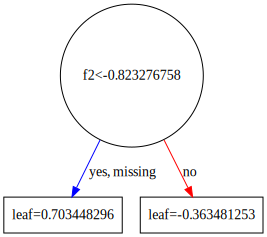

In [21]:
#Lots of nifty features: https://xgboost.readthedocs.io/en/latest/python/python_api.html
to_graphviz(clf)

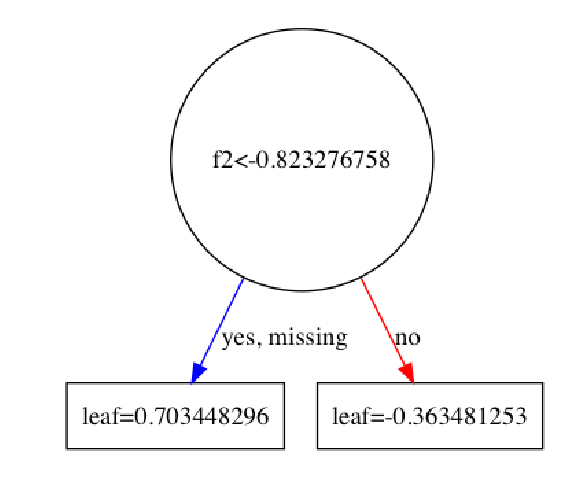

In [154]:
plot_tree(clf);

##### Permutation feature importance

A score is calculated and subsequently each feature is transformed into noise and a new score is calculated. The differnece bewteen the 2 scores is a measure of 'information lost'. The more information is lost, the higher the importance. I.e. when the difference is low it matter ery little whether the feature holds the true value or any random value 

In [22]:
#Author: Edo van Uitert Last updated: 22-8-2018
X=X
y=y
model=RandomForestClassifier(n_estimators=250,
                              random_state=0)
metric="accuracy" 
#                   Currently implemented: accuracy, precision, recall, auc 
n_repeat= 10#How often you want to repeat the permutation. Higher values give 
#                     more robust result, but slow down the function (optional; defaults to 5) 
    
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import roc_auc_score 

model.fit(X,y)

list_metric=["accuracy","precision","recall","auc"] 
if metric not in list_metric: 
    print("PermutationFeatureImportance >> metric %s currently not implemented. Defaulting to metric=accuracy" %(metric)) 
    metric="accuracy" 
    
y_pred = model.predict(X) 
    
if(metric=="accuracy"): 
    fid_res = accuracy_score(y, y_pred) 
if(metric=="precision"): 
    fid_res = precision_score(y, y_pred)         
if(metric=="recall"): 
    fid_res = recall_score(y, y_pred)         
if(metric=="auc"): 
    y_proba= model.predict_proba(X)   
    fid_res = roc_auc_score(y, y_proba[:,1])             
        
print("Fiducial score:", fid_res) 
    
list_col=X.columns.tolist() 
LossInScore=[0]*len(list_col)     
    
for i in range(len(list_col)): 
    X_tmp=X.copy() 
        
    new_res=0 
    for j in range(n_repeat): 
        X_tmp[list_col[i]]=np.random.permutation(X_tmp[list_col[i]]) 
            
        y_pred = model.predict(X_tmp) 
        
        if(metric=="accuracy"): 
            new_res += accuracy_score(y, y_pred) 
        if(metric=="precision"): 
            new_res += precision_score(y, y_pred)         
        if(metric=="recall"): 
            new_res += recall_score(y, y_pred)         
        if(metric=="auc"): 
            y_proba= model.predict_proba(X_tmp)   
            new_res += roc_auc_score(y, y_proba[:,1])         
                
    new_res=new_res/n_repeat 
        
    LossInScore[i]=fid_res-new_res 
            
feat= [('col_name', list_col),('LossInScore', LossInScore)] 

df_LossInScore=pd.DataFrame.from_items(feat) 

#     return df_LossInScore 
df_LossInScore.sort_values(by='LossInScore')

Fiducial score: 1.0


col_name  LossInScore
0  sepal length (cm)     0.009333
1   sepal width (cm)     0.012667
3   petal width (cm)     0.171333
2  petal length (cm)     0.293333

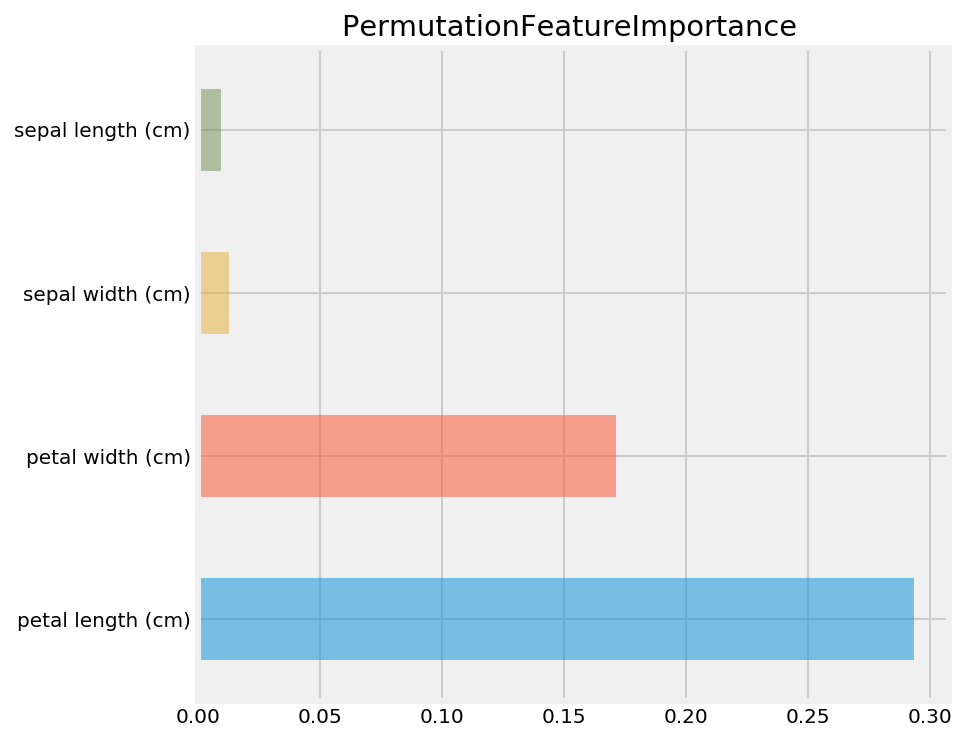

In [23]:
fig, ax = plt.subplots(figsize = (6,6))
df_LossInScore.sort_values(by='LossInScore', ascending=False).LossInScore.plot(kind='barh',ax=ax,alpha=0.5)
ax.set_yticklabels(df_LossInScore.sort_values(by='LossInScore', ascending=False).col_name.values)
plt.title('PermutationFeatureImportance ')
plt.show()

In [117]:
np.logspace(-3,3,50)

array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
       9.10298178e-02, 1.20679264e-01, 1.59985872e-01, 2.12095089e-01,
       2.81176870e-01, 3.72759372e-01, 4.94171336e-01, 6.55128557e-01,
       8.68511374e-01, 1.15139540e+00, 1.52641797e+00, 2.02358965e+00,
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03])

In [118]:
np.linspace(-3,3,50)

array([-3.        , -2.87755102, -2.75510204, -2.63265306, -2.51020408,
       -2.3877551 , -2.26530612, -2.14285714, -2.02040816, -1.89795918,
       -1.7755102 , -1.65306122, -1.53061224, -1.40816327, -1.28571429,
       -1.16326531, -1.04081633, -0.91836735, -0.79591837, -0.67346939,
       -0.55102041, -0.42857143, -0.30612245, -0.18367347, -0.06122449,
        0.06122449,  0.18367347,  0.30612245,  0.42857143,  0.55102041,
        0.67346939,  0.79591837,  0.91836735,  1.04081633,  1.16326531,
        1.28571429,  1.40816327,  1.53061224,  1.65306122,  1.7755102 ,
        1.89795918,  2.02040816,  2.14285714,  2.26530612,  2.3877551 ,
        2.51020408,  2.63265306,  2.75510204,  2.87755102,  3.        ])

### Regressors

#### Intro

Points hold true for all linear regression: Logistic; Single, Multiple Regression, Ridge, Lasso and ElasticNet. Cross Validation and Gridsearch do not take them away.

Used for continuous data assuming relations between different observed quantities. We do not always know how two quantities are related. Linear regression is a way to determine and quantify  the relationship from a set of data by calculating the coefficients of the linear relationships.
  
Important assumptions, not be be violated:

1. **Linearity:** y and X must have an approximately linear relationship.
![](http://www.comfsm.fm/~dleeling/statistics/relationships.gif)
From a maths/stats perspective: the term "linear" here means linear in the coefficient. That means that we expect $Y$ to change by a constant amount for a constant change in X. I.e. data may be transformed to fit/force linearity. A linear regression model could include X^2, X^3, log(X), etc. as long as the coefficient is linear! (see Polynomials)
   
    From a philosophical perspective: there needs to be a causal relationship. Use common sense.
<br>**Note**  The increase of  fatal cancer deaths in China since the 50-ies has nothing to do with the decrease of number of frog species in the Netherlands in the same period. Co-variance may exist but there is no cause and effect and there is no prediction value in this relationship.
  <br><br> 
2. **Independence:** Errors (residuals) i and j must be independent of one another for any i != j.  
  Ensure that the dependent variables in X are independent from each other  and are not **colinear**  . Common mistakes include having prices in different columns in different currencies, the  number of rooms in a house as well as the surface in meters/feet/yards. 
    * Choose the best indicator and drop the other
    * Use 'drop_first' when dummifying.
    <br><br> 
3. **Normality:** The errors (residuals) follow a Normal distribution.

    This means that the errors should be on either side if the regression line when plotted. If the variables are normally distributed this issue may be avoided upfront. A sns.distplot is often sufficient to highlight issues. 
  Dealing with skewed distributions:
      - Transform taking the np.log(df.col2) or the np.log(np.log(df.col2)
      - A Box-Cox transformation: preprocessing.PowerTransformer
<br><br>    
4. **Equality of Variances** (Homoscedasticity of errors): The errors (residuals) should have a roughly consistent pattern, regardless of the value of X. E.g. age and income. At a lower age variations will be much less than a a higher age

The mnemonic **LINE** is a useful way to remember these four assumptions.

If all four assumptions are true, the following holds: 

$$ Y_i \sim N(\beta_0 + \beta_1 X_i, \sigma) $$

> **Note:** $Y$ on its own is in general **not** normally distributed.

##### Pros and cons

- Fast, even with many features
- Easy to interpret
- Easy to productionalize, could even be excel
- Allows feature selection 
- With many features prone to overfitting
- Sensitive to outliers, **remove them **

#### Linear regression

In [12]:
#create data set for regression
df, X, y, X_train, y_train, X_test, y_test = regression()

Diabetes Dataset Data has been created for Regression ML
Shape df (442, 11)
Shape X (442, 10)
Shape y (442,)
Shape X_train (309, 10)
Shape y_train (309,)
Shape X_test (133, 10)
Shape y_test (133,)
Mean X 1.1497455271199033e-17, should be close to 0
Std X 1.0, should be close to 1
Available columns in df ['age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6' 'ycol']


In [166]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)
model.score(X_train, y_train)

0.5539411781927148

## Regularisation (Ridge, Lasso, Elasticnet)

Since Elasticnet considers the best combination of Ridge or Lasso, and allows for pure Lasso or pure Ridge it is easiest to run a Gridsearch on ElastivnetCV

In [167]:
import warnings
warnings.warn('once')
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Use grid search to tune the parameters:

params = {"l1_ratio": [.1, .5, .7, .9, .95, .99, 1]
         }
model = ElasticNet()
grid = GridSearchCV(model, params, scoring='r2', cv=3, verbose=1)
grid.fit(X_train, y_train)



# check the results of the grid search
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

best_model = grid.best_estimator_
Y_pred = grid.predict(X_test)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
{'l1_ratio': 1}
0.5263472562540811
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: once
  
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.0s finished


In [168]:
from sklearn.linear_model import RidgeCV, LassoCV, Lasso, ElasticNetCV

#Ridge (start,stop,interval) Ridge linspace? Lasso
alpha_vals = np.linspace(-5,5,100) # is a good start, step 21 or 11
#                                               gives rounded numbers
ridge_cv = RidgeCV(alphas = alpha_vals, cv = 5)
ridge_cv.fit(X_train, y_train)
best_alpha = ridge_cv.alpha_
print('Best alpha', best_alpha)
print('Best R', ridge_cv.score(X_train,y_train))

Best alpha 5.0
Best R 0.5532442685726001


0.8549899732715958
[0.42756174 0.54472133 0.50286886 0.39326126 0.61466644 0.45263664
 0.47996722 0.68068422 0.51348917 0.61928039]
0.5229137271098655
0.5254523283964856
Percent variables zeroed out: 0.004524886877828055


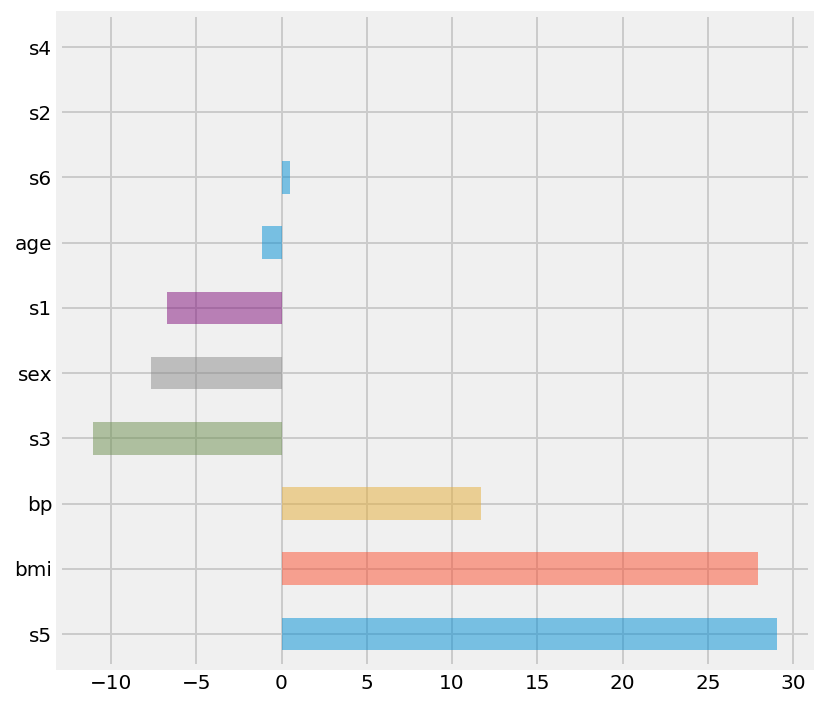

In [169]:
best_lasso = LassoCV(n_alphas=100, cv=10, verbose=0)  # what numbers
best_lasso.fit(X_train, y_train)
print(best_lasso.alpha_)
best_lasso.score(X_train, y_train)

# applying the best lasso:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict, cross_val_score
lasso = Lasso(alpha=best_lasso.alpha_)
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=10)
print(lasso_scores)
print(np.mean(lasso_scores))
predictions = cross_val_predict(lasso, X_train, y_train, cv=10)
print(r2_score(y_train, predictions))

lasso.fit(X_train, y_train)
# create a df
lasso_coefs = pd.DataFrame(
     {"variable": X.columns, 'coef': lasso.coef_, 'abs_coef': np.abs(lasso.coef_)})
lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)
lasso_coefs.head(20)
# % zeroed out
print('Percent variables zeroed out:', np.sum(
    (lasso.coef_ == 0))/float(X.shape[0]))
# Plotting results:
fig, ax = plt.subplots(figsize=(6, 6))
lasso_coefs.coef[:30].plot(kind='barh', ax=ax, alpha=0.5)
ax.set_yticklabels(lasso_coefs.variable[:30].values)
plt.show()

coef_df = pd.DataFrame({'coef': best_lasso.coef_[0],
                        'feature': X.columns,
                        'abs_coef': np.abs(best_lasso.coef_[0])})
#feature importance

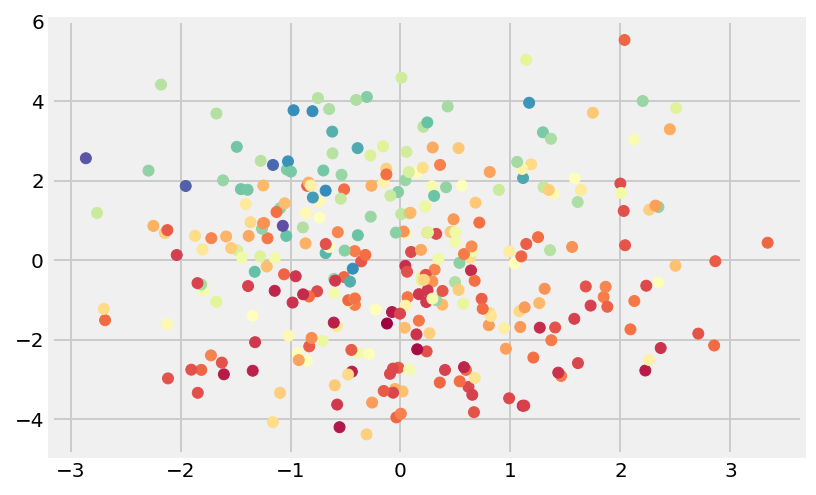

In [24]:
#Example depicting the regression result with de dimensionality reduction and y as a Hue

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(2)

# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(X_train)

# Plot based on the two dimensions, and shade by cluster label

fig, ax = plt.subplots()
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=y_train, cmap='Spectral', s=30)

plt.show()



### KNN Regressor

In [170]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor 
model = KNeighborsRegressor()
model.fit(X_train,y_train)
scores = cross_val_score(model, X_train, y_train, cv=4)
print(scores, np.mean(scores))

params = {'n_neighbors':np.linspace(2,20,2),
             'weights':['uniform', 'distance'],
             'p': [1, 2]}
             

[0.47350659 0.48238257 0.31335238 0.57834668] 0.46189705136122183


## DecisionTreeRegressor
Will return a value, works well/better when data is not linear

In [27]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)
model_scores = cross_val_score(model, X_train, y_train, cv=4)
print(model_scores, np.mean(model_scores))

params ={'max_features': (2,3,'log2','sqrt',None), 
          'max_depth': (5,10,15,25)}   
pprint(params)

[0.8373494  0.94949495 0.89256198 0.86632391] 0.8864325595028496
{'max_depth': (5, 10, 15, 25), 'max_features': (2, 3, 'log2', 'sqrt', None)}


### RandomForest Regressor

In [26]:
from pprint import pprint

In [172]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100,n_jobs=-1)
model.fit(X_train,y_train)
model_scores = cross_val_score(model, X_train, y_train, cv=4)
print(model_scores, np.mean(model_scores))

[0.46874721 0.50662532 0.38181301 0.54110337] 0.47457222515662667


### Large feature space - Randomized Gridsearch CV

Particularly for a Random Forest the number of search combinations can quickly become enormous. A Randomized Grid will limit the initial search. Finetuning through a 'normal' Grid is still needed.

In [173]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [174]:
from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
# First create the base model to tune
model = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
random_grid = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=1, random_state=42, n_jobs = -1, error_score=np.nan)
# Fit the random search model
random_grid.fit(X_train, y_train)

pprint(random_grid.best_params_)
pprint(random_grid.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.6min finished


{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 800}
0.5132460092271034


In [175]:
#Zoom in with normal CV, using the best params from the random grid
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid_ = {
    'bootstrap': [True],
    'max_depth': [40,50,60],
    'max_features': [2, 3, 'sqrt' ],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [3,4,5,6,7],
    'n_estimators': [350, 400, 450]
}
# Create a based model
model_ = RandomForestRegressor()
# Instantiate the grid search model
grid_= GridSearchCV(estimator = model_, param_grid = param_grid_, 
                          cv = 3, n_jobs = -1, verbose = 1)
grid_.fit(X_train, y_train)
pprint(grid_.best_params_)
pprint(grid_.best_score_)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed:  1.9min finished


{'bootstrap': True,
 'max_depth': 40,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 350}
0.5179398054394081


In [176]:
#Continue zooming in until the score gets worse
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [110,120],
    'max_features': [3, 4],
    'min_samples_leaf': [3,4, 5],
    'min_samples_split': [2,3],
    'n_estimators': [340, 350, 360]
}
# Create a based model
model = RandomForestRegressor()
# Instantiate the grid search model
grid__= GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 1)
grid__.fit(X_train, y_train)
grid__.best_params_
pprint(grid__.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   18.4s finished


0.5148729987008694


### Support Vector Regressor

In [177]:

from sklearn.svm import SVR

model = SVR(gamma='auto')

model.fit(X_train,y_train)
model_scores = cross_val_score(model, X_train, y_train, cv=4)
print(model_scores, np.mean(model_scores))


#superdupper ultra mega slow!
gamma_range = np.logspace(-5, 2, 10)
C_range = np.logspace(-3, 2, 10)
kernel_range = ['rbf', 'sigmoid', 'linear', 'poly']

param_grid = dict(gamma=gamma_range, C=C_range, kernel=kernel_range)





[0.10836112 0.10722262 0.10173566 0.12801776] 0.11133429060394168


### Regressors - Stacking

Stacking is the concept to fit the strengths of different regressors to make even a better fit:


![](https://burakhimmetoglu.files.wordpress.com/2016/12/models.png)

This can be made very complex: gridsearch, cross val, nested cross val... all work.

**Warning:** 'Tuning for Kaggle' is different from 'tuning for production': Having imputed NaN's by a model prediction, preprocessed all the variables extensively, random gridsearched every model and then gridsearching the stacker may deliver a good R2 but also a blackbox.

http://rasbt.github.io/mlxtend/user_guide/regressor/StackingRegressor/#example-2-stacked-regression-and-gridsearch

Mean Squared Error: 393.58786634304204
R2 Stacker: 0.9373909966799613
R2 linear reg: 0.5539411781927148
R2 knn reg: 0.6099606087785179
R2 Ridge reg: 0.5538342171337559


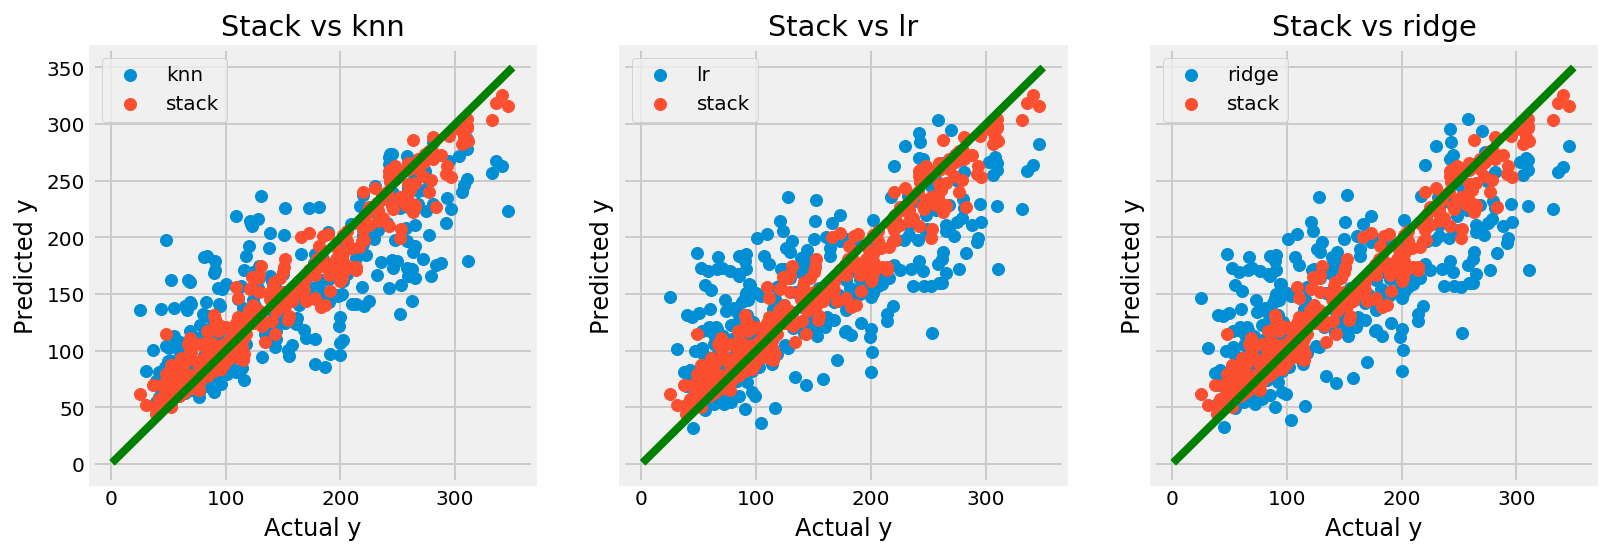

In [218]:
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor

#setting up the models and the  stacker

lr = LinearRegression()
knn = KNeighborsRegressor()
ridge = Ridge(random_state=1)
rfr = RandomForestRegressor(n_estimators=100,n_jobs=-1)

stack = StackingRegressor(regressors=[knn, lr, ridge], 
                           meta_regressor=rfr)

# Training the stacking regressor

stack.fit(X_train, y_train)
predictions = stack.predict(X_train)

# Evaluate and visualize the fit

print(f'Mean Squared Error: {np.mean((stack.predict(X_train) - y_train) ** 2)}')
print(f'R2 Stacker: {stack.score(X_train, y_train)}')

#simple plot

lr.fit(X_train,y_train)
lr_pred = lr.predict(X_train)
print(f'R2 linear reg: {lr.score(X_train, y_train)}')

knn.fit(X_train, y_train)
knn_pred = knn.predict(X_train)
print(f'R2 knn reg: {knn.score(X_train, y_train)}')

ridge = ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_train)
print(f'R2 Ridge reg: {ridge.score(X_train, y_train)}')


fig, (ax1, ax2, ax3) = plt.subplots(1,3 , sharey=True, figsize = (12,4))

ax1.point_1 = [1, 350]
ax1.plot(ax1.point_1, ax1.point_1, 'g')
ax1.scatter(y_train, knn_pred, label = 'knn')
ax1.scatter(y_train, predictions, label = 'stack')
ax1.set_title('Stack vs knn')
ax1.set_xlabel('Actual y')
ax1.set_ylabel('Predicted y')
ax1.legend()

ax2.point_1 = [1, 350]
ax2.plot(ax1.point_1, ax1.point_1, 'g')
ax2.scatter(y_train, lr_pred, label = 'lr', )
ax2.scatter(y_train, predictions, label = 'stack')
ax2.set_title('Stack vs lr')
ax2.set_xlabel('Actual y')
ax2.set_ylabel('Predicted y')
ax2.legend()

ax3.point_1 = [1, 350]
ax3.plot(ax1.point_1, ax1.point_1, 'g')
ax3.scatter(y_train, ridge_pred, label = 'ridge')
ax3.scatter(y_train, predictions, label = 'stack')
ax3.set_title('Stack vs ridge')
ax3.set_xlabel('Actual y')
ax3.set_ylabel('Predicted y')
ax3.legend()

ax.legend()
ax.grid(True)




plt.show()

In [219]:
df_ = pd.DataFrame(X_train)

R2 linear reg: 0.5539411781927148
R2 knn reg: 0.6099606087785179
R2 Ridge reg: 0.5538342171337559
R2 Stacker:
0.6301407559996604
2325.0986754927653


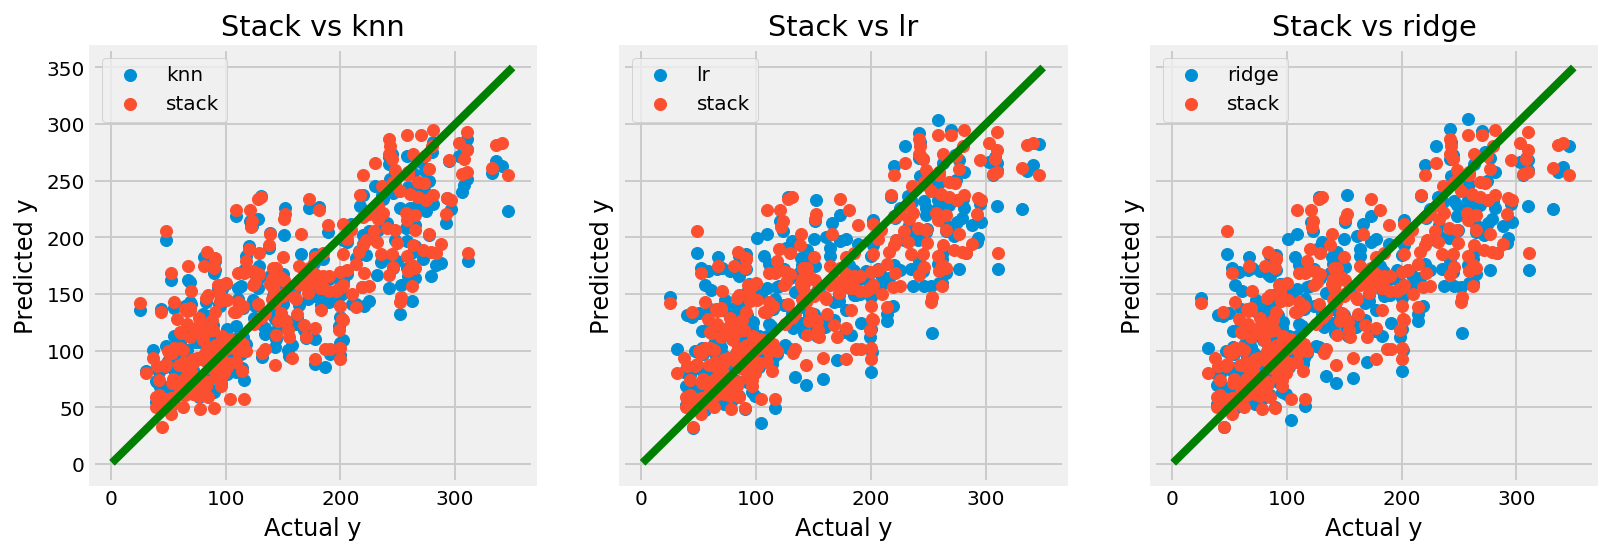

In [224]:

#or very simply
#df - dataframe with results of 3 regressors and true output e.g.

from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor

#setting up the models and the  stacker

lr = LinearRegression()
knn = KNeighborsRegressor()
ridge = Ridge(random_state=1)
rfr = RandomForestRegressor(n_estimators=100,n_jobs=-1)

df_ = pd.DataFrame()

lr.fit(X_train,y_train)
df_['lr_pred'] = lr.predict(X_train)
print(f'R2 linear reg: {lr.score(X_train, y_train)}')

knn.fit(X_train, y_train)
df_['knn_pred'] = knn.predict(X_train)
print(f'R2 knn reg: {knn.score(X_train, y_train)}')

ridge.fit(X_train, y_train)
df_['ridge_pred'] = ridge.predict(X_train)
print(f'R2 Ridge reg: {ridge.score(X_train, y_train)}')

#Training the stacking regressor

#stacker= LinearRegression() #Toggle to see the difference
stacker= RandomForestRegressor(n_estimators=1000,n_jobs=-1)

stacker.fit(df_[['lr_pred', 'knn_pred', 'ridge_pred']], y_train)

df_['stack_pred'] = stacker.predict(df_[['lr_pred', 'knn_pred', 'ridge_pred']])

# # # Evaluate and visualize the fit

print('R2 Stacker:')
print(stacker.score(df_[['lr_pred', 'knn_pred', 'ridge_pred']], y_train))
print(np.mean((df_['stack_pred'] - y_train) ** 2))
# print(f'Mean Squared Error: {np.mean((stack.predict(df_[['lr_pred', 'knn_pred', 'ridge_pred']]) - y_train) ** 2)}')
# print(f'R2 Stacker: {stacker.score(df_[['lr_pred', 'knn_pred', 'ridge_pred']], y_train)}')

# # #simple plot




fig, (ax1, ax2, ax3) = plt.subplots(1,3 , sharey=True, figsize = (12,4))

ax1.point_1 = [1, 350]
ax1.plot(ax1.point_1, ax1.point_1, 'g')
ax1.scatter(y_train, df_['knn_pred'], label = 'knn')
ax1.scatter(y_train, df_['stack_pred'], label = 'stack')
ax1.set_title('Stack vs knn')
ax1.set_xlabel('Actual y')
ax1.set_ylabel('Predicted y')
ax1.legend()

ax2.point_1 = [1, 350]
ax2.plot(ax1.point_1, ax1.point_1, 'g')
ax2.scatter(y_train, df_['lr_pred'], label = 'lr')
ax2.scatter(y_train, df_['stack_pred'], label = 'stack')
ax2.set_title('Stack vs lr')
ax2.set_xlabel('Actual y')
ax2.set_ylabel('Predicted y')
ax2.legend()

ax3.point_1 = [1, 350]
ax3.plot(ax1.point_1, ax1.point_1, 'g')
ax3.scatter(y_train, df_['ridge_pred'], label = 'ridge')
ax3.scatter(y_train, df_['stack_pred'], label = 'stack')
ax3.set_title('Stack vs ridge')
ax3.set_xlabel('Actual y')
ax3.set_ylabel('Predicted y')
ax3.legend()

ax.legend()
ax.grid(True)




# plt.show()

### Bayes regressor
Good complete overview:
https://blog.applied.ai/tag/scientific-python/
#### Training the model

In [225]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
data_regression = datasets.load_diabetes()
df = pd.DataFrame(data_regression['data'], columns=data_regression['feature_names'])
df['ycol'] = data_regression['target']
df.head()
X = df.drop('ycol', axis=1)
y = df['ycol'].values
ss = StandardScaler()
X = ss.fit_transform(X)

In [28]:
#create data set for regression
df, X, y, X_train, y_train, X_test, y_test = regression()

Diabetes Dataset Data has been created for Regression ML
Shape df (442, 11)
Shape X (442, 10)
Shape y (442,)
Shape X_train (309, 10)
Shape y_train (309,)
Shape X_test (133, 10)
Shape y_test (133,)
Mean X 1.1497455271199033e-17, should be close to 0
Std X 1.0, should be close to 1
Available columns in df ['age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6' 'ycol']


In [41]:
from theano import shared
predictors_shared = shared(df[['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6']].values)
outcome_shared = shared(df['ycol'].values)

In [42]:
predictors_shared.get_value().shape

(442, 10)

In [43]:
outcome_shared.get_value().shape

(442,)

In [44]:
import pymc3 as pm

with pm.Model() as reg:

    pm.glm.GLM(predictors_shared,y=outcome_shared,labels=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])
    step = pm.NUTS()
    start = pm.find_MAP()
    trace = pm.sample(10000,step=step,start=start,tune=1000)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
logp = -2,473, ||grad|| = 7.3273: 100%|██████████| 110/110 [00:00<00:00, 1276.55it/s]   
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd_log__, s6, s5, s4, s3, s2, s1, bp, bmi, sex, age, Intercept]
100%|██████████| 11000/11000 [01:08<00:00, 160.25it/s]
The acceptance probability does not match the target. It is 0.8841729270414986, but should be close to 0.8. Try to increase the number of tuning steps.


In [45]:
reg_glm_summary = pm.summary(trace[1000:])
reg_glm_summary

mean          sd  mc_error      hpd_2.5    hpd_97.5  \
Intercept  152.122605    2.566335  0.010425   147.034095  157.051860   
age         -8.720102   60.262042  0.249829  -124.046590  111.385046   
sex       -237.484674   61.291045  0.275632  -362.157737 -120.907466   
bmi        520.971944   66.553331  0.352277   389.077582  650.319511   
bp         322.742099   65.139699  0.320450   196.542520  451.078940   
s1        -594.037073  360.054355  2.553195 -1289.517329  123.807394   
s2         319.516354  295.878477  2.038236  -265.030497  894.656926   
s3          13.574546  189.724174  1.278758  -363.427451  379.035281   
s4         153.680404  156.756073  0.784757  -159.383513  453.513336   
s5         675.597095  153.071020  0.980301   371.880217  973.643107   
s6          68.414572   65.816603  0.330515   -59.018186  199.430034   
sd          54.199914    1.843734  0.008487    50.765827   58.006580   

                  n_eff      Rhat  
Intercept  47126.012762  0.999978  
age        46883.254678  1.000030  
sex        46957.599671  0.999968  
bmi        41912.381815  0.999967  
bp         44246.175667  1.000042  
s1         19213.369376  0.999967  
s2         20691.807000  0.999981  
s3         21124.854593  0.999969  
s4         38574.165917  0.999979  
s5         21404.519297  0.999969  
s6         44308.488681  0.999960  
sd         43598.918907  0.999962

100%|██████████| 10000/10000 [00:05<00:00, 1668.31it/s]


(10000, 442)
r2_r(r2_median=0.511347, r2_mean=0.511347, r2_std=0.0)


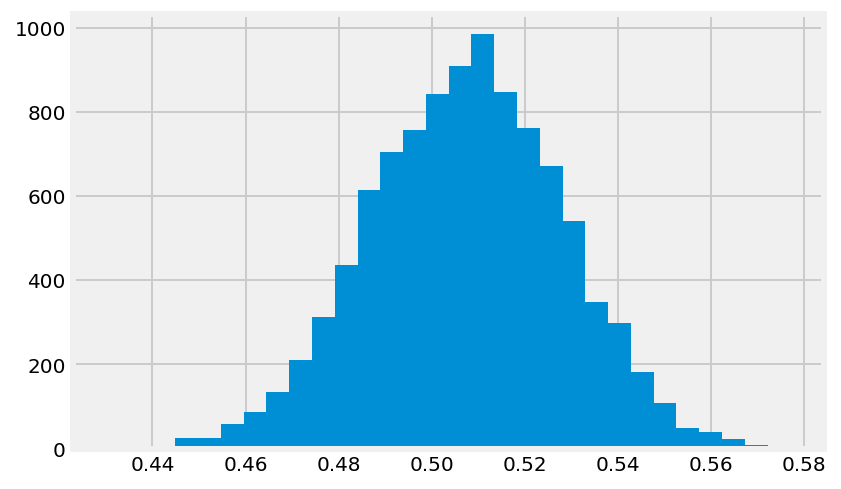

In [46]:
preds = pm.sample_ppc(trace, model=reg)
print(preds['y'].shape)
print(pm.r2_score(df['ycol'], preds['y'][10], round_to=6))
r2_scores = [pm.r2_score(df['ycol'], preds['y'][i],
                         round_to=6).r2_mean for i in range(len(trace))]

plt.hist(r2_scores, bins=30)
plt.show()

In [47]:
# averaging over all samples allows to calculate the usual R2 score
from sklearn import metrics
metrics.r2_score(df['ycol'],preds['y'].mean(axis=0))

0.516705245667495

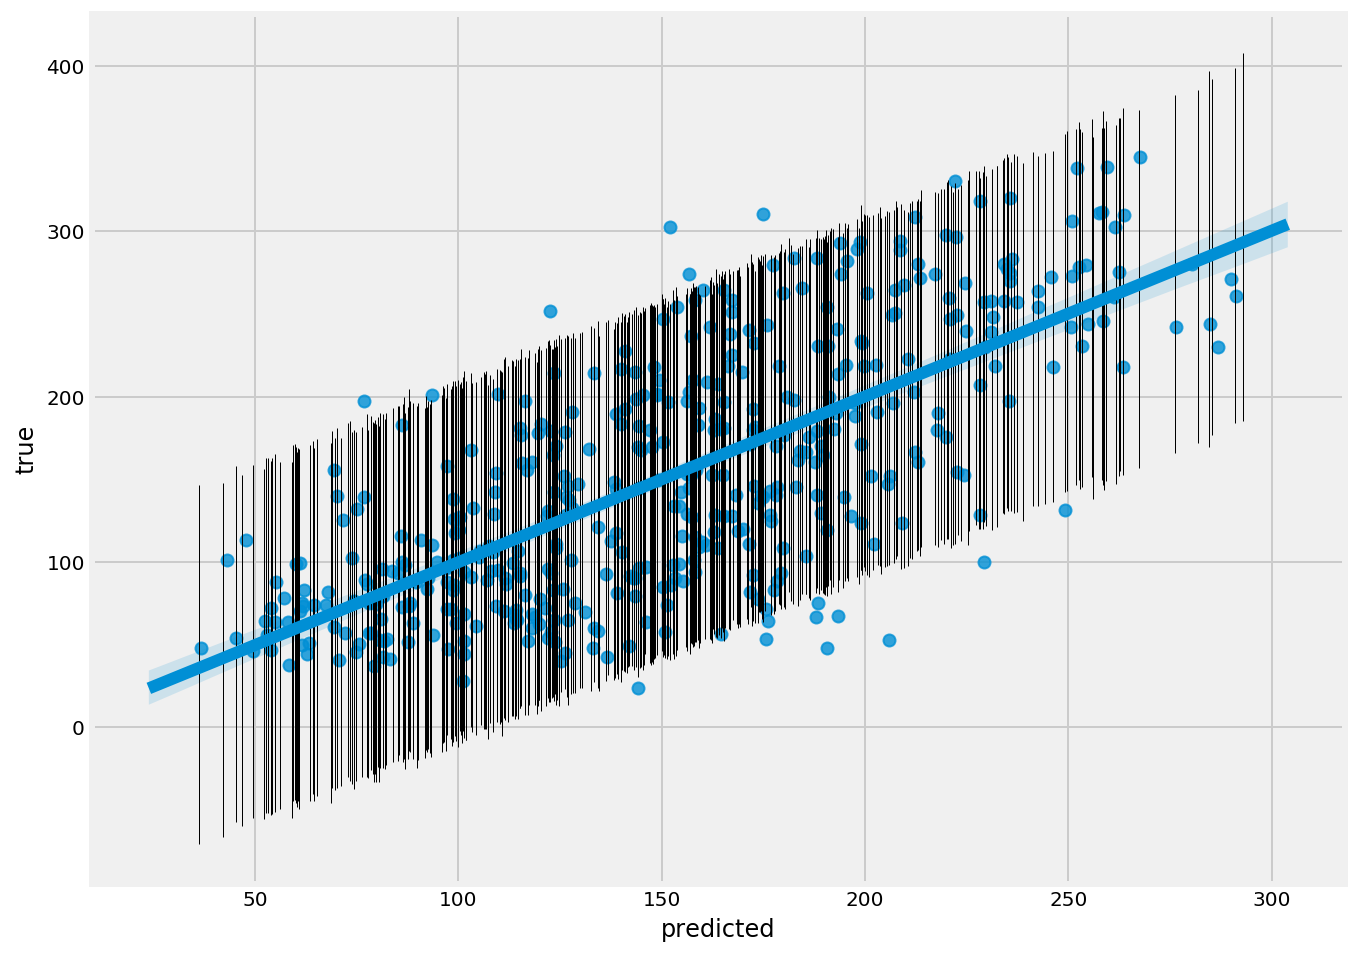

In [48]:
fig, ax  = plt.subplots(figsize = (10,8))
sns.regplot(preds['y'].mean(axis=0)[:],
            df['ycol'].values[:], y_jitter=3, x_jitter=2)
plt.vlines(preds['y'].mean(axis=0)[:],
           pm.stats.hpd(preds['y'])[:,0],
           pm.stats.hpd(preds['y'])[:,1],
          lw=0.5)
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

### Classifiers

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

    
data_binary_clf = datasets.load_breast_cancer()
df = pd.DataFrame(data_binary_clf['data'], columns=data_binary_clf['feature_names'])
df['ycol'] = data_binary_clf['target']
X = df.drop('ycol', axis=1)
y = df['ycol'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
ss = StandardScaler()
ss.fit_transform(X_train)
ss.transform(X_test)
ss.transform(X)

In [69]:
df, X, y, X_train, y_train, X_test, y_test = binclass()

Breast Cancer Dataset Data has been created for Binary ML
Shape df (569, 31)
Shape X (569, 30)
Shape y (569,)
Shape X_train (398, 30)
Shape y_train (398,)
Shape X_test (171, 30)
Shape y_test (171,)
Mean X 7.617208557562213e-17, should be close to 0
Std X 0.9999999999999999, should be close to 1
Available columns ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension' 'ycol']


#### KNN
- Does not actually train
- Does not deal with high-dimensionality very well
- Very intuitive

In [80]:
from sklearn.neighbors import KNeighborsClassifier 

model = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)

model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
           weights='uniform')

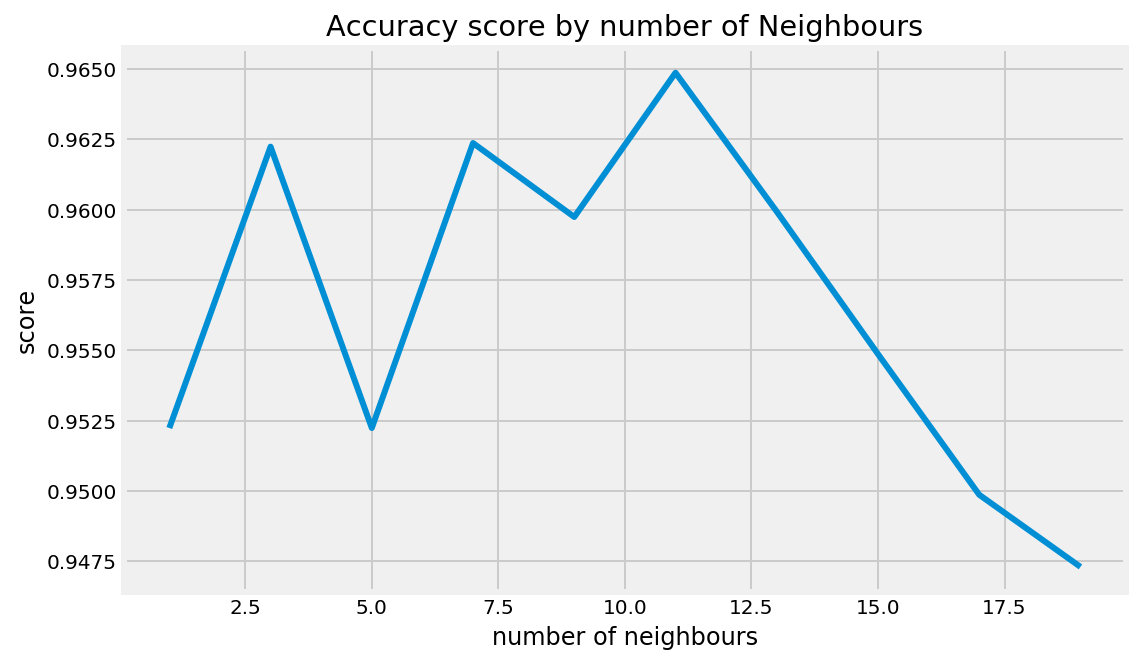

max score: 0.9648717948717949  at: 6 Neighbours


In [51]:
#loop to determine optimum number of neighbors and plotting it
from sklearn.model_selection import cross_val_score
k_values = range(1,20,2)
accs = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    accs.append(np.mean(scores))
    
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(k_values, accs, lw=3)
plt.title('Accuracy score by number of Neighbours')
plt.xlabel('number of neighbours')
plt.ylabel('score')

plt.show()

print ('max score:',np.max(accs),' at:', np.argmax(accs)+1, 'Neighbours')

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint

In [53]:

params = {'n_neighbors': range(2,20,2), #took me 1 hour to figure out np.linspace(2,20,2) does not work.
          'weights':['uniform', 'distance'],
          'p': [1, 2]}

clf = KNeighborsClassifier()

grid = GridSearchCV(clf, params, n_jobs=-1, cv=3, verbose=1)

grid.fit(X_train,y_train)
print(grid.best_score_)
print(grid.best_estimator_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
0.9673366834170855
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=1,
           weights='distance')


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    0.2s finished


#### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X_train)

clf = LogisticRegression()

clf.fit(X_train, y_train)

clf.score(X_train,y_train)

#clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')
#One practical advantage of the MLR is that its predicted probabilities using the predict_proba method are more reliable (i.e. better calibrated).

0.9899497487437185

In [55]:
params = {'penalty':['l1','l2'],
             'solver':['liblinear'],
             'C': np.logspace(-3,3,50),
             'class_weight' : ['balanced',''],
              'max_iter': [1000]
          
            }

#create your gridsearch object
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

grid = GridSearchCV(clf, params, n_jobs=-1, cv=5, verbose=1)

grid.fit(X_train,y_train)
grid.best_score_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.0s finished


0.9874371859296482

#### Decision Trees

In [56]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

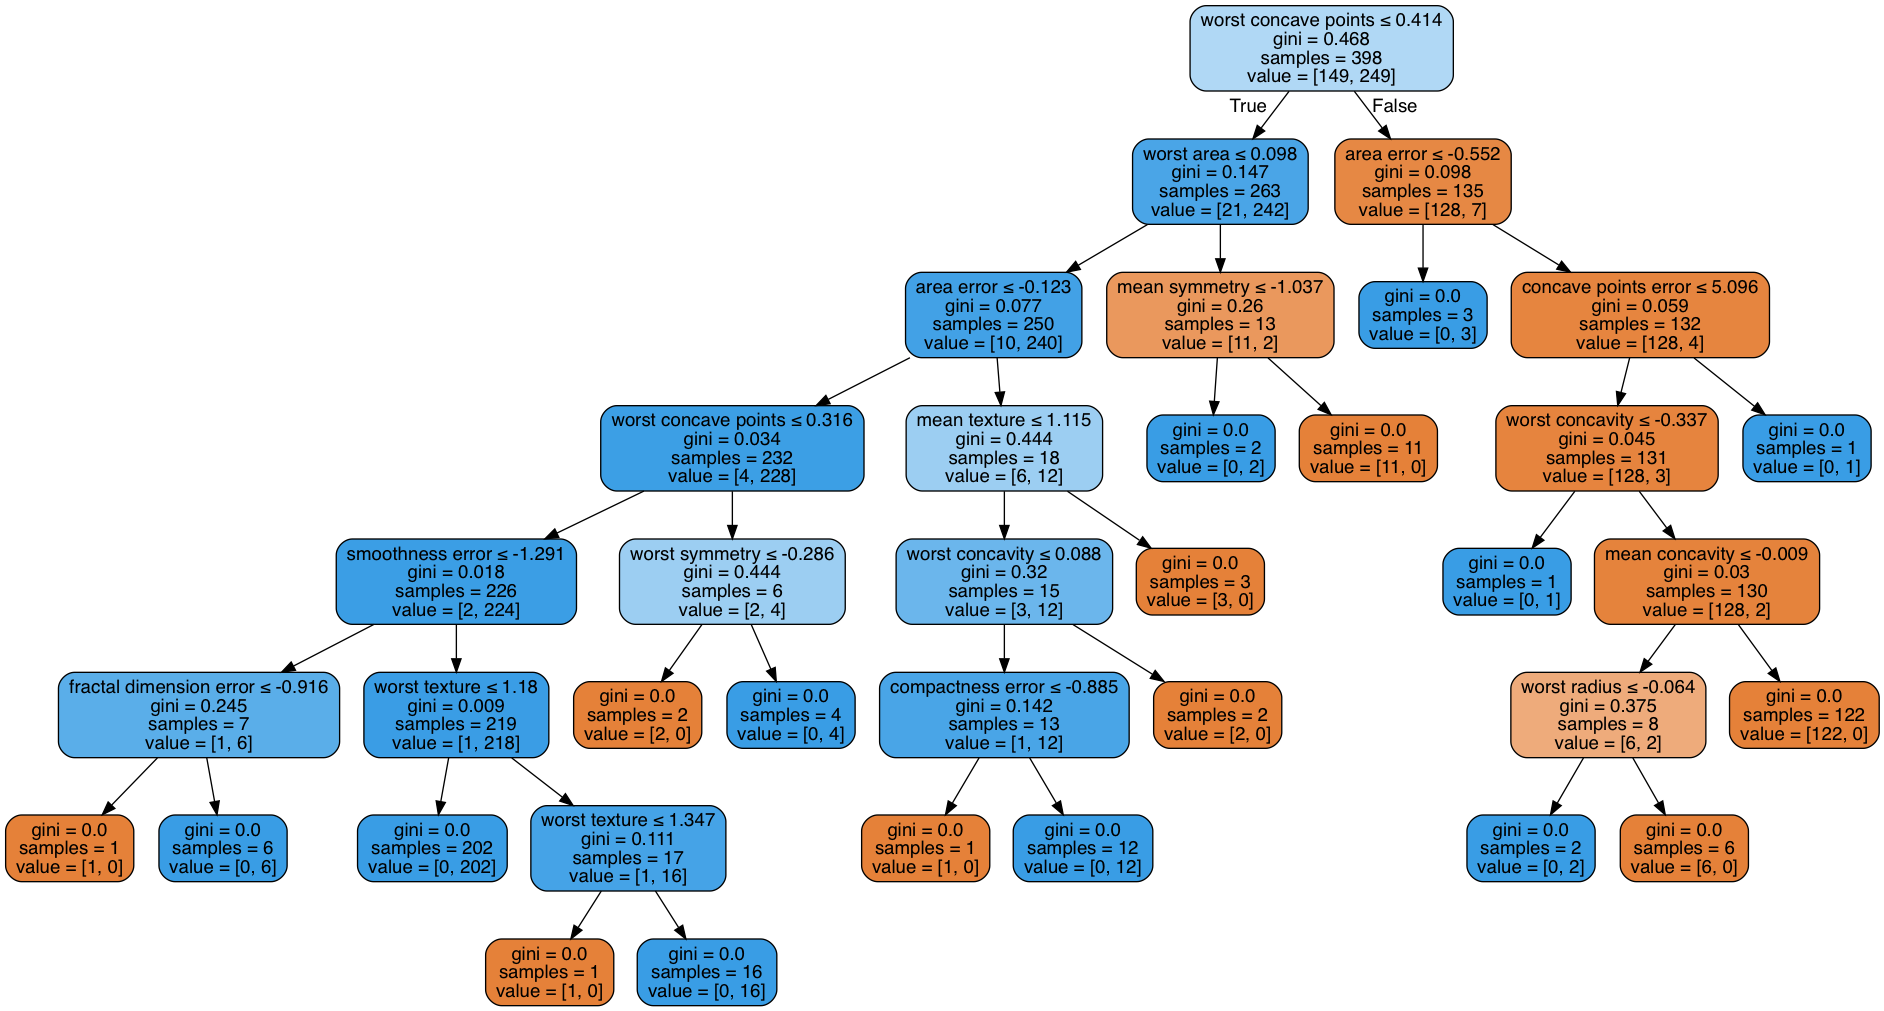

In [58]:
#Print Decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()  

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns.values)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 
# to file
#graph.write_gif('tree.gif')

In [59]:
#exhausive grid
params = {'n_estimators' : [10, 50, 100, 200], 
          'max_depth' : [3, 10, 20, 40]}

In [25]:
#random grid
from scipy.stats import expon as sp_expon
from scipy.stats import randint as sp_randint

n_estimators = (sp_expon(scale=100))
max_depth = sp_randint(1, 40)
#https://www.jeremyjordan.me/hyperparameter-tuning/

In [30]:
sp_expon.rvs(loc=0, scale=100, size=10, random_state=None) #The location (loc) keyword specifies the mean. 
#The scale (scale) keyword specifies the standard deviation.

# sp_randint.rvs(1, 40, size=100)


array([ 33.97772627, 142.52636606, 175.02841845,  14.22844503,
        18.3234821 , 207.43558136,  68.35415639,  24.53073304,
        12.04634812,  40.72518329])

In [31]:
print(sp_expon.rvs(scale=100))

76.22340589805486


In [62]:
#example of using randonCV
print(__doc__)

import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

# get some data
digits = load_digits()
X, y = digits.data, digits.target

# build a classifier
clf = RandomForestClassifier(n_estimators=20)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 30
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

Automatically created module for IPython interactive environment
RandomizedSearchCV took 3.55 seconds for 30 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.927 (std: 0.011)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 3}

Model with rank: 2
Mean validation score: 0.926 (std: 0.018)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 8}

Model with rank: 3
Mean validation score: 0.920 (std: 0.004)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 4, 'min_samples_split': 6}

GridSearchCV took 23.49 seconds for 216 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.935 (std: 0.005)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1, 'mi

In [65]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [41]:
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import expon as sp_expon
from scipy.stats import randint as sp_randint
from pprint import pprint

#n_estimators = (sp_expon.rvs(scale=100))
max_depth = sp_randint.rvs(1, 40)
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#pprint(random_grid)


# param_dist = {"max_depth": [3, None],
#               "max_features": sp_randint(1, 11),
#               "min_samples_split": sp_randint(2, 11),
#               "min_samples_leaf": sp_randint(1, 11),
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 30
# random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
    #                               n_iter=n_iter_search)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, 
                               random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

rf_random.best_params_

# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train, y_train)
# rf_random.best_score_

TypeError: object of type 'int' has no len()

#### SVM Support Vector Matrices

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_train, y_train)  

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

clf = svm.SVC()

gamma_range = np.logspace(-5, 2, 10)
C_range = np.logspace(-3, 2, 10)
kernel_range = ['rbf', 'sigmoid', 'linear', 'poly']

param_grid = dict(gamma=gamma_range, C=C_range, kernel=kernel_range)

grid = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', verbose=1)
grid.fit(X, y)

# check the results of the grid search
print(grid.best_params_)
print(grid.best_score_)

best_svm = grid.best_estimator_

# exhaustive cv:
#     param_grid = [
#   {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#   {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
#  ]


# Random CV
# {'C': scipy.stats.expon(scale=100), 'gamma': scipy.stats.expon(scale=.1),
#   'kernel': ['rbf'], 'class_weight':['balanced', None]}

Fitting 3 folds for each of 400 candidates, totalling 1200 fits
{'C': 2.1544346900318843, 'gamma': 0.01291549665014884, 'kernel': 'rbf'}
0.9771528998242531


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    9.8s finished


In [75]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro', 'neg_mean_squared_error']
clf = svm.SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, X_train, y_train, scoring=scoring,
                        cv=5, return_train_score=False)
sorted(scores.keys())
df_scores = pd.DataFrame(scores)
df_scores.iloc[:,2:] #skip first 2 columns

test_neg_mean_squared_error  test_precision_macro  test_recall_macro
0                      -0.0000              1.000000           1.000000
1                      -0.0375              0.971698           0.950000
2                      -0.0375              0.957538           0.963333
3                      -0.0125              0.990196           0.983333
4                      -0.0000              1.000000           1.000000

#### Bayes

In [19]:
# create data set for regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets


def regressionminmax():
    data_regression = datasets.load_diabetes()
    df = pd.DataFrame(data_regression['data'],
                      columns=data_regression['feature_names'])
    df['ycol'] = data_regression['target']
    X = df.drop('ycol', axis=1)
    y = df['ycol'].values
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=0)
    mm = MinMaxScaler()
    X_train = mm.fit_transform(X_train)
    X_test = mm.transform(X_test)
    X = pd.DataFrame(mm.transform(X), columns=df.drop('ycol', axis=1).columns)
    print('Diabetes Dataset Data has been created for Regression ML')
    print(f'Shape df {df.shape}')
    print(f'Shape X {X.shape}')
    print(f'Shape y {y.shape}')
    print(f'Shape X_train {X_train.shape}')
    print(f'Shape y_train {y_train.shape}')
    print(f'Shape X_test {X_test.shape}')
    print(f'Shape y_test {y_test.shape}')
    print(f'Max X {X_train.max()}, should be close to 1')
    print(f'Min X {X_train.min()}, should be close to 0')
    print(f'Available columns in df {df.columns}')
    return df, X, y, X_train, y_train, X_test, y_test

In [20]:
df, X, y, X_train, y_train, X_test, y_test = regressionminmax()

Diabetes Dataset Data has been created for Regression ML
Shape df (442, 11)
Shape X (442, 10)
Shape y (442,)
Shape X_train (309, 10)
Shape y_train (309,)
Shape X_test (133, 10)
Shape y_test (133,)
Max X 1.0, should be close to 1
Min X 0.0, should be close to 0
Available columns in df Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'ycol'], dtype='object')


In [21]:
from sklearn import naive_bayes
classifier = naive_bayes.MultinomialNB()#no .fit see below
from sklearn.model_selection import cross_val_score
print(cross_val_score(classifier, X_train, y_train, cv=5))
#run seperately if you need scores later:
#classifier = naive_bayes.MultinomialNB().fit(X, y)

# The differences can be summarized as follows
# - ***BernoulliNB*** is designed for binary/boolean features
# -    The ** *multinomial Naive Bayes classifier*** is suitable 
# for classification with discrete features(e.g., word counts for 
# text classification). The multinomial distribution normally 
# requires integer feature counts. However, in practice, 
# fractional counts such as `tf-idf` may also work
# - ***GaussianNB*** is designed for continuous features
# (that can be scaled between 0, 1) and is assumed to be normally 
# distributed

[0.01104972 0.03658537 0.05714286 0.         0.5       ]


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


#### Supervised
##### Single
##### Ensembles
Ensemble has the advantage that individual samples / models not need to be overly accurate, with the ensemble majority vote the ensemble will actually turn out to be a good predictor. If out of 100 ensembles 51 actually predict right, the ensemble will score 100% 

In [ ]:
X_train

In [24]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
def do_cross_val(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, n_jobs=1,
                             scoring='neg_mean_squared_error')
    # , scores.std()#, cross_val_score(model, X, y, cv=5, n_jobs=1).mean()
    return -scores.mean()
values = sorted(
    list(set(np.logspace(0, 3, num=20, endpoint=True, base=10.0).astype(int))))
score_list = []
for n in values:
    models = [('Bagging', BaggingRegressor(random_state=1, n_estimators=n)),
              ('RandomForest', RandomForestRegressor(
                  random_state=1, n_estimators=n))
              ]
    for model in models:
        model[1].fit(X_train, y_train)
        train_score_cv = do_cross_val(model[1], X_train, y_train)
        train_predictions = model[1].predict(X_train)
        test_predictions = model[1].predict(X_test)
        train_score = mean_squared_error(y_train, train_predictions)
        test_score = mean_squared_error(y_test, test_predictions)
        score_list.append(
            [model[0], n, train_score_cv, train_score, test_score])
df_scores = pd.DataFrame(score_list, columns=[
                         'model', 'estimators', 'train_mse_cv', 'train_mse', 'test_mse'])
df_scores.head()

model  estimators  train_mse_cv    train_mse     test_mse
0       Bagging           1   6427.229878  1950.860841  6910.240602
1  RandomForest           1   6435.156055  1850.543689  7287.075188
2       Bagging           2   4429.175978  1355.735437  5085.310150
3  RandomForest           2   4487.738895  1352.097896  5351.633459
4       Bagging           4   4021.046887   698.596481  4534.156955

### Adaboost (Learn from your mistakes)

In [26]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()

clf.fit(X_train, y_train)

print(f"Model Training score:{clf.score (X_train, y_train)}, with: {clf})" )
print(f"Model Testing score:{clf.score (X_test, y_test)}, with: {clf})" )

Model Training score:0.02912621359223301, with: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))
Model Testing score:0.0, with: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))


### Create your own ensemble


### Classifiers - Voting

In [36]:
df, X, y, X_train, y_train, X_test, y_test = binclass()

Breast Cancer Dataset Data has been created for Binary ML
Shape df (569, 31)
Shape X (569, 30)
Shape y (569,)
Shape X_train (398, 30)
Shape y_train (398,)
Shape X_test (171, 30)
Shape y_test (171,)
Mean X 7.617208557562213e-17, should be close to 0
Std X 0.9999999999999999, should be close to 1
Available columns ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension' 'ycol']


In [40]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
clf4 = KNeighborsClassifier(n_neighbors=2)

clf = VotingClassifier(estimators=[('logreg', clf1), ('Rf', clf2), ('Gnb', clf3), ('Knn', clf4)], 
                       voting='hard',weights=[1,4,1,2])

print("Ensembled Classifier")

scores = cross_val_score(clf, X, y, cv=4,scoring='f1')
print("F1 score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=4,scoring='precision')
print("precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=4,scoring='accuracy')                                     
print("accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



Ensembled Classifier
F1 score: 0.96 (+/- 0.03)


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

precision: 0.97 (+/- 0.05)
accuracy: 0.95 (+/- 0.04)


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Unsupervised
### KMeans

$Very$ sensitive to outliers, reduce to mean +/- 2 std

https://datascience.stackexchange.com/questions/22/k-means-clustering-for-mixed-numeric-and-categorical-data

https://stackoverflow.com/questions/41827660/reveal-k-modes-cluster-features
(pca to plot multi dimensional space)

In [ ]:
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
#K is the (initial) number of points you are looking for

model = KMeans(n_clusters=3, random_state=0) # use KMeans++ method for generally best results
model.fit(df)

predicted = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", predicted)
print("Location of centroids: ")
print(centroids)

df['predicted'] = predicted # assigns predited cluster to 
df.head()

In [ ]:
#Visually verifying cluster labels

from matplotlib import pyplot as plt

df.plot(x="x", y="y", kind="scatter", c=df['predicted'], cmap='Spectral', figsize=(10,8));
plt.scatter(centroids[:,:1], centroids[:,1:], marker='o', s=150, alpha=.7);

In [1]:
score = silhouette_score(df, predicted, metric='euclidean')
score

NameError: name 'silhouette_score' is not defined

In [ ]:
#elbow method:
inertias = []
for n_clusters in range(2,30):
    model = KMeans(n_clusters=n_clusters)
    model.fit(df)
    inertia = model.inertia_
    inertias.append(inertia.mean())

plt.plot(inertias)
plt.ylabel("Inertia")
plt.xlabel("K")
plt.title("Inertia across K in .......")
sns.despine()

#Evaluating clusters when the ground truth is available

# def cluster_score(X, y, labels):
#     print("Silhouette Coefficient: %0.3f"
#           % metrics.silhouette_score(X, labels))
#     print('Estimated number of clusters: %d' % n_clusters_)
#     print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
#     print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
#     print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
# labels = model.labels_
# cluster_score(X,y,labels)

### Time series
## Model tuning
### Feature selection
Some models will do this for free (It is a feature not a bug):
- Lasso
- Decision trees

see: The sklearn.feature_selection module implements feature selection algorithms
#### Regressors
##### Feature importance
The feature importance scores of a fit gradient boosting model can be accessed via the feature_importances_ property:
#### Classifiers
##### Class probabilities
### Feature reduction/extraction
https://elitedatascience.com/dimensionality-reduction-algorithms
#### Genetic Algorithms (GA)
#### LDA
#### PCA

In [ ]:
# load pca, standard scaler and dataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes

In [ ]:
scaler = StandardScaler()
X = df['col1','col2']
# standardize the data
X = pd.DataFrame(scaler.fit_transform(),columns=df.columns)
pca = PCA(n_components=5)
cols = ['PC_{}'.format(i) for i in range(1,pca.n_components+1)]
X_pca = pd.DataFrame(pca.fit_transform(X),columns=cols)
X_pca.head()

### Gridsearch
## Autolearners
### Auto SKLearn
### AutoML
### H2O
### PyMC3
## Model evaluation
### Bias/Variance Trade-off
The ${\rm Bias}^2$ is the source of error in our model that represents how oversimplified our model is.

#### Bias

$${\rm Bias}^2 = \big(\;\text{E}[\;\hat{f}(x)\;] - f(x)\;\big)^2$$


**What does having a high vs. low bias mean?**
- The ${\rm Bias}^2$ is the source of error in our model that represents how oversimplified our model is.
- If our models are consistently wrong, then the bias will be large.
- Alternatively, if our models are consistently correct then the bias will be small.
- Bias will be small if the errors across our models built on random samples and tested using the same predictors are incorrect in different directions that average out close to 0. 

Linear methods like regression tend to have a high bias because we construct a simplification of the true function.


#### Variance



The second component of error in the model is the variance of our predictions. 

Variance describes the extent to which the individual predictions from models built on different samples (students) deviate from the mean of all the model predictions.

$$\text{Variance} = \text{E}\big[\;(\;\hat{f}(x) - \text{E}[\;\hat{f}(x)\;])^2\;\big]$$

**What does having a high vs. low variance mean?**
- The variance will be large if, for the same observation, models built on different random samples of the data will produce very different predictions.
- Variance is a measure of how *consistent* our model's predictions will be if it were fit on another sample of data. 
- Variance is low if the data we train the model on has very little effect on the predictions.

Note that variance is not a measure of how correct or incorrect the predictions are. It is a measure of how variable they are!

---
#### Higher complexity means higher variance (and lower bias)

---

The variance of predictions across our models goes up as we increase the model complexity. This is equivalent to saying that the variance of our model is increasing.

Increasing the complexity of the model at the expense of good future predictions is known as "overfitting" the data. High variance and overfitting are intrinsically related: if your predictions are inconsistent across samples, you are more likely to make the wrong predictions on future data.

Likewise, high bias and underfitting are related. If your model is too basic, it may give very consistent predictions but at the cost of oversimplifying the relationship between the target and predictors.

** Note ** Decision tree is great for non-linear distributions  
(Naive)Bayes does not mind uneven distribution of categories

### Regressors: Feature importance
### Classifiers:

## Confusion Matrix

#### Four Outcomes of Binary Classification
-  **True positives:** data points labeled as positive that are $actually$ positive
-  **False positives:** data points labeled as positive that are actually negative
-  **True negatives:** data points labeled as negative that are actually negative
-  **False negatives:** data points labeled as negative that are actually positive

#### Recall and Precision Metrics
- **Recall:** ability of a classification model to identify all relevant instances
    - True positive / (True positive + False negative)
    - e.g. Of those that in fact “Returned,” what proportion were classified that way?
- **Precision:** ability of a classification model to return only relevant instances
    - True positive / (True positive + False positive)
    - Of those classified as “Will return,” what proportion actually did?
True positive / (True positive + False positive)
- **F1 score:** single metric that combines recall and precision using the harmonic mean
True positive / (True positive + False positive)
Recall:

#### Visualizing Recall and Precision

- **Confusion matrix:** shows the actual and predicted labels from a classification problem
- **Receiver operating characteristic (ROC) curve:** plots the true positive rate (TPR) versus the false positive rate (FPR) as a function of the model’s threshold for classifying a positive
- **Area under the curve (AUC):** metric to calculate the overall performance of a classification model based on area under the ROC curve

## Plotting

In [ ]:
# Get the most important pieces of information
print("Number of principal components:\t\t", pca.n_components_)
print("Explained variance:\t\t\t", np.round(pca.explained_variance_, 3))
print("Explained variance ratio:\t\t", np.round(pca.explained_variance_ratio_, 3))
print("Cumulative explained variance ratio:\t", np.round(np.cumsum(pca.explained_variance_ratio_), 3))

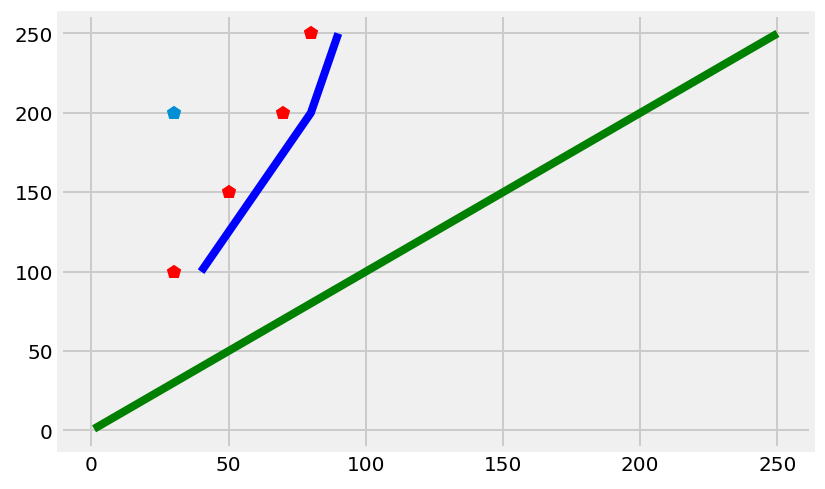

In [182]:

fig, ax = plt.subplots()
point_1 = [1,250]
x = [30,50,70,80]
y = [100,150,200,250]
x_ = [40,60, 80,90]
y_ = [110,160,210,260]
plt.plot(point_1,point_1,'g')
plt.plot(30,200, 'p')
plt.plot(x,y, 'pr')
plt.plot(x_,y, 'b')
plt.fill([220, 240], [210, 230]) 

plt.Circle(x,y)
plt.show()

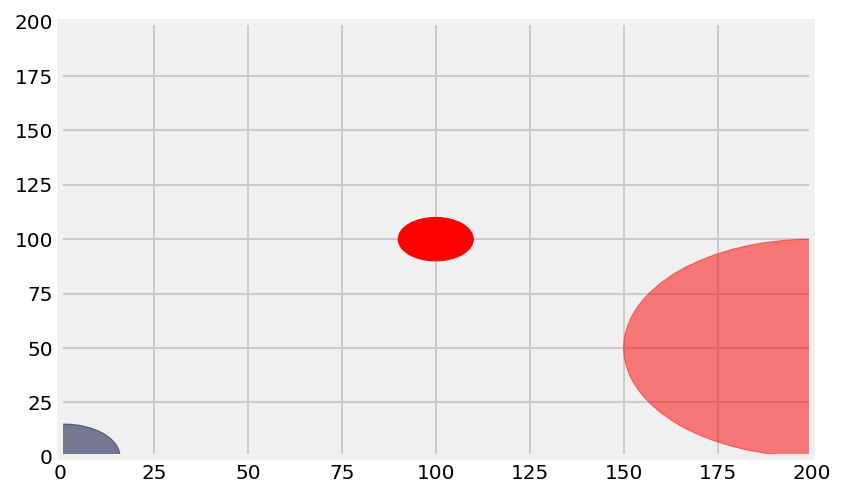

In [183]:
fig, ax = plt.subplots()
ax.add_artist(plt.Circle((200, 50), 50, color='r', alpha=0.5))
ax.add_artist(plt.Circle((1, 0), 15, color='#000033', alpha=0.5))
circle1 = plt.Circle((100, 100), 10, color='r')
#ax=subplot(aspect='equal')
#box1 = plt.Box((50,50), 20,  color='g')
ax.set_xlim((0, 200))
ax.set_ylim((0, 200))
#Use adjustable='box-forced' to make the plot area square-shaped as well.
# ax.set_aspect('equal', adjustable='datalim')
ax.add_artist(circle1)
ax.plot()   #Causes an autoscale update.
plt.show();

In [184]:
#### SNS 

In [185]:
plt.style.available[:5]

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid']

In [ ]:
plt.style.use('stylename')

In [ ]:
with plt.style.context('stylename'):
    make_a_plot()

In [186]:
df = pd.read_csv('Pokemon.csv', index_col=0, encoding='ISO-8859-1')

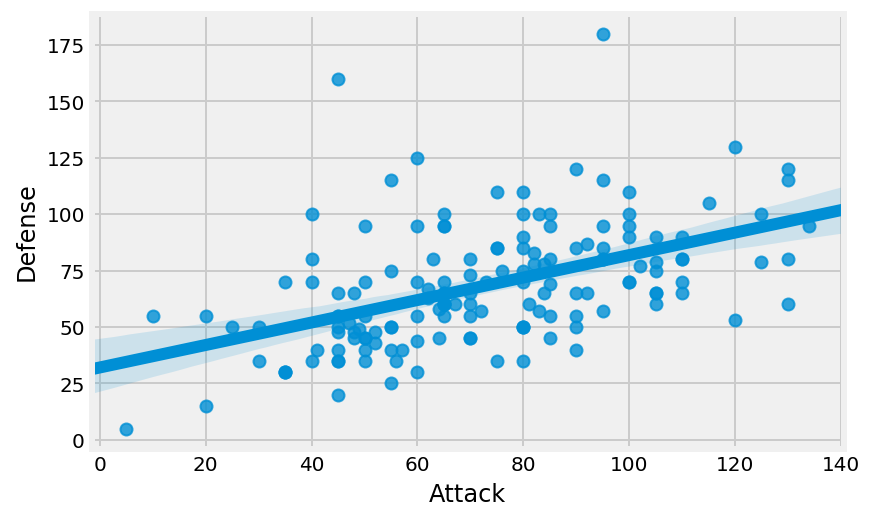

In [187]:
sns.regplot(x='Attack', y='Defense', data=df);

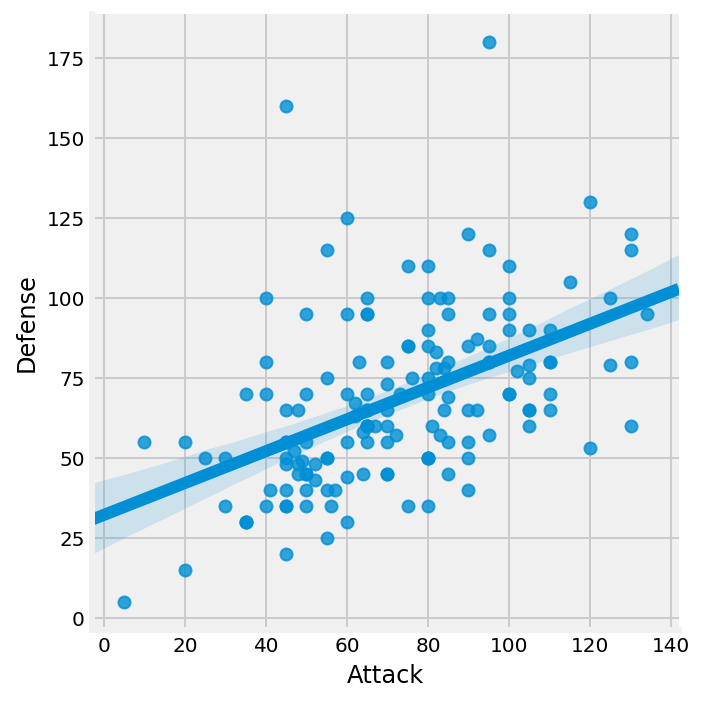

In [188]:
sns.lmplot(x='Attack', y='Defense', data=df);

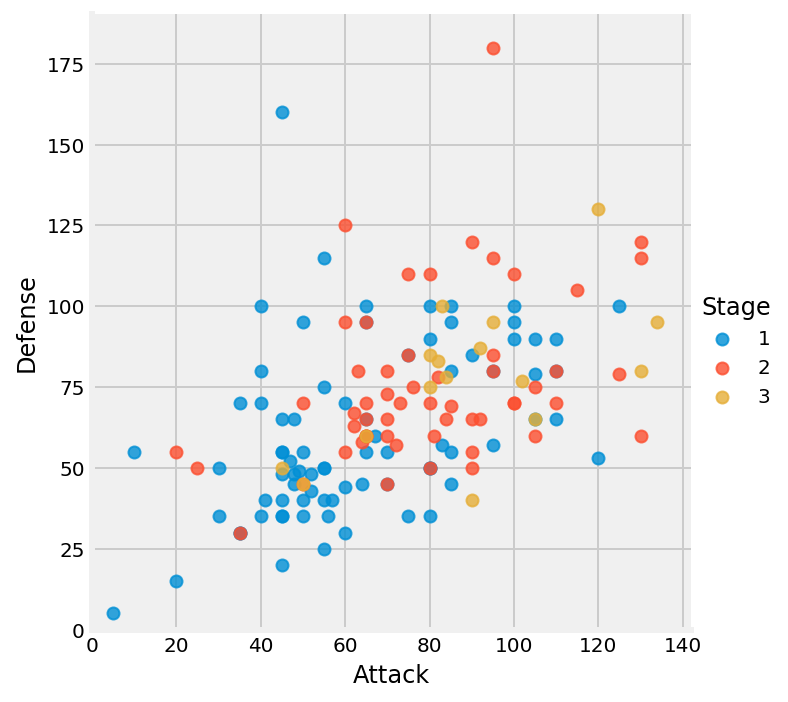

In [189]:
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage');   # Color by evolution stage
# Set axes to start @ 0, can also  be used to view a subsection
plt.ylim(0, None);
plt.xlim(0, None);# ';' takes care of the ugly '<seaborn.axisgrid.FacetGrid at 0x1a1cae6860>'

Often better to wrangle the data with Pandas first and then plot

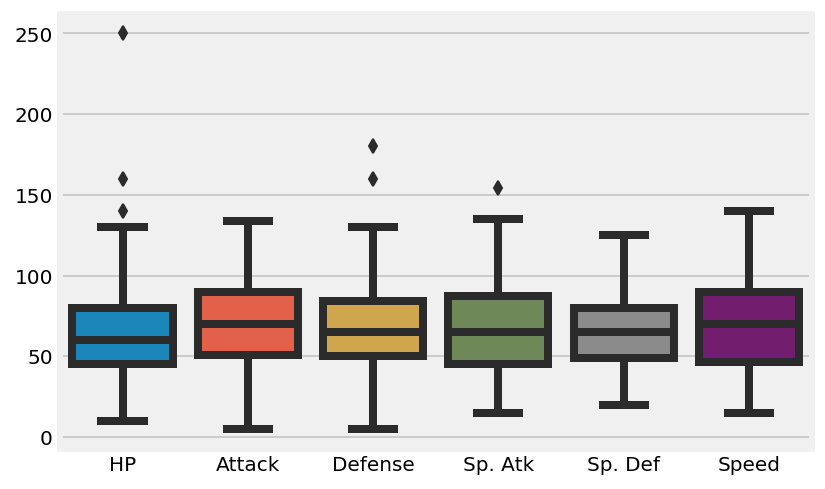

In [190]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df);

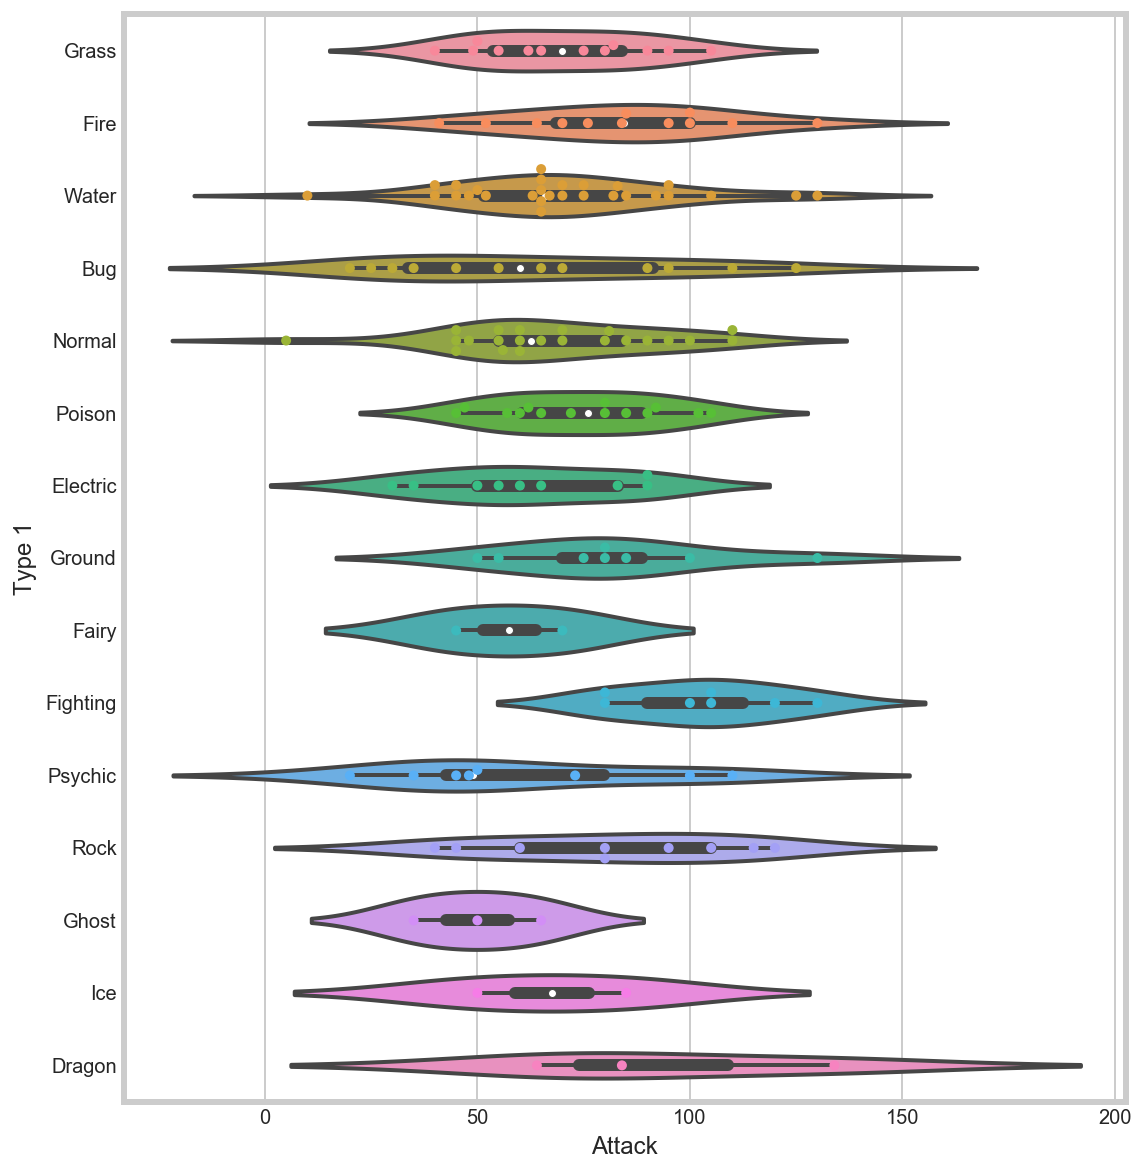

In [194]:
# Set theme
plt.subplots(figsize=(8,10))
sns.set_style('whitegrid')
sns.set_context(rc={"lines.linewidth": 2})
 
# Violin plot
# OK,  I may have failed my Roschach test but a vertically plotted violin plot triggers the wrong
# association with me, Switch x and y and it is plotted horizontally
sns.violinplot(y ='Type 1', x ='Attack', data=stats_df)
sns.swarmplot(y ='Type 1', x ='Attack', data=df);

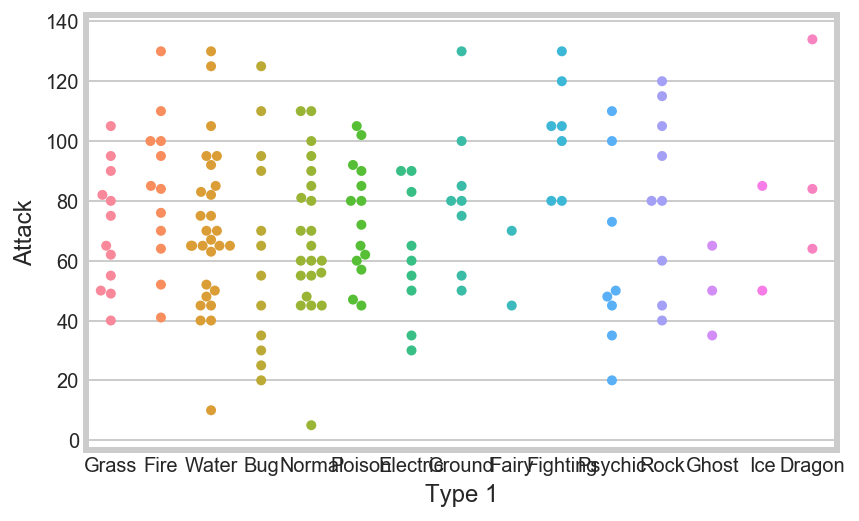

In [195]:
# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df);

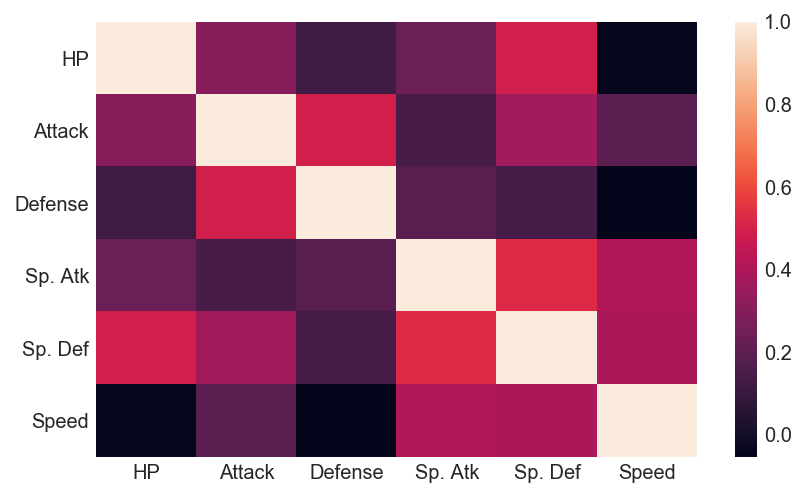

In [196]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
with plt.style.context('seaborn-whitegrid'):
    sns.heatmap(corr);
# Before embarking on a all out cleaning: see what is worthwhile cleaning
# corr = df.corr()['yCol']
# corr[np.argsort(corr, axis=0)[::-1]]

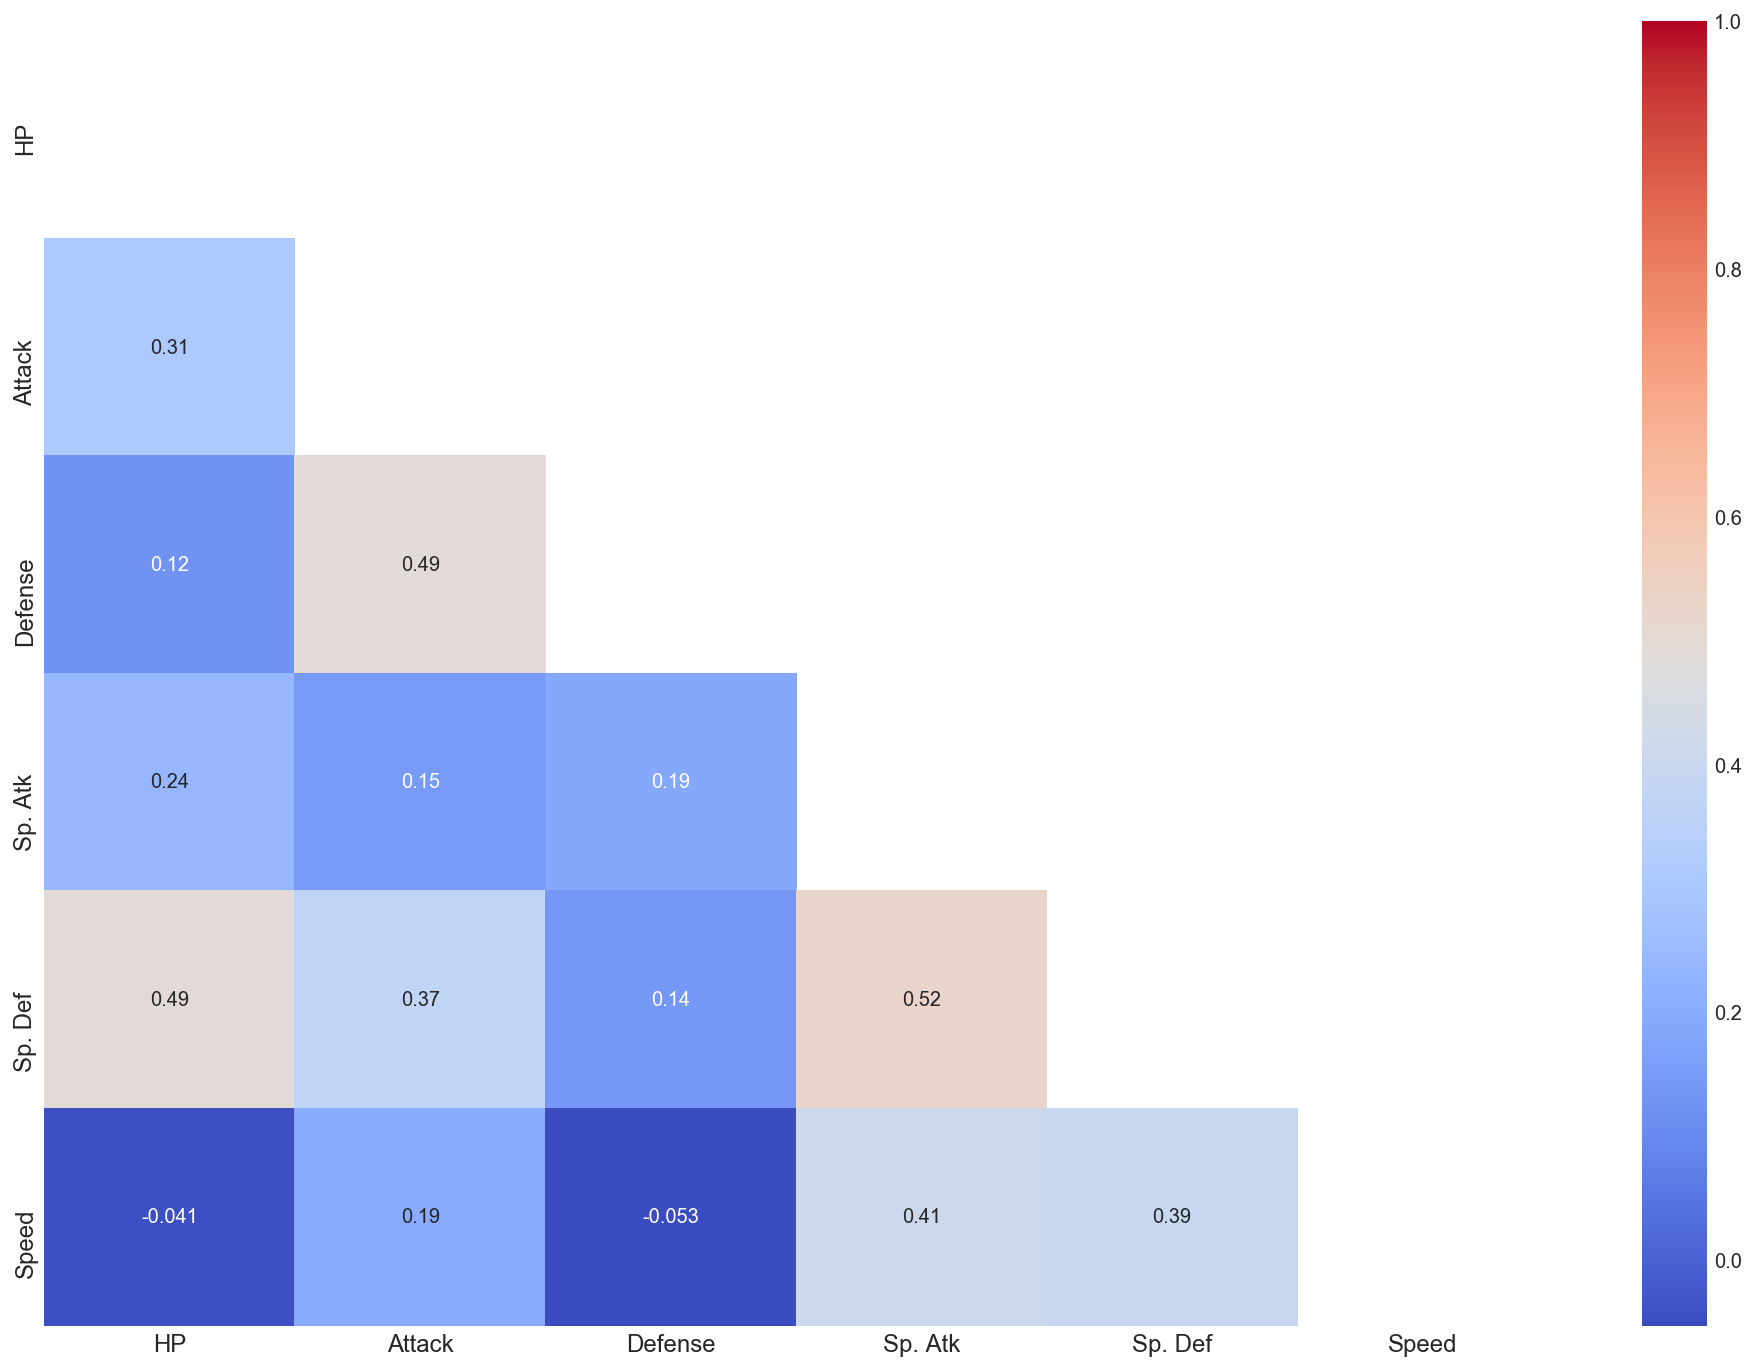

In [197]:
#Create a heatmap using only the variables with a high
fig, ax = plt.subplots(figsize=(15,12))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr, mask=mask,cmap="coolwarm",  ax=ax, annot=True)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12)
plt.show()

In [201]:
df['AttackLog'] = np.log(df['Attack'])

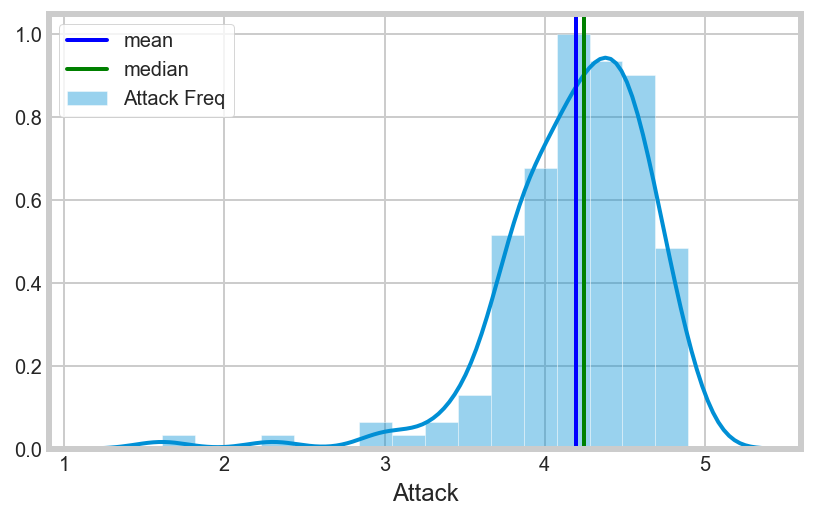

In [202]:
sns.distplot(df['Attack'], label = 'Attack Freq')
plt.axvline(df['Attack'].mean(), label ='mean', color = 'b', lw= 2)
plt.axvline(df['Attack'].median(), label ='median', color = 'g', lw= 2)
plt.legend(loc = 2)
plt.show();

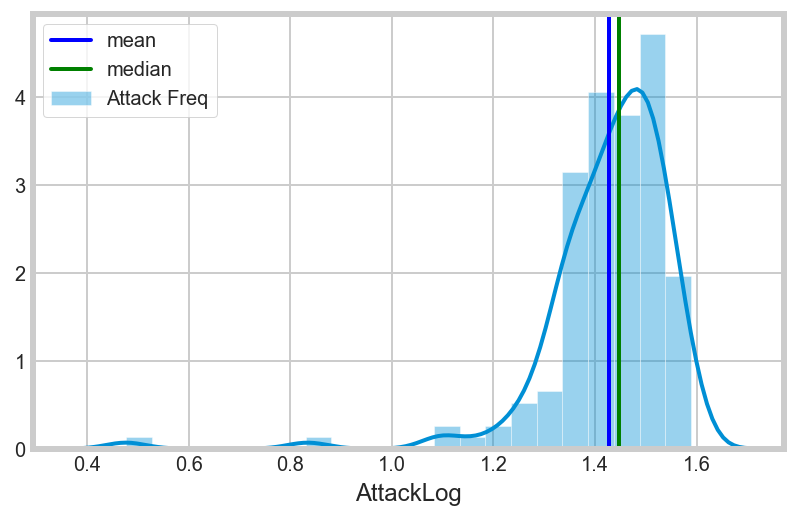

In [203]:
sns.distplot(df['AttackLog'],label = 'Attack Freq')
plt.axvline(df['AttackLog'].mean(), label ='mean', color = 'b', lw= 2)
plt.axvline(df['AttackLog'].median(), label ='median', color = 'g', lw= 2)
plt.legend(loc = 2)
plt.show();

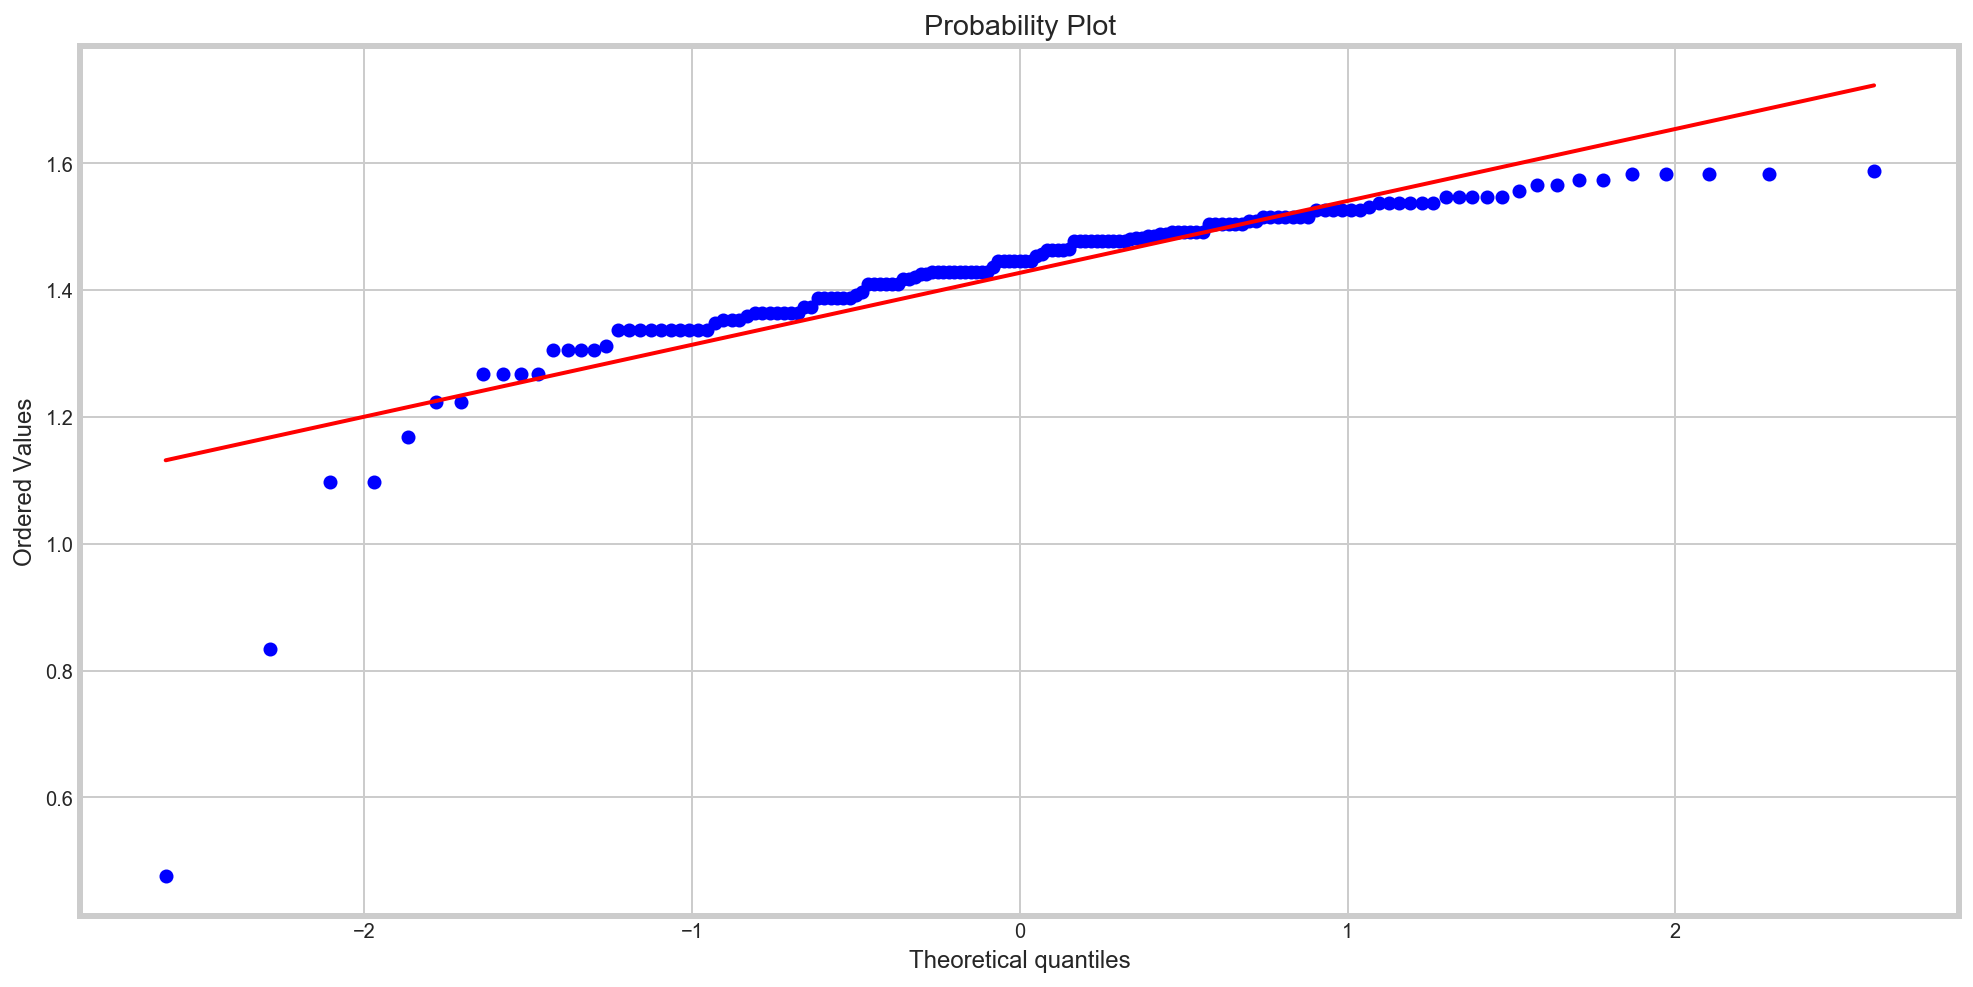

In [208]:
import scipy.stats as stats
fig = plt.figure(figsize=(15, 8))
x = df['AttackLog']
stats.probplot(x, plot=plt)

plt.show();

Numerical plots,

## Production
### Rerun on full test set
### Predictions
### Pipelines

In [ ]:
#from sklearn.datasets import datasets

from sklearn import datasets
iris = datasets.load_iris()
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1))
cross_val_score(clf, iris.data, iris.target, cv=5).mean()

### Websites

# Maths
## Combinations/Permutations
## Probabilities
### Frequentsis (counters)
#### T-Test, is the difference between 2 samples significant
- The null hypothesis is that there is no difference between the means.
- The alternative hypothesis is that there IS a difference.
 at the 0.05 confidence interval
If p-value < 5% the H0 (null hypothesis) should be rejected i.e. the difference **is** statistically significant


In [33]:
import scipy.stats as stats

In [34]:
tt = stats.ttest_ind(df.s4, df.s5)

In [35]:
print('t-statistic:\t', tt.statistic)
print('p-value:\t', tt.pvalue)

t-statistic:	 2.4073640319500444e-13
p-value:	 0.9999999999998079


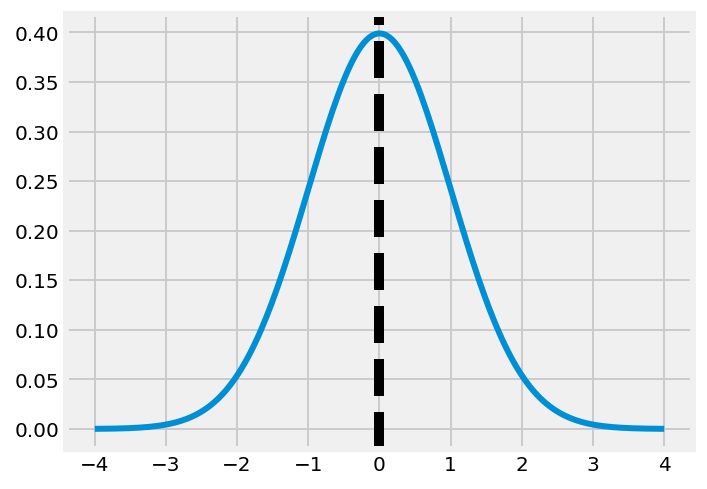

In [36]:
zdist = stats.norm(0, 1)
xvals = np.linspace(-4, 4, 200)

fig, ax = plt.subplots(figsize=(5,4))
ax.plot(xvals, zdist.pdf(xvals), lw=3)
ax.axvline(tt.statistic, color='black', ls='dashed', lw=5)
plt.show()

### Bayes(believers)
## Matrices

In [ ]:
!pwd

In [ ]:
word = 'abcdefghij'
print(word)
print(word[4])
print(word[:4])
print(word[4:])
print(word[2:4])
print(word[2:9:2])
print(word[-4:])
[print(word) for i in word]
[print(i) for i in word]
[print(i[:4]) for i in word]
[print(i) for i in word if i in['c', 'd', 'e']]
[print('yes') for i in word if i in['c', 'd', 'e'] if i in ['c']]
[print('yes') if i in['c', 'd', 'e'] else print(i) for i in word]
lijst = list(word)
print(lijst)

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
ft = FunctionTransformer()

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X = df.col2.values.reshape(-1, 1)
df['col8'] = pt.fit_transform(X) 
df


In [ ]:
np.log(100)

In [ ]:
print(lijst)
lijst.index('g')
print(lijst[4])
print(lijst[:4])
print(lijst[4:])
print(lijst[2:4])
print(lijst[2:9:2])
print(lijst[-4:])
[print(lijst) for i in lijst]
[print(i) for i in lijst]
[print(i[:4]) for i in lijst]
[print(i) for i in lijst if i in['c', 'd', 'e']]
[print('yes') for i in lijst if i in['c', 'd', 'e'] if i in ['c']]
[print('yes') if i in['c', 'd', 'e'] else print(i) for i in lijst]
lol = list(lijst for i in range(3))
lol
print(lol)





In [ ]:
lol = [['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'],
       ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'],
       ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'],
       ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'],
       ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']]
print(lol[2])
print(lol[2][2])
print(lol[2].index('g'))
print(lol[3][::2])
print(lol[3][::-2])
for item in lol:
    print(item)
for item in lol:
    for i in item:
print(i[print(i) for i in lijst if i in['c', 'd', 'e']]


In [ ]:
import pandas as pd  # example .apply with custom function
import numpy as np
_arr = np.random.randint(50, size=(4, 5))
df = pd.DataFrame(_arr)


def cube(x):
    return x ** 3


def sqrt_(x):
    return x ** 2


df.loc[:, 4] = df.loc[:, 4].map(sqrt_)
df.apply(cube)

In [ ]:
list1 = 1,2,3,4,5
lista = list('abcde')
listc = list('!@#$%')


dicta = {num:letter for  num,letter in zip(list1,lista) if (num < 4) and (letter in 'ab') }
dicta
dictb = {num:letter for  num,letter in zip(list1,lista)}

In [ ]:
dictb = {key:value for key in list1 for value in {}}

In [ ]:
{key:value for key in list1 for value in }

In [ ]:
{key:{lista[i]:listc[i]} for i,key in enumerate(list1)}

In [ ]:
dict(zip(lista,listc))

In [ ]:
dict(zip(lista,listc))

In [ ]:
dict(zip(list1,dict(zip(lista,listc)).items()))

In [ ]:
listc

In [ ]:
list1 = ('12345')

In [ ]:
eval(list1)

In [ ]:
#merge 2 dicts
dictc= {**dicta, **dictb}
dictc

In [ ]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
(stats.norm().ppf([0.05,0.95]))

In [ ]:
!pwd

In [ ]:
# def item_category_maker(x):
#     x = x.lower() #force lowercase
#     if 'chips' in x:
#         return 'chips'
#     elif ('burrito' in x) or ('bowl' in x):
#         return 'burrito'
#     elif 'taco' in x:
#         return 'taco'
#     elif 'salad' in x:
#         return 'salad'
#     else:
#         return 'drink'# have a left over answer
    
# chip['broad_type'] = chip.item_name.map(item_category_maker)
# print(chip.broad_type.unique())
# print(chip.broad_type.value_counts())

In [ ]:
# Filter on rows
filtering_mask = (earnings['Time'] == 2016) & (earnings['Statistics'] == 'Mean') & (
    earnings['Sex'] == 'All') & (earnings['Workingpattern'] == 'All') & (earnings['Earnings'] == 'Weekly pay - Gross')
earnings_row_filt = earnings[filtering_mask]

#sum(filtering_mask)

# Filter on columns
columns_filt = [column for column in earnings.columns if '_codelist' not in column] 
columns_filt = [column for column in columns_filt if column not in ['Data marking', 
                                                                    'Coefficient of variation',
                                                                    'Sex',
                                                                    'Workingpattern']]
earnings_col_filt = earnings_row_filt[columns_filt]

# Rename columns and reset_index
rename_cols = {'V4_2':'Value',
                 'ashe-geography':'Geography_code'}
earnings_col_filt = earnings_col_filt.rename(rename_cols, axis = 1)
earnings_col_filt = earnings_col_filt.reset_index(drop=True)

In [ ]:
import numpy as np
a = np.empty(15,)
a[::2] = 1
a[1::2] = 2
a

In [ ]:
a = []
for i in range(5):
    a.append(1)
    a.append(2)
a

In [ ]:
type(a)

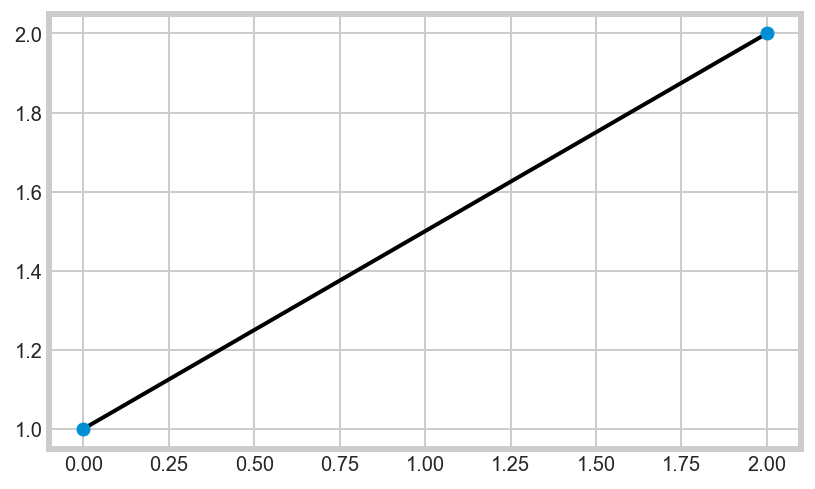

In [209]:
# Draw a straight line
#read the list of points as (x0, x1), (y0, y1)
data = [[0, 2], [1, 2]]

plt.plot(data[0], data[1], "k-")
plt.plot(data[0], data[1], "o")
plt.show()

In [ ]:
#Plot x vs y 
df = pd.DataFrame(sample_data, columns=["x", "y"])

# plot the data with regplot
my_plot = df.plot(kind="scatter", x="x", y="y",
                  title="Sample Data", figsize=(10, 5))

# Add value markers because it's nice to have a visual reference to data points
for point in sample_data:
    my_plot.text(point[0] + .2, point[1] - .02, str(point))

sns.regplot(x="x", y="y", data=df)
plt.show()

In [210]:
# simple scatter plot with line
df.plot.scatter(x = 'x', y = 'y')
plt.plot([0,50],[100,100])

KeyError: 'x'

In [ ]:
#remove outlier
remove_out = pd.DataFrame({'height':height, 'weight':weight[:,0]})
height_mean = np.mean(height)
height_std = np.std(height)
remove_out['height_outlier'] = (np.abs(remove_out.height - height_mean) > 1.5*height_std)
print (remove_out.height_outlier.sum())

height_no = remove_out.height[~remove_out.height_outlier].values
weight_no = remove_out.weight[~remove_out.height_outlier].values
print (weight_no.shape)
weight_no = weight_no.reshape(weight_no.shape[0], 1)
print (height_no.shape, weight_no.shape)

In [ ]:
#trick to split ascci data
# Load the diabetes dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split()
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data, columns=columns)
y = diabetes.target
# Take a look at the data again
print(df.head())
print(df.shape)

In [ ]:
bcw['bare_nuclei'] = bcw.bare_nuclei.map(
    lambda x: int(x) if not x == '?' else np.nan)
bcw.dropna(inplace=True)

In [ ]:
y = hsq['gender']# !!! column
X = hsq[predictors] #!!!list

In [ ]:
# new colum with 0 and 1's
data['host_wins'] = (data['HostName'] == data['winner']).astype(int)

In [ ]:
# create a folder "app"
import os
folder_ = "./app"
if not os.path.exists(folder_):
    os.makedirs(folder_)

In [ ]:
!pwd

# Appendix

In [ ]:
#SKlearn overview of underfitting and overfitting
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

In [ ]:
# SKlearn, advanced outlier example
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

print(__doc__)

rng = np.random.RandomState(42)

# Example settings
n_samples = 200
outliers_fraction = 0.05
clusters_separation = [0, 1, 2]

# define two outlier detection tools to be compared
classifiers = {
    "One-Class SVM": svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05,
                                     kernel="rbf", gamma=0.1),
    "Robust covariance": EllipticEnvelope(contamination=outliers_fraction),
    "Isolation Forest": IsolationForest(max_samples=n_samples,
                                        contamination=outliers_fraction,
                                        random_state=rng),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=35,
        contamination=outliers_fraction)}

# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.ones(n_samples, dtype=int)
ground_truth[-n_outliers:] = -1

# Fit the problem with varying cluster separation
for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
    X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
    X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
    X = np.r_[X1, X2]
    # Add outliers
    X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]

    # Fit the model
    plt.figure(figsize=(9, 7))
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        # fit the data and tag outliers
        if clf_name == "Local Outlier Factor":
            y_pred = clf.fit_predict(X)
            scores_pred = clf.negative_outlier_factor_
        else:
            clf.fit(X)
            scores_pred = clf.decision_function(X)
            y_pred = clf.predict(X)
        threshold = stats.scoreatpercentile(scores_pred,
                                            100 * outliers_fraction)
        n_errors = (y_pred != ground_truth).sum()
        # plot the levels lines and the points
        if clf_name == "Local Outlier Factor":
            # decision_function is private for LOF
            Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        subplot = plt.subplot(2, 2, i + 1)
        subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                         cmap=plt.cm.Blues_r)
        a = subplot.contour(xx, yy, Z, levels=[threshold],
                            linewidths=2, colors='red')
        subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                         colors='orange')
        b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
                            s=20, edgecolor='k')
        c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',
                            s=20, edgecolor='k')
        subplot.axis('tight')
        subplot.legend(
            [a.collections[0], b, c],
            ['learned decision function', 'true inliers', 'true outliers'],
            prop=matplotlib.font_manager.FontProperties(size=10),
            loc='lower right')
        subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
        subplot.set_xlim((-7, 7))
        subplot.set_ylim((-7, 7))
    plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
    plt.suptitle("Outlier detection")

plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X, y = iris.data, iris.target

y = label_binarize(y, classes=[0,1,2])
n_classes = 3

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.33, random_state=0)

# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic example: label {i} vs Rest')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
n_classes

In [ ]:
diabetes = datasets.load_diabetes()
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['ycol'] = pd.Series(sklearn_dataset.target)
    return df

df = sklearn_to_df(datasets.load_diabetes())
df.shape

In [ ]:
sklearn.calibration.CalibratedClassifierCV

In [ ]:
from sklearn.utils.testing import all_estimators

estimators = all_estimators()

for name, class_ in estimators:
    if hasattr(class_, 'predict_proba'):
        print(name)
#sklearn.calibration.CalibratedClassifierCV

In [ ]:

(f' Decision boundary @ 50/50:

In [ ]:
# Logistic regression plot
# slightly adapted from:
# Code source: Gael Varoquaux
# License: BSD 3 clause

# Some nice colors we can use in our plots:
colors = {'blue': '#729ECE',
          'brown': '#A8786E',
          'green': '#67BF5C',
          'grey': '#A2A2A2',
          'orange': '#FF9E4A',
          'pink': '#ED97CA',
          'purple': '#AD8BC9',
          'red': '#ED665D',
          'teal': '#6DCCDA',
          'yellow': '#CDCC5D'}

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

# this is our test set, it's just a straight line with some
# Gaussian noise
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]
#run the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)


def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

xval_chance = (-1 * clf.intercept_[0])/clf.coef_[0][0]
plt.axvline(xval_chance, lw=3, color=colors['red'], ls='dashed',
           label='gpa where P(y = 1) = 0.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model', 'y = 0,5','Decision boundary'),
           loc="lower right", fontsize='small')
plt.show()
print(clf.intercept_+xval_chance*clf.coef_[0][0])
print(f' Decision boundary @ 50/50: {xval_chance}')

print(clf.predict_proba([[xval_chance]]))